<a href="https://colab.research.google.com/github/Bonifucksy/bigdatalearning/blob/master/another_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание
Скачайте dataset iris https://gist.github.com/netj/8836201
* Для каждого типа цветка определите максимальное, минимальное и среднее значение 4-х параметров
* Визуализируйте точечный график (plt.scatter) по каждой паре параметров
* Попробуйте отделить какой-нить тип цветка от всех остальных (сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ   ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)
* Сделайте отдельную колонку для своего предсказания
* Оцените качество (сколько раз Вы угадали с ответом и сколько раз не угадали)


In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz
!tar -xvf spark-2.4.3-bin-hadoop2.7.tgz

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()


In [0]:
df = spark.read.csv('iris.csv', inferSchema=True, header=True)

In [0]:
#делаем датафрейм с одним столбцом и тремя элементами, чтобы было с чем джойнить

In [0]:
from pyspark.sql import Row

row = Row("variety")

In [0]:
sc = spark.sparkContext

In [0]:
df1 = sc.parallelize([
    row("Virginica"),
    row("Setosa"),    
    row("Versicolor")
    ]).toDF()

In [0]:
megadf=df1.join(df.groupBy('variety').max('sepal_length'), 'variety', how='outer').join(df.groupBy('variety').max('sepal_width'), 'variety', how='outer').join(df.groupBy('variety').max('petal_length'), 'variety', how='outer').join(df.groupBy('variety').max('petal_width'), 'variety', how='outer').join(df.groupBy('variety').min('sepal_length'), 'variety', how='outer').join(df.groupBy('variety').min('sepal_width'), 'variety', how='outer').join(df.groupBy('variety').min('petal_length'), 'variety', how='outer').join(df.groupBy('variety').min('petal_width'), 'variety', how='outer').join(df.groupBy('variety').avg('sepal_length'), 'variety', how='outer').join(df.groupBy('variety').avg('sepal_width'), 'variety', how='outer').join(df.groupBy('variety').avg('petal_length'), 'variety', how='outer').join(df.groupBy('variety').avg('petal_width'), 'variety', how='outer')

In [0]:
megadf.show()

+----------+-----------------+----------------+-----------------+----------------+-----------------+----------------+-----------------+----------------+-----------------+------------------+------------------+------------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+-----------------+----------------+-----------------+----------------+-----------------+------------------+------------------+------------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|              4.9|             2.2|              4.5|             1.4|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|              5.8|             4.4|              1.9|             0.6|      

In [0]:
#Делаем отдельные датасеты под каждый цветок

In [0]:
df_Vir = df.where(df['variety'] == 'Virginica')

In [0]:
df_Set = df.where(df['variety'] == 'Setosa')

In [0]:
df_Ver = df.where(df['variety'] == 'Versicolor')

In [0]:
#конвертируем датасеты в пандас

In [0]:
df_Vir_pand = df_Vir.toPandas()
df_Set_pand = df_Set.toPandas()
df_Ver_pand = df_Ver.toPandas()

In [19]:
df_Vir.show(2)

+------------+-----------+------------+-----------+---------+
|sepal_length|sepal_width|petal_length|petal_width|  variety|
+------------+-----------+------------+-----------+---------+
|         6.3|        3.3|         6.0|        2.5|Virginica|
|         5.8|        2.7|         5.1|        1.9|Virginica|
+------------+-----------+------------+-----------+---------+
only showing top 2 rows



In [0]:
#До конца не понял, что такое AX, но похоже, что что-то вроде буфера
#Пишем в буфер разброс по одному цветку | Параметры Sepal-Sepal

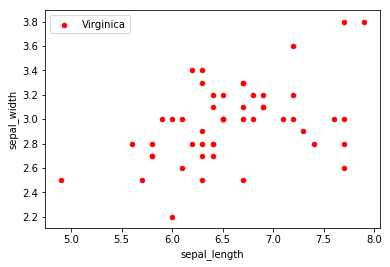

In [0]:
ax = df_Vir_pand.reset_index().plot(kind='scatter', x='sepal_length', y='sepal_width', color='Red', label='Virginica')

In [0]:
#Добавляем в буфер второй цветок

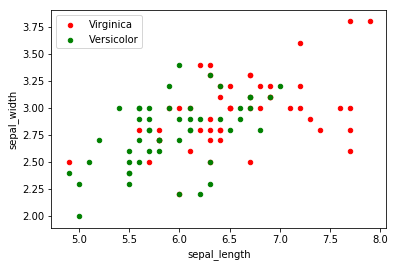

In [0]:
df_Ver_pand.reset_index().plot(kind='scatter', x='sepal_length', y='sepal_width', color='Green', label='Versicolor', ax=ax).figure

In [0]:
#Добавляем третий

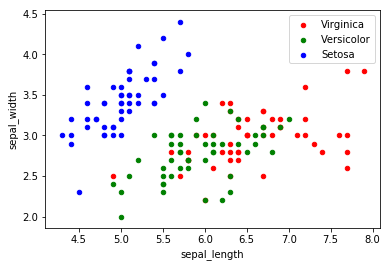

In [0]:
df_Set_pand.reset_index().plot(kind='scatter', x='sepal_length', y='sepal_width', color='Blue', label='Setosa', ax=ax).figure

In [0]:
#Тоже самое | Параметры Petal-Petal

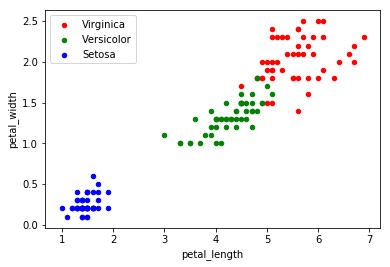

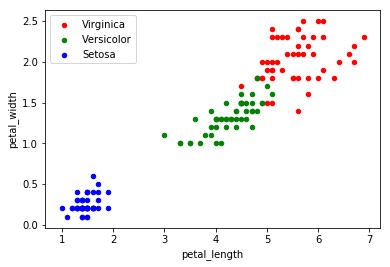

In [20]:
ax = df_Vir_pand.reset_index().plot(kind='scatter', x='petal_length', y='petal_width', color='Red', label='Virginica')
df_Ver_pand.reset_index().plot(kind='scatter', x='petal_length', y='petal_width', color='Green', label='Versicolor', ax=ax).figure
df_Set_pand.reset_index().plot(kind='scatter', x='petal_length', y='petal_width', color='Blue', label='Setosa', ax=ax).figure

In [0]:
#Тоже самое | Параметры sepal_length - petal_length

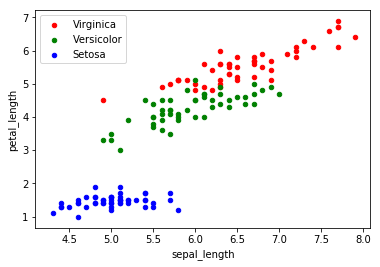

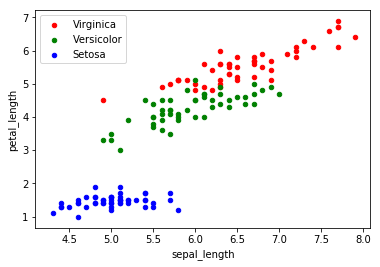

In [23]:
ax = df_Vir_pand.reset_index().plot(kind='scatter', x='sepal_length', y='petal_length', color='Red', label='Virginica')
df_Ver_pand.reset_index().plot(kind='scatter', x='sepal_length', y='petal_length', color='Green', label='Versicolor', ax=ax).figure
df_Set_pand.reset_index().plot(kind='scatter', x='sepal_length', y='petal_length', color='Blue', label='Setosa', ax=ax).figure

In [0]:
#Тоже самое | Параметры sepal_length - petal_width

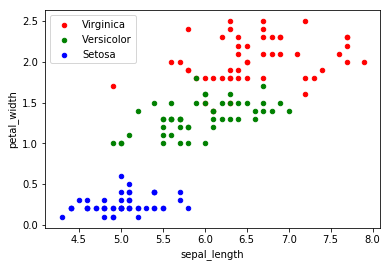

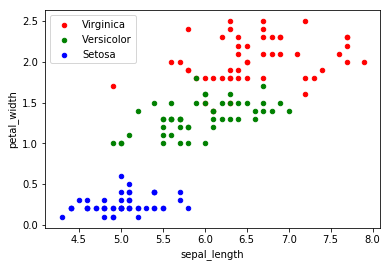

In [24]:
ax = df_Vir_pand.reset_index().plot(kind='scatter', x='sepal_length', y='petal_width', color='Red', label='Virginica')
df_Ver_pand.reset_index().plot(kind='scatter', x='sepal_length', y='petal_width', color='Green', label='Versicolor', ax=ax).figure
df_Set_pand.reset_index().plot(kind='scatter', x='sepal_length', y='petal_width', color='Blue', label='Setosa', ax=ax).figure

In [0]:
#Тоже самое | Параметры sepal_width - petal_length

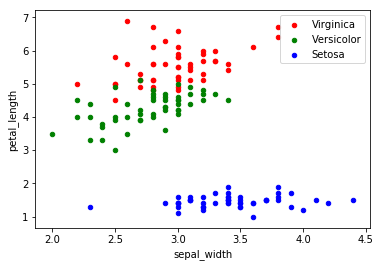

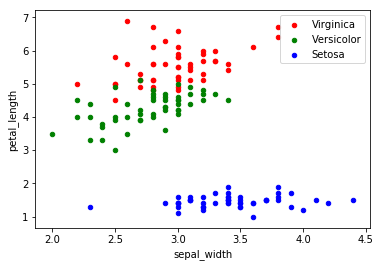

In [25]:
ax = df_Vir_pand.reset_index().plot(kind='scatter', x='sepal_width', y='petal_length', color='Red', label='Virginica')
df_Ver_pand.reset_index().plot(kind='scatter', x='sepal_width', y='petal_length', color='Green', label='Versicolor', ax=ax).figure
df_Set_pand.reset_index().plot(kind='scatter', x='sepal_width', y='petal_length', color='Blue', label='Setosa', ax=ax).figure

In [0]:
#Тоже самое | Параметры sepal_width - petal_width

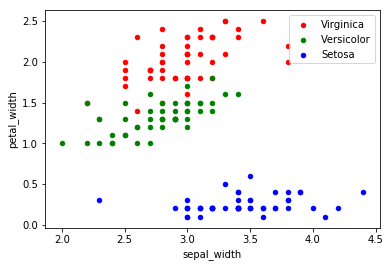

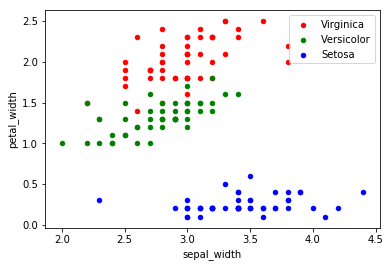

In [26]:
ax = df_Vir_pand.reset_index().plot(kind='scatter', x='sepal_width', y='petal_width', color='Red', label='Virginica')
df_Ver_pand.reset_index().plot(kind='scatter', x='sepal_width', y='petal_width', color='Green', label='Versicolor', ax=ax).figure
df_Set_pand.reset_index().plot(kind='scatter', x='sepal_width', y='petal_width', color='Blue', label='Setosa', ax=ax).figure

Итого получилось 6 графиков.

![график1](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYYAAAELCAYAAADdriHjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3XmcFPW19/HPCQwyirgxNy4oY24i%0AgiyyTVCMK2DiJZBcNcrjEnTy8rrMGJ/E596YTeOT3NwsN2okN0pCFBfQPGjckiiagAohDosgyoia%0AZESQaIsBRQfZzvNH9eD0MDNdPV1dXd3zfb9e/ZqZ6urq0zU1HKrqd37H3B0REZEWHyl2ACIikixK%0ADCIikkGJQUREMigxiIhIBiUGERHJoMQgIiIZlBhERCSDEoOIiGRQYhARkQw943gTM+sBLAXWu/uk%0ANs9NA34ErE8vmu7uv+xse/369fPq6uoCRCoiUr6WLVv2lrtXZVsvlsQAfBloBPp28Py97l4XdmPV%0A1dUsXbo0ksBERLoLM3s1zHoFv5RkZv2BfwE6PQsQEZFkiOMew43AvwO7OlnnTDN7zszmmtnhMcQk%0AIiIdKGhiMLNJwJvuvqyT1R4Gqt19GPA4MKuDbV1iZkvNbGkqlSpAtCIiAmCFnHbbzL4PXADsAHoT%0A3GO4393P72D9HsDb7r5fZ9sdPXq06x6DSHnYvn0769atY+vWrcUOpWz07t2b/v37U1FRkbHczJa5%0A++hsry/ozWd3vwa4Jh3QycDVbZOCmR3i7hvSP04muEktIt3EunXr2HfffamursbMih1OyXN3Nm7c%0AyLp16zjyyCO7tI2i1DGY2fVmNjn945Vm9oKZrQSuBKYVIyYRKY6tW7dy0EEHKSlExMw46KCD8joD%0Ai2u4Ku6+AFiQ/v7brZbvPqsQke5JSSFa+e5PVT5L2UilYMmS4KuIdJ0Sg5SFOXNgwACYMCH4OmdO%0AsSOSUnHKKafw2GOPZSy78cYbueiiizjrrLNy3t6XvvQlVq9e3ek6t9xyC3fccUfO245LQUclFYpG%0AJUlrqVSQDJqbP1xWWQmvvgpVWYv/pdgaGxsZNGhQ0d5/xowZLF68mNtuu233srFjx/LDH/6QE088%0AcY/1d+zYQc+esV2F77L29mvYUUk6Y5CS19QEvXplLquoCJZLmYrwuuFZZ53Fb3/7W7Zt2wZAU1MT%0Ar7/+OocffjhDhgwB4Pbbb2fy5MmceuqpnHbaaezatYvLL7+co48+mgkTJnDGGWcwd+5cAE4++eTd%0AU/b06dOHb3zjGwwfPpyxY8fyxhtvAHDdddfx4x//GIBXXnmF8ePHM3z4cEaOHMlf/vIXtmzZwmmn%0AncbIkSMZOnQoDz74YN6fMxdKDFLyqqsh/Te92/btwXIpQxFfNzzwwAOpqanh97//PQD33HMPX/jC%0AF/a4gbt8+XLmzp3Lk08+yf33309TUxOrV6/mzjvvZPHixe1u+7333mPs2LGsXLmSE088kV/84hd7%0ArHPeeedxxRVXsHLlSv70pz9xyCGH0Lt3b37zm9+wfPly5s+fz1e/+lXivLqjxCAlr6oKZs4MLh/1%0A7Rt8nTlTl5HKUioFtbXBdcPNm4OvtbV5nzlMnTqVe+65BwgSw9SpU/dYZ8KECRx44IEALFy4kLPP%0APpuPfOQjHHzwwZxyyintbrdXr15MmhRMKD1q1Cia2pzGvvvuu6xfv57Pf/7zQFCYtvfee+PufP3r%0AX2fYsGGMHz+e9evX7z7biIMSg5SFqVODewpPPBF8befvWspBga4bTpkyhT/84Q8sX76c999/n1Gj%0ARu2xzj777JPzdisqKnafefTo0YMdO3aEet3dd99NKpVi2bJlrFixgo9+9KOxVoYrMUjZqKqCMWN0%0AplDWCnTdsE+fPpxyyilcfPHF7Z4ttDVu3Djuu+8+du3axRtvvMGCBQu69L777rsv/fv354EHHgDg%0Agw8+4P3332fz5s380z/9ExUVFcyfP59XXw01W3ZklBhEpHQU8Lrh1KlTWblyZajEcOaZZ9K/f38G%0ADx7M+eefz8iRI9lvv06neOvQnXfeyU9/+lOGDRvG8ccfz9///nfOO+88li5dytChQ7njjjs4+uij%0Au7TtrtJwVREpqi4NV02lgstH1dVFO0XcsmULffr0YePGjdTU1LBo0SIOPvjgosTSnnyGqyZ/MK6I%0ASFtVVUW/Zjhp0iQ2bdrEtm3b+Na3vpWopJAvJQYRkS7o6n2FUqB7DCIikkGJQUREMigxiIhIBiUG%0AERHJoMQgiaBeClIsHU27fdlll+W13W9/+9s88cQTOb9uwYIFu6fRKBYlBik69VKQYmo9T1KLjuZL%0Aasvd2bVrV7vPXX/99YwfPz6SGDsTdpqNXCgxSFEVaE40KXOp91IsWb+E1HuFm3b7U5/6FD/60Y8Y%0AM2YMw4YN49prr939/MCBA7nwwgsZMmQIr732GtOmTWPIkCEMHTqUG264AYBp06btnop7yZIlHH/8%0A8QwfPpyamhreffddtm7dykUXXcTQoUMZMWIE8+fP3yO2t99+m8997nMMGzaMsWPH8txzzwHBtN0X%0AXHAB48aN44ILLsh7H7SlOgYpqpY50Vo32WmZE01zHkl75qyaQ+1DtfTq0YttO7cxc8pMpg7p+qyJ%0ArafdnjJlyu5ptx9//HFefvllGhoacHcmT57MU089xRFHHMHLL7/MrFmzGDt2LMuWLWP9+vU8//zz%0AAGzatClj+9u2beOcc87h3nvvZcyYMbzzzjtUVlZy0003YWasWrWKF198kYkTJ/LSSy9lvPbaa69l%0AxIgRPPDAA/zxj3/kwgsvZMWKFQCsXr2ahQsXUllZ2eXP3hGdMUhRqZeC5CL1Xorah2pp3tHM5g82%0A07yjmdoHa/M+c2hv2u158+Yxb948RowYwciRI3nxxRd5+eWXARgwYABjx44F4GMf+xh//etfqa+v%0A59FHH6Vv374Z216zZg2HHHIIY8aMAaBv37707NmThQsXcv755wNw9NFHM2DAgD0Sw8KFC3efEZx6%0A6qls3LiRd955B4DJkycXJCmAEoMUmXopSC6aNjXRq0fmtNsVPSpo2tSU13bbm3bb3bnmmmtYsWIF%0AK1as4JVXXqG2thbInIL7gAMOYOXKlZx88snccsstfOlLX8orlrC6Mg14WEoMUnTqpSBhVe9fzbad%0AmaeY23dup3r/6ry2296026effjq/+tWv2LJlCwDr16/nzTff3OO1b731Frt27eLMM8/ku9/9LsuX%0AL894fuDAgWzYsIElS5YAQXOeHTt28KlPfYq7774bgJdeeom1a9cycODAjNe2XmfBggX069dvjzOS%0AQtA9BkmEBMyJJiWgap8qZk6ZSe2DtVT0qGD7zu3MnDKTqn2imXb785///O5LShMnTqSxsZHjjjsO%0ACJLHXXfdRY8ePTJet379ei666KLdo5O+//3vZzzfq1cv7r33Xurr62lubqayspInnniCyy+/nMsu%0Au4yhQ4fSs2dPbr/9dvbaa6+M11533XVcfPHFDBs2jL333ptZs2bl/TnD0LTbklUCZjiWMtaVabdT%0A76Vo2tRE9f7VkSSFcpTPtNu6lCSdUo2BJFHVPlWMOWyMkkKBKDFIh1RjINI9KTFIhwrUd11EEk6J%0AQTqkGgOR7kmJQTqkGgOR7knDVaVTU6fC+PEalSTSneiMQbKqqoIxY5QUpLx973vf45hjjmHYsGEc%0Ae+yxPPPMMx2ue/vtt/P666/HGF28YjljMLMewFJgvbtPavPcXsAdwChgI3COuzfFEZd0L6rHkI4s%0AXryYRx55hOXLl7PXXnvx1ltv7Z5ttT233347Q4YM4dBDD40xyvjEdcbwZaCxg+dqgX+4+8eBG4Af%0AxBSTdCOqxygvUTd22rBhA/369dtdedyvXz8OPfRQli1bxkknncSoUaM4/fTT2bBhA3PnzmXp0qWc%0Ad955HHvssTQ3N/OHP/yBESNGMHToUC6++GI++OADAL72ta8xePBghg0bxtVXXw3Aww8/zCc/+UlG%0AjBjB+PHjeeONN6L5EFFy94I+gP7AH4BTgUfaef4x4Lj09z2Bt0hXZHf0GDVqlIuE9eab7pWV7vDh%0Ao7IyWC7Ft3r16pzWnz07+P3tt1/wdfbs/GN49913ffjw4f6JT3zCL7vsMl+wYIFv27bNjzvuOH8z%0AfaDcc889ftFFF7m7+0knneRLlixxd/fm5mbv37+/r1mzxt3dL7jgAr/hhhv8rbfe8qOOOsp37drl%0A7u7/+Mc/3N397bff3r3sF7/4hX/lK1/J/wO0o739Ciz1EP9ux3Ep6Ubg34F9O3j+MOA1AHffYWab%0AgYPSCWI3M7sEuATgiCOOKFiwUn7U86F8tC66bPl91tYGAyTy+V326dOHZcuW8fTTTzN//nzOOecc%0AvvnNb/L8888zYcIEAHbu3Mkhhxyyx2vXrFnDkUceyVFHHQXAF7/4RX72s59RV1dH7969qa2tZdKk%0ASbvbda5bt45zzjmHDRs2sG3bNo488siuB14gBb2UZGaTgDfdfVm+23L3Ge4+2t1HV+mvWXKgeozy%0AUciiyx49enDyySfzne98h+nTp3PfffdxzDHH7J52e9WqVcybNy/09nr27ElDQwNnnXUWjzzyCJ/+%0A9KcBqK+vp66ujlWrVnHrrbeydevW/IOPWKHvMYwDJptZE3APcKqZ3dVmnfXA4QBm1hPYj+AmtEgk%0AVI9RPgqV5NesWbO7CQ/AihUrGDRoEKlUisWLF6ffZzsvvPACAPvuuy/vvvsuEEyr3dTUxCuvvALA%0AnXfeyUknncSWLVvYvHkzZ5xxBjfccAMrV64EYPPmzRx22GEAsc2WmquCXkpy92uAawDM7GTganc/%0Av81qDwFfBBYDZwF/TF8LE4mM6jHKQ0uSr60NzhS2b48myW/ZsoX6+no2bdpEz549+fjHP86MGTO4%0A5JJLuPLKK9m8eTM7duzgqquu4phjjmHatGlceumlVFZWsnjxYm677TbOPvtsduzYwZgxY7j00kt5%0A++23mTJlClu3bsXd+clPfgIEU2mfffbZHHDAAZx66qn87W9/i2DPRCu2abdbJYZJZnY9wU2Qh8ys%0AN3AnMAJ4GzjX3f/a2bY07bZI+ejStNsaepxVPtNux1b57O4LgAXp77/davlW4Oy44hCR0qfGToWl%0AymcpuMZGmDUr+CoiyafEIAVVXw+DB8O0acHX+vpiRyRJpNuK0cp3fyoxSME0NsL06ZnLpk/XmYNk%0A6t27Nxs3blRyiIi7s3HjRnr37t3lbWh2VSmYhoaOl+d4r1HKWP/+/Vm3bh0ptQaMTO/evenfv3+X%0AX6/EIAVTU5PbcumeKioqEln9253pUpIUzKBBUFeXuayuTmcLIkmnMwYpqJtvhssvDy4f1dQoKYiU%0AAiUGKbhBg5QQREqJLiV1c4sWwbXXBl9LXdRz9ItEJoqDM8YDXImhG5s4EU44Aa6/Pvh6+unFjqjr%0A1IhHEiuKgzPmAzy2uZKipLmS8rdoUZAM2lq4EMaNiz+efKRSwd9K634LlZXw6quaNkGKLIqDM8ID%0APOxcSTpj6KY6mlY+h+nmE6OQc/SL5CWKg7MIB7gSQzc1cWJuy5NMjXgksaI4OItwgCsxdFPjxu2Z%0ABCZOLL3LSKBGPJJgURycRTjAdY+hm1u0KLh8VKpJoTXN0S+JFcXBGcE2wt5jUGIQEekmdPNZQolj%0AeLXqC0RKixJDNxbH8GrVF4iUHl1K6qbiGF6t+gKRZNGlJOlUHMOrVV8gUpqUGLqpOIZXq75ApDQp%0AMXRTcQyvVn2BSGnSPYZuLo7h1aovEEmGsPcY1I+hm6uqyv8f62zbiOI9RCQ+upRUIHGN3VcNgXRr%0AOsALQomhAOIau68aAunWdIAXjO4xRCyusfuqIZBuTQd4l6iOoUjiGruvGgLp1nSAF5QSQ8TiGruv%0AGgLp1nSAF5QSQ8TiGruvGgLp1nSAF5TuMRRIXGP3VUMg3ZoO8Jwkoo7BzHoDTwF7pd9rrrtf22ad%0AacCPgPXpRdPd/ZeFjCsOcY3dVw2BdGs6wAsip8RgZscD1a1f5+53dPKSD4BT3X2LmVUAC83s9+7+%0A5zbr3evudbnEIuE0NkJDA9TUwKBBuT8P8fynTP/xE0mO0PcYzOxO4MfACcCY9KPTUxIPbEn/WJF+%0AlN61qxJVXw+DB8O0acHX+vrcnod4hoprOLpIsoS+x2BmjcBgz/GmhJn1AJYBHwd+5u7/0eb5acD3%0AgRTwEvC/3f21zrZZCvcYiq2xMfjHvq3Vq4Mzg2zPQzxDxTUcXSQ+hahjeB44ONdA3H2nux8L9Adq%0AzGxIm1UeBqrdfRjwODCrve2Y2SVmttTMlqZU/p5VQ0Pny7M9D/EMFddwdJHkyXqPwcweJrj8sy+w%0A2swaCO4dAODuk8O8kbtvMrP5wKcJkkzL8o2tVvsl8MMOXj8DmAHBGUOY9+zOamo6X57teYhnqLiG%0Ao4skT5gzhh8D/w1cB3wO+M/0zy2PDplZlZntn/6+EpgAvNhmnUNa/TgZaAwZu3Ri0CCoa3M7v67u%0Aw8tE2Z6HeIaKazi6SPLkco/hB+3cH9hjWZvnhxFcGupBkIR+7e7Xm9n1wFJ3f8jMvk+QEHYAbwOX%0AufuLHW0TdI8hFxqVJCItwt5jyCUxLHf3kW2WPZe+NxArJQYRkdxFdvPZzC4zs1XAQDN7rtXjb8Bz%0AUQRbjqKYJr6xEWbNCr4Wahth4sz3s0TxOZIi9V6KJeuXkHovj1+smmhI0rl7pw9gP4KitjnAgFaP%0AA7O9tlCPUaNGeZLNnu1eWem+337B19mzc99GXZ07fPioq4t+G2HizPezRPE5kmL2c7O98ruVvt/3%0A9/PK71b67FVd+MVm26FRHDwiHSC4hJ/139isl5LM7MAsieXtCPJTTpJ8KSmKcflhagzy3UaYOPP9%0ALFF8jqRIvZdiwI0DaN7x4c6o7FnJq1e9StU+IX+xaqIhRRZlHcMyYGn6a0sR2svp75flE2Q5imJc%0Afpgag3y3ESbOfD9LFJ8jKZo2NdGrR+bOqOhRQdOmphw20qQmGlISsiYGdz/S3T8GPAF81t37uftB%0AwCRgXqEDLDVRjMsPU2OQ7zbCxJnvZ4nicyRF9f7VbNuZuTO279xO9f7VOWykWk00pCTkUvk81t1/%0A1/KDu/8eOD76kEpbFOPyw9QY5LuNMHHm+1mi+BxJUbVPFTOnzKSyZyV99+pLZc9KZk6ZGf4yEqiJ%0AhpSMXIarPgY8DdyVXnQecKK7n16g2DqU5HsMLaIYlx+mxiDfbYSJM9/PEsXnSIrUeymaNjVRvX91%0AbkkhYyNqoiHFUYg6hgOBa4ET04ueAr6jm88iIqUh8kY96QTw5byiktjpP6elJ7W2kaY1DVQPrKHq%0AiCKdYpXTaZ7kLEyB243prw+b2UNtH4UPUboqW58D9UFInjm31jNgxmAmzJ/GgBmDmXNrO00yCi1M%0Aow4pa2HqGEa5+zIzO6m95939yYJE1gldSspOQ+ZLT2ptIwNmDKa54sNlldvh1UtWx3fmUE7FJ7KH%0AyOoY3L2lVqEn0ODuT7Z+5BuoFIaGzJeepjUN9NqVuaxiV7A8NuVUfCJdlstw1QuBlWb2ZzP7kZl9%0A1swOKFRgkh8NmS891QNr2NbmL3L7R4LlsSmn4hPpstCJwd2/6O5HAf8KvAb8jKD6WRJIQ+ZLT9UR%0Ag5h5eB2V26HvB8FlpJmH18V7A7qcik+ky3IZrno+8ClgKPAWsBB42t0XFy689ukeQ3galVR6NCpJ%0ACqUQdQxvAX8BbgHmu3tTXhHmQYlBRCR3UU6iB4C79wMuBnoD3zOzBjO7M48YEy3fKfHDvD6OPgWa%0A2j+8SHotxCC1tpElj88itbaTAyeOX3wEfSXy3uc6wAsjzNzc6bOKvsBngP8CFgFrgFlhXx/lo9D9%0AGPKdEj/M6+PoU6Cp/cOLpNdCDGbfUueV38D3uwav/AY++5Z2Dpw4fvER9JXIe5/rAM8ZUfVjaGFm%0AzxHcV1gIPOXu6wqRqMIo5KWkfMf3h3l9HEPFVacQXiS9FmIQqs4hjl98BEUyee9zHeBdUohLScPc%0A/XJ3n91eUjCzm3MNMonyHd8f5vVxDBVXnUJ4kfRaiEGoOoc4fvERFMnkvc91gBdULnUM2YyLcFtF%0Ak+/4/jCvj2OouOoUwouk10IMQtU5xPGLj6BIJu99rgO8oKJMDGUh3/H9YV4fx1Bx1SmEF0mvhRiE%0AqnOI4xcfQZFM3vtcB3hBhb7HkHVDZsvdfWQkG8sijuGq+Y7vD/P6OIaKq04hvEh6LcQgVJ1DHL/4%0ACIpk8t7nOsBzEnkdQ4g3fNbdR0SysSxUxyAikrvIbz6HcFOE2yp5UQyvTkothCRMDGP3G19axKz7%0Ar6XxpUVd3kbq2UUsmXEtqWe7vg0pjjDTbj8MdLiSu0+OOqhskn7GMGcO1NYGgya2bQsufU6dGv02%0A6uth+vQPf66rg5vLYmyYdCiKgyuL+hsnMn3T47t/rtt/Ijdf9VhuYX51IrWVj9NrJ2zrATObJzL1%0Av3PbhkQvsktJHfVhaOHqx5AhiuHVSamFkISJYex+40uLGDz7BLBWCx1W/6+FDDoq3MDD1LOLGHDf%0ACXvWW5y5kKoRZTF4sWRF2Y/hyc4e0YRbPqIYXp2UWghJmBjG7jc8Py+n5e1pWjKPXjszl1XsDJZL%0AaQh9j8HMPmFmc81stZn9teVRyOBKURTDq5NSCyEJE8PY/ZohE3Na3p7qMRPZ1iNz2fYewXIpDbnc%0AfL4N+DmwAzgFuAO4qxBBlbIohlcnpRZCEiaGsfuDjhpH3f4Tg7uK6Ufd/hNDX0YCqBoxjpnNE4N6%0Ai63peovmibqMVEJymStpmbuPMrNV7j609bKCRtiOJN9jaBHF8Oqk1EJIwsQwdr/xpUU0PD+PmiG5%0AJYXWUs8uomnJPKrHKCkkRSH6MfwJOAGYC/wRWA/8l7sPzCfQriiFxCAikjSFqGP4MrA3cCUwCrgA%0A+GKWIHqn+zasNLMXzOw77ayzl5nda2avmNkzZladQ0xdEmYYeBKmeQ9ToxDBlPgFF0Wfg8ZUI7NW%0AzKIx1fHOyPd9ouhzEGobcVi0CK69Nvjajmz7qpx6PsSiVOIMK8zc3K0fBH0Z9g25rgF90t9XAM8A%0AY9usczlwS/r7c4F7s203n34MYaZwT8I072H6NUQwJX7BRdHnoO63dc517H7U/W7PnZHv+0TR5yDU%0ANuIwYULmwTNxYmacWfZVOfV8iEWpxOmF6ccwmuAG9L7pRZuBi919WcjX703Qy+Eyd3+m1fLHgOvc%0AfbGZ9QT+DlR5J4F19VJSmGHgSZjmPUyNQgRT4hdcFH0OGlONDP6fPXfG6stXM6hqUCTvE0Wfg1Db%0AiMOiRXDCCXsuX7gQxo3Luq/KqedDLEolzrRCXEr6FXC5u1e7ezVwBUGiyBZIDzNbAbwJPN46KaQd%0ABrwG4O47CBLOQe1s5xIzW2pmS1NdPB0LMww8CdO8h6lRiGBK/IKLos9Bw/r2d0br5fm+TxR9DkJt%0AIw7zOqgVSC/Ptq/KqedDLEolzhzlkhh2uvvTLT+4+0KCoaudcved7n4s0B+oMbMhuYcJ7j7D3Ue7%0A++iqLmbaMMPAkzDNe5gahQimxC+4KPoc1BzW/s5ovTzf94miz0GobcRhYge1Aunl2fZVOfV8iEWp%0AxJmjXBLDk2Z2q5mdbGYnmdn/AAvMbKSZZZ1u2903AfOBT7d5aj1wOED6UtJ+wMYc4gotzDDwJEzz%0AHqZGIYIp8Qsuij4Hg6oGUVeTuTPqaup2X0aK4n2i6HMQahtxGDduz+QwcWKwnOz7qpx6PsSiVOLM%0AUS73GOZ38rS7+6ntvKYK2O7um8ysEpgH/MDdH2m1zhXAUHe/1MzOBf7V3b/QWSz5DlcNMww8CdO8%0Ah6lRiGBK/IKLos9BY6qRhvUN1BxWk5EUonyfKPochNpGHBYtCi4ftUoKrWXbV+XU8yEWJRJn7P0Y%0AOghiGDAL6EFwdvJrd7/ezK4nuDv+kJn1Bu4ERgBvA+e6e6dTbaiOQUQkd2ETQ88cNvhR4D+BQ939%0AM2Y2GDjO3Wd29Bp3f47gH/y2y7/d6vutwNlh4xARkcLK5R7D7cBjwKHpn18Croo6oKQotXqUchem%0AeC2KQrp844gkzmxFdBF8zjj2VWLojzlnuSSGfu7+a2AX7B5aurPzl5SmOXOCoccTJgRf58wpdkTd%0A25xVcxhw4wAm3DmBATcOYM7ze/5CwqxT6DgiiTPLwRfF54xjXyWG/pi7JJebzwuAMwlqEUaa2ViC%0AG8mdNvIphELeY0hYPUq3F6Z4LYpCunzjiCTObEV0EXzOOPZVYuiPeQ+FKHD7CvAQ8M9mtohg2u36%0ALsaXWCVaj1K2whSvRVFIl28ckcSZrYgugs8Zx75KDP0xd1kuieGfgc8AxxPca3iZHG5el4oSrUcp%0AW2GK16IopMs3jkjizFZEF8HnjGNfJYb+mLssl8TwLXd/BziAoFHP/xA07ikrJVqPUrbCFK9FUUiX%0AbxyRxJmtiC6CzxnHvkoM/TF3WS73GJ519xFm9n1glbvPbllW2BD3FEcdQ0LqUSQtTPFaFIV0+cYR%0ASZzZiugi+Jxx7KvE0B/zboVo1PMIwfQVE4CRQDPQ4O7D8wm0K1TgJiKSu0LcfP4Cwb2F09PzHh0I%0A/J8uxieSmxBj0bM284lhPHuYhkJ5N3UJ0cEpCTUdJSMJDYeSJkzThqQ98mnUIyUoRKOTrM18YmiW%0AEqahUN5NXUJ0cIqiOVI2cbxHLJLQcChGRN2oJ0l0KakbCTEWPWsznxjGs4dpKJR3U5cQHZySUNNR%0AMpLQcChmhbiUJBK/EGPRszbziWE8e5iGQnk3dQnRwSkJNR0lIwkNhxJKiUGSLcRY9KzNfGIYzx6m%0AoVDeTV1CdHBKQk1HyUhCw6GEUmKQZAsxFj1rM58YxrOHaSiUd1OXEB2cklDTUTKS0HAooXSPQUpD%0AiLHoWZv5xDCePUxDobybuoTo4JSEmo6SkYSGQzFJRKOeQlFiEBHJnW4+S2SSMF49ihga//wIs6Z/%0AicY/P5J95QLGkf1N8qxzEMmTEoN0Kglz90cRQ/1/DGXwo59l2lszGfzoZ6n/j2FFiSP7m2TpH6D+%0AAhIDXUqSDiVhvHoUMTT++RGY27OmAAAOkklEQVQGP/pZsFYLHVZ/+mEGjZ0UWxzZ3yTPOgeRLHQp%0ASfKWhPHqUcTQsPSBnJYXKo7sb9KUX52DSESUGKRDSRivHkUMNaM/l9PyQsWR/U2q86tzEImIEoN0%0AKAnj1aOIYdDYSdQ1DwVn96OueWjoy0hRxZH9TfKscxCJiO4xSFZJGK8eRQyNf36EhqUPUDP6czkl%0AhajjyP4medY5iHRAdQwiIpJBN5+lpERRH5BtG4moQZDuqcSOCyUGKboo6gOybSMRNQjSPZXgcaFL%0ASVJUUdQHZNtGImoQpHtK2HGhS0lSEqKoD8i2jUTUIEj3VKLHhRKDFFUU9QHZtpGIGgTpnkr0uFBi%0AkKKKoj4g2zYSUYMg3VOJHhe6xyCJEEV9QLZtJKIGQbqnhBwXiahjMLPDgTuAjxLUnM5w95varHMy%0A8CDwt/Si+939+s62q8QgIpK7pNx83gF81d0HA2OBK8xscDvrPe3ux6YfnSYFaSPP8dFJ6LUQJo5Q%0AcZbYWPGOpNY2suTxWaTWNhYxiPLYl9I1BU0M7r7B3Zenv38XaAQOK+R7dit5jo9OQq+FMHGEirME%0Ax4q3Z86t9QyYMZgJ86cxYMZg5txaX4QgymNfStfFdo/BzKqBp4Ah7v5Oq+UnA/cB64DXgavd/YXO%0AtqVLSeQ9PjoJvRbCxBEqzoSNFe+q1NpGBswYTHPFh8sqt8Orl6ym6ogO+kdHHkR57EtpX1IuJbUE%0A04fgH/+rWieFtOXAAHcfDtwMtDtJvpldYmZLzWxpSqe3eY+PTkKvhTBxhIqzRMeKt9W0poFeuzKX%0AVewKlscXRFNZ7EvJT8ETg5lVECSFu939/rbPu/s77r4l/f3vgAoz69fOejPcfbS7j67S/1zyHh+d%0AhF4LYeIIFWeJjhVvq3pgDdva/EVu/0iwPL4gqstiX0p+CpoYzMyAmUCju/+kg3UOTq+HmdWkY9pY%0AyLjKQp7jo5PQayFMHKHiLNGx4m1VHTGImYfXUbkd+n4QXEaaeXhdfJeRoGz2peSn0MNVTwCeBlYB%0ALSfJXweOAHD3W8ysDriMYARTM/AVd/9TZ9vVPYZW8hwfnYReC2HiCBVnQsaK5yu1tpGmNQ1UD6yJ%0ANylkBFEe+1IyJaKOoVCUGEREcpeom89SOEmpQ8hXY6qRWStm0Zgq4th9EQGgZ7EDkK6bs2oOtQ/V%0A0qtHL7bt3MbMKTOZOmRqscPKWf3v6pm+ZPrun+tq6rj5MzcXMSKR7k1nDCUq9V6K2odqad7RzOYP%0ANtO8o5naB2tL7syhMdWYkRQApjdM15mDSBEpMZSopNQh5Kthfftj9DtaLiKFp8RQopJSh5CvmsPa%0AH6Pf0XIRKTwlhhKVlDqEfA2qGkRdTV3GsrqaOgZVFWmYpohouGqpS0odQr4aU400rG+g5rAaJQWR%0AAgk7XFWjkkpc1T5VJZ0QWgyqGqSEIJIQupTURaUyXX2p1DmUSpxx0L6QYlNi6IJSma4+Kf0WsimV%0AOOOgfSFJoHsMOSqV6eqT0m8hm1KJMw7aF1JomhKjQEpluvpSqXMolTjjoH0hSaHEkKNSma6+VOoc%0ASiXOOGhfSFIoMeSoVKarL5U6h1KJMw7aF5IUusfQRaUyXX2p1DmUSpxx0L6QQlEdQ4FVVSU7IbQo%0AlTqHUokzDtoXUmy6lCSSg9TaRpY8PovU2q7P/qo6BUk6nTGIhDTn1npqX5tOr12w7cmgH/PUf8ut%0Ab0S59NCQ8qYzBpEQUmsbqX1tOs0VsHkvaK6A2tem53TmUC49NKT8KTGIhNC0poFeuzKXVewKlofe%0AhuoUpEQoMYiEUD2whm1t/lq2fyRYHnobqlOQEqHEIBJC1RGDmHl4HZXboe8HULk9uMdQdUT4GWFV%0ApyClQnUMIjlIrW2kaU0D1QNrckoKGdtQnYIUieoYRAqg6ohBXU4Iu7ehOgVJOF1KEhGRDEoMIiKS%0AQYlBREQyKDGIiEgGJQYREcmgxCAiIhmUGEREJIMSg4iIZChoYjCzw81svpmtNrMXzOzL7axjZvZT%0AM3vFzJ4zs5GFjElERDpX6DOGHcBX3X0wMBa4wswGt1nnM8An0o9LgJ8XOKZuRU1hRCRXBU0M7r7B%0A3Zenv38XaAQOa7PaFOAOD/wZ2N/MDilkXN3FnFVzGHDjACbcOYEBNw5gzvNzih2SiJSA2O4xmFk1%0AMAJ4ps1ThwGvtfp5HXsmD8mRmsKISFfFkhjMrA9wH3CVu7/TxW1cYmZLzWxpKqV/3LJRUxgR6aqC%0AJwYzqyBICne7+/3trLIeOLzVz/3TyzK4+wx3H+3uo6uqNDNlNmoKIyJdVehRSQbMBBrd/ScdrPYQ%0AcGF6dNJYYLO7byhkXN2BmsKISFcVuh/DOOACYJWZrUgv+zpwBIC73wL8DjgDeAV4H7iowDF1G1OH%0ATGX8kePVFEZEclLQxODuCwHLso4DVxQyju5MTWFEJFeqfBYRkQxKDCIikkGJQUREMigxiIhIBiUG%0AERHJoMQgIiIZLBgtWlrMLAW8Wuw4gH7AW8UOIgTFGS3FGS3FGa3O4hzg7lnHr5dkYkgKM1vq7qOL%0AHUc2ijNaijNaijNaUcSpS0kiIpJBiUFERDIoMeRnRrEDCElxRktxRktxRivvOHWPQUREMuiMQURE%0AMigxhGBmPczsWTN7pJ3npplZysxWpB9fKkaM6ViazGxVOo6l7TxvZvZTM3vFzJ4zs5EJjfNkM9vc%0Aap9+u0hx7m9mc83sRTNrNLPj2jxf9P0ZIsak7MuBrWJYYWbvmNlVbdYp6v4MGWNS9uf/NrMXzOx5%0AM5tjZr3bPL+Xmd2b3pfPpFsrh1bofgzl4stAI9C3g+fvdfe6GOPpzCnu3tEY5s8An0g/Pgn8PP21%0AGDqLE+Bpd58UWzTtuwl41N3PMrNewN5tnk/C/swWIyRgX7r7GuBYCP6jRdCl8TdtVivq/gwZIxR5%0Af5rZYcCVwGB3bzazXwPnAre3Wq0W+Ie7f9zMzgV+AJwT9j10xpCFmfUH/gX4ZbFjicAU4A4P/BnY%0A38wOKXZQSWRm+wEnEnQgxN23ufumNqsVdX+GjDGJTgP+4u5ti1STdHx2FGNS9AQqzawnwX8GXm/z%0A/BRgVvr7ucBp6Y6aoSgxZHcj8O/Ark7WOTN96jvXzA7vZL1Cc2CemS0zs0vaef4w4LVWP69LL4tb%0AtjgBjjOzlWb2ezM7Js7g0o4EUsBt6cuIvzSzfdqsU+z9GSZGKP6+bOtcYE47y4u9P1vrKEYo8v50%0A9/XAj4G1wAaCdsjz2qy2e1+6+w5gM3BQ2PdQYuiEmU0C3nT3ZZ2s9jBQ7e7DgMf5MEsXwwnuPpLg%0AlPwKMzuxiLF0JlucywlK94cDNwMPxB0gwf/IRgI/d/cRwHvA14oQR2fCxJiEfblb+nLXZOD/FTOO%0AzmSJsej708wOIDgjOBI4FNjHzM6P8j2UGDo3DphsZk3APcCpZnZX6xXcfaO7f5D+8ZfAqHhDzIhl%0AffrrmwTXRmvarLIeaH1G0z+9LFbZ4nT3d9x9S/r73wEVZtYv5jDXAevc/Zn0z3MJ/hFurdj7M2uM%0ACdmXrX0GWO7ub7TzXLH3Z4sOY0zI/hwP/M3dU+6+HbgfOL7NOrv3Zfpy037AxrBvoMTQCXe/xt37%0Au3s1wanlH909IzO3uQY6meAmdezMbB8z27fle2Ai8Hyb1R4CLkyP/hhLcAq6IWlxmtnBLddDzayG%0A4DgNfVBHwd3/DrxmZgPTi04DVrdZraj7M0yMSdiXbUyl40s0RT8+0zqMMSH7cy0w1sz2TsdyGnv+%0Au/MQ8MX092cR/NsVumhNo5K6wMyuB5a6+0PAlWY2GdgBvA1MK1JYHwV+kz5mewKz3f1RM7sUwN1v%0AAX4HnAG8ArwPXJTQOM8CLjOzHUAzcG4uB3WE6oG705cW/gpclMD9mS3GpOzLlv8ITAD+rdWyRO3P%0AEDEWfX+6+zNmNpfgstYO4FlgRpt/l2YCd5rZKwT/Lp2by3uo8llERDLoUpKIiGRQYhARkQxKDCIi%0AkkGJQUREMigxiIhIBiUGERHJoMQgkoP0tMt7TL/e6vlpZja9AO87zcwObfVzU5ErmKWMKTGIlIZp%0ABPPiiBScEoOUnfS0G79Nz4D5vJmdY2ajzOzJ9Iyuj7VMZWJmC8zsJguarjyfnuYAM6sxs8XpWUv/%0A1GraiVziqDKz+8xsSfoxLr38OjP7Vfq9/2pmV7Z6zbfMbI2ZLbSgAcvVZnYWMJqgwnmFmVWmV683%0As+UWND06Ou8dJ5KmxCDl6NPA6+4+3N2HAI8SzIR5lruPAn4FfK/V+nu7+7HA5ennAF4EPpWetfTb%0AwH92IY6bgBvcfQxwJpk9PY4GTieYQPBaM6sws5b1hhNM5DYawN3nAkuB89z9WHdvTm/jrfQstT8H%0Aru5CfCLt0lxJUo5WAf9tZj8AHgH+AQwBHk/P0dSDYB77FnMA3P0pM+trZvsD+wKzzOwTBP0jKroQ%0Ax3hgsH3YH6WvmfVJf//b9Ky8H5jZmwRzSI0DHnT3rcBWM3s4y/bvT39dBvxrF+ITaZcSg5Qdd3/J%0Agn7BZwDfBf4IvODux3X0knZ+/r/AfHf/vAX9chd0IZSPAGPT/9Dvlk4UH7RatJOu/S22bKOrrxdp%0Aly4lSdlJj955393vAn5E0De4ysyOSz9fYZmdt85JLz+BYKrnzQTz17f0ApjWxVDmEcx+2hLXsVnW%0AXwR81sx6p88sWvcVfpfgLEak4PS/DClHQ4EfmdkuYDtwGcH0xD+1oE9yT4KWrS+k199qZs8SXC66%0AOL3shwSXkr4J/LaLcVwJ/MzMnku/51PApR2t7O5LzOwh4DngDYJLYpvTT98O3GJmzUBHZz4ikdC0%0A29KtmdkC4Gp3X1rsWADMrI+7bzGzvQkSySXuvrzYcUn3ojMGkWSZYWaDgd7ALCUFKQadMYh0gZld%0ABHy5zeJF7n5FMeIRiZISg4iIZNCoJBERyaDEICIiGZQYREQkgxKDiIhkUGIQEZEM/x8cIRZ8NrLv%0AmAAAAABJRU5ErkJggg==)
![график2](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYYAAAELCAYAAADdriHjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3Xl81eW17/HPIgQTQbSV9DgwhPao%0ABAnKFFG04kCs1hfo0Wo5agumx1YN9/RY77kd7im2r/b2VHtrW2mraBC0CHpwqHraOlTQSm2ZFAfi%0AVG+sRKtbrAjKnHX/+O1AdvLbyZ7H7/v12q+d/ezfsHYgWfn9nmc9j7k7IiIinfrlOwARESksSgwi%0AIhJDiUFERGIoMYiISAwlBhERiaHEICIiMZQYREQkhhKDiIjEUGIQEZEY/fMdQCqGDBnitbW1+Q5D%0ARKSorF279l13r+lru6JMDLW1taxZsybfYYiIFBUzez2R7XQrSUREYigxiIhIDCUGERGJUZR9DGF2%0A7drFxo0b2b59e75DKRlVVVUMHTqUysrKfIciIjlUMolh48aNHHDAAdTW1mJm+Q6n6Lk7mzZtYuPG%0AjYwcOTLf4YhIDmX1VpKZDTOz5Wa2wcxeMLN/DdlmqpltNrNnoo9vp3Ku7du3c/DBByspZIiZcfDB%0AB+sKTKQMZfuKYTfwNXdfZ2YHAGvN7BF339Btuz+4+9npnkxJIbP0/ZSCFYlAWxvU1kJNn8Py+943%0AneOVoKxeMbj7W+6+Lvr1FqAVODyb5xSRErdkCYwYAdOmBc9LlqS3bzrHK1E5G5VkZrXAOODPIW8f%0Ab2brzey3ZnZ0rmLKpFNOOYWHHnoopu0nP/kJs2fP5vzzz0/6eF/60pfYsKH7hVWsG2+8kdtuuy3p%0AY4sUrUgEmppg2zbYvDl4bmoK2lPZ99JLUz9eCctJ57OZDQLuBr7q7h90e3sdMMLdt5rZWcB9wBEh%0Ax7gMuAxg+PDhWY44eTNnzmTp0qWcccYZe9uWLl3Ktddey6c//eke2+/evZv+/eN/+2+55ZY+z/mV%0Ar3wltWBFilVbGwwYEPwC71RZGbT3dQsobN+Kip7bJXq8Epb1KwYzqyRICovd/Z7u77v7B+6+Nfr1%0Ab4BKMxsSst18d5/o7hNrMvUPFonA6tUZ+evg/PPP57//+7/ZuXMnAG1tbbz55psMGzaMMWPGALBw%0A4UKmT5/OqaeeymmnnUZHRwdXXHEFo0aNYtq0aZx11lksW7YMgKlTp+6d9mPQoEF861vf4phjjmHy%0A5Mm8/fbbAFxzzTX86Ec/AuDVV1/l9NNP55hjjmH8+PH85S9/YevWrZx22mmMHz+e+vp6fv3rX6f9%0AOUXyqrYWoj9je+3aFbSnsu+ePdDRkdrxSli2RyUZ0AK0uvuP42xzSHQ7zKwhGtOmbMYFZPy+4sc/%0A/nEaGhr47W9/CwRXCxdccEGPDtx169axbNkyHn/8ce655x7a2trYsGEDt99+O0899VTosT/88EMm%0AT57M+vXr+fSnP83NN9/cY5uLLrqIK6+8kvXr1/PHP/6RQw89lKqqKu69917WrVvH8uXL+drXvoa7%0Ap/U5RfKqpgZaWqC6GgYPDp5bWhL76z5s3wULUj9eCcv2raQpwCXAc2b2TLTtm8BwAHe/ETgfuNzM%0AdgPbgM97tn97db3X2HlZ2dQEp5+e1n+IzttJM2bMYOnSpbS0tPTYZtq0aXz84x8H4Mknn+Rzn/sc%0A/fr145BDDuGUU04JPe6AAQM4++xg0NaECRN45JFHYt7fsmUL7e3tnHvuuUBQmAZB0d83v/lNnnji%0ACfr160d7eztvv/02hxxySMqfUSTvZs4MflZTGUUUb99Uj1eispoY3P1JoNcxj+4+D5iXzTh6SOc+%0AZS9mzJjBv/3bv7Fu3To++ugjJkyYQFtbW8w2AwcOTPq4lZWVe688Kioq2L17d0L7LV68mEgkwtq1%0Aa6msrKS2tlZ1CVIaampS/1kN2zed45Wg8pwrKZ37lL0YNGgQp5xyCpdeeikzZ87sc/spU6Zw9913%0A09HRwdtvv82KFStSOu8BBxzA0KFDue+++wDYsWMHH330EZs3b+YTn/gElZWVLF++nNdfT2jGXZHE%0AZLCPrletrbBoUfAsOVGeiSGd+5R9mDlzJuvXr08oMZx33nkMHTqU0aNHc/HFFzN+/HgOPPDAlM57%0A++2387Of/YyxY8dywgkn8Le//Y2LLrqINWvWUF9fz2233caoUaNSOrZID7ka+z9nDoweDbNmBc9z%0A5mTnPBLDirEzcuLEid59oZ7W1lbq6uqSO1ABVDtu3bqVQYMGsWnTJhoaGli5cmVB9QGk9H2V0haJ%0ABMmg663Y6mp4/fXM/hy1tgbJoLsNG0D/J1NiZmvdfWJf25XMJHopKYD7imeffTbvv/8+O3fu5D/+%0A4z8KKimIhMpSH10Pq1bFb1diyKryTgwFINV+BZG8yVIfXQ8NDcm1S8aUZx+DiKQui310MerqoLk5%0Atq25WVcLOaArBhFJXjq1BMm44Qa44org9lFDg5JCjigxiEhqctVHV1enhJBjupUkIqkJq2NIpy3d%0Ac+diu3zKYYxKDBkSb9rtyy+/PK3jfvvb3+bRRx9Ner8VK1bsnUZDJOMSXdcgG+sfJLp/prfLp1zH%0A6O5F95gwYYJ3t2HDhh5tuXTTTTf5rFmzYtqOO+44f/zxx/vct6Ojw/fs2ZPReJYvX+6f/exnE95+%0A165doe35/r5KAXrnHffqanfY96iq6tlWXR20J7LdO++kfu6w/TO9XT5lMEZgjSfwO7asrxgiH0ZY%0A3b6ayIfZm3b7pJNO4rrrrmPSpEmMHTuWuXPn7n3/qKOO4gtf+AJjxozhjTfeYNasWYwZM4b6+nqu%0Av/56AGbNmrV3Ku7Vq1dzwgkncMwxx9DQ0MCWLVvYvn07s2fPpr6+nnHjxrF8+fIesb333nucc845%0AjB07lsmTJ/Pss88CwbTdl1xyCVOmTOGSSy5J+3sgZaKzjqGrigro1+3XSb9+Pdc7CNuuswYi1XOH%0A7Z/p7fIpDzGWbefzkueW0HR/EwMqBrBzz05aZrQwc0zf01jE03Xa7c7ZVS+44AIeeeQRXnnlFVat%0AWoW7M336dJ544gmGDx/OK6+8wqJFi5g8eTJr166lvb2d559/HoD3338/5vg7d+7kwgsv5M4772TS%0ApEl88MEHVFdX89Of/hQz47nnnuPFF1+ksbGRl19+OWbfuXPnMm7cOO677z4ee+wxvvCFL/DMM8Fk%0Atxs2bODJJ5+kuro65c8uZSbeugbd1wjv6Aj+vu1ru2RqIBKtocj0dvmUhxjL8ooh8mGEpvub2LZ7%0AG5t3bGbb7m00/bop7SuHzmm3IViPYebMmTz88MM8/PDDjBs3jvHjx/Piiy/yyiuvADBixAgmT54M%0AwCc/+Ulee+015syZw+9+9zsGDx4cc+yXXnqJQw89lEmTJgEwePBg+vfvz5NPPsnFF18MwKhRoxgx%0AYkSPxPDkk0/uvSI49dRT2bRpEx98ECykN336dCUFSU4y6xosWJDZ9Q8SraHI9Hb5lIcYy/KKoe39%0ANgZUDGDb7n0l/ZUVlbS930bNwMxOu33HHXfwjW98gy9/+cuxMbS1xUzB/bGPfYz169fz0EMPceON%0AN3LXXXexYMGClGNJVCrTgIskta5Bptc/SLSGItPb5VOOYyzLK4bag2rZuSf20mzXnl3UHlSb1nHD%0Apt0+44wzWLBgAVu3bgWgvb2dd955p8e+7777Lh0dHZx33nl873vfY926dTHvH3XUUbz11lusXr0a%0ACBbn2b17NyeddBKLFy8G4OWXX+avf/0rRx11VMy+XbdZsWIFQ4YM6XFFIpK0mhqYNCn2l1Q6beme%0AOxfb5VMOYyzLK4aagTW0zGih6ddNVFZUsmvPLlpmtKR1tdBp5syZnHvuuXtvKTU2NtLa2srxxx8P%0ABMnjV7/6FRXdOuXa29uZPXs2HdH1Z3/wgx/EvD9gwADuvPNO5syZw7Zt26iurubRRx/liiuu4PLL%0AL6e+vp7+/fuzcOFC9ttvv5h9r7nmGi699FLGjh3L/vvvz6JFi9L+nCJSusp62u3IhxHa3m+j9qDa%0AjCSFUqRptyXvEp0evwCm0U9JDuNOdNrtsryV1KlmYA2TDp+kpCBSqEqpSC1MgcZd1olBRApYJAJN%0ATcG6D5s3B89NTT2nhEh0u0JTwHErMYhIYSqlIrUwBRy3EoOIFKZSKlILU8BxKzGISGEqpSK1MAUc%0Ad1kOVxWRIlFKRWphCjRuXTFk2Pe//32OPvpoxo4dy7HHHsuf//znuNsuXLiQN998M4fRiRShUipS%0AC1OAceuKIYOeeuopHnzwQdatW8d+++3Hu+++u3e21TALFy5kzJgxHHbYYTmMUqQAxBu7H9aeaFsy%0A58mXQosnjrK+Ysj0gkhvvfUWQ4YM2Vt5PGTIEA477DDWrl3LySefzIQJEzjjjDN46623WLZsGWvW%0ArOGiiy7i2GOPZdu2bfz+979n3Lhx1NfXc+mll7Jjxw4Avv71rzN69GjGjh3L1VdfDcADDzzAcccd%0Ax7hx4zj99NN5++23M/MhRLIt3tj9TC/0U2g1AoUWT28SWbSh0B6ZWKjnjjuCtS4OPDB4vuOOpHYP%0AtWXLFj/mmGP8iCOO8Msvv9xXrFjhO3fu9OOPP97fiS6qsXTpUp89e7a7u5988sm+evVqd3fftm2b%0ADx061F966SV3d7/kkkv8+uuv93fffdePPPJI7+jocHf3v//97+7u/t577+1tu/nmm/2qq65K/wOE%0A0EI9klHxFp3ZsCH1xX+KYQGeAokHLdQTX7bqSgYNGsTatWuZP38+NTU1XHjhhdx00008//zzTJs2%0AjWOPPZbvfe97bNy4sce+L730EiNHjuTII48E4Itf/CJPPPEEBx54IFVVVTQ1NXHPPfew//77A7Bx%0A40bOOOMM6uvrue6663jhhRfSC14kF+KN3V+1KvXFf4qhtqHQ4ulDWfYxdP4bbds36/bef6N0b/tV%0AVFQwdepUpk6dSn19PT//+c85+uijeeqpp1I6Xv/+/Vm1ahW///3vWbZsGfPmzeOxxx5jzpw5XHXV%0AVUyfPp0VK1ZwzTXXpBe4SC7EG7vf0JD64j/FUNtQaPH0oSyvGLL1b/TSSy/tXYQH4JlnnqGuro5I%0AJLI3MezatWvvX/cHHHAAW7ZsAYJptdva2nj11VcBuP322zn55JPZunUrmzdv5qyzzuL6669n/fr1%0AAGzevJnDDz8cQLOlSvGIN3a/ri71xX+Kobah0OLpSyL3mwrtkck+hsGDM9fHsGbNGj/++OO9rq7O%0A6+vr/dxzz/VIJOJPP/20n3TSST527FgfPXq0z58/393dly1b5kceeaQfc8wx/tFHH/mjjz7qxx57%0ArI8ZM8Znz57t27dv9zfffNMnTZrk9fX1PmbMGF+4cKG7u993330+cuRIHz9+vF999dV+8sknp/8B%0AQqiPQbLinXfcV60K7xvo3p5oWzLnyZc8x0OCfQxZnXbbzIYBtwH/ADgw391/2m0bA34KnAV8BMxy%0A93Xdj9VVxqbdLo6RY3mlabdFSkehTLu9G/iau48GJgNXmtnobtucCRwRfVwG/DLLMe1VgHUlIvkX%0ANo47nbZykM7nLsDvWVY7n939LeCt6NdbzKwVOBzY0GWzGcBt0cucP5nZQWZ2aHRfEcmlJUuCIXoD%0ABgQdcS0tQXuqbdElbkta2Pcs0c+dzr5ZlLMV3MysFngCGOPuH3RpfxD4T3d/Mvr698D/cvc1YceB%0A+LeSRo0ahXUfxSApc3defPFF3UoqF5FIUHjVdbhedXUwCmj79t7bqqqCEUTd93399dK+JI/3PUvk%0Ac6ezb4oK5VZSZzCDgLuBr3ZNCkke4zIzW2NmayIhl1xVVVVs2rSJXCW6UufubNq0iaqqqnyHIrkS%0ANtY+rG4grC2s5qCAx+lnTDr1CQVc25D1OgYzqyRICovd/Z6QTdqBYV1eD422xXD3+cB8CK4Yur8/%0AdOhQNm7cSFjSkNRUVVUxdOjQfIchuRI2jjusbiCsLazmoIDH6WdMOmPfC7i2IauJITriqAVodfcf%0Ax9nsfqDZzJYCxwGbU+lfqKysZOTIkakHK1LuOsfaNzUFf7nu2hXbd5BKWynfRoL437NEPnc6+2ZZ%0Atoerngj8AXgO6Ig2fxMYDuDuN0aTxzzgMwTDVWf31r8A4X0MIpIh6cxwWq5jwNP53Dn8niXax5Cz%0AzudMUmIQEUleQXU+i0iRCxtr39oKixYFz8nuW2iKIcYcUmIQkd6FrSMwZw6MHg2zZgXPc+Ykvm+h%0AKYYYc0y3kkQkvrCx9lVVsTUMnTZsCCbD623fQqttKIYYM0i3kkQkfWFj7eMVka5a1fe+BTJOf69i%0AiDEPlBhEJL6wsfbx7jI0NPS9b4GM09+rGGLMAyUGEYkvbB2BBQuguTl2u+bm2NtI8fYtkHH6exVD%0AjHmgPgYR6VvYWPvW1uD2UUNDz6TQ176FphhizIBE+xjKcmlPEUlSTU3PX5h1db0nhN72LTTFEGMO%0A6VaSSBmLPL2S1fPnEnl65b7GfNYnhJ070fNkerts7V8MElnmrdAeYUt7ikhy7rhqmld/Cz/w63j1%0At/A7rmp0b252D7qXg0dzc5ydo2vjHnhg5tbGDTt3oufJ9HbxZONz5xCFsLRntqiPQSQ9kadXMuLu%0AE9lWua+tehe8fj3UfNRt41zUJ7S2BoVy3e23H+zY0ft5Eo0n3bhLoOZBdQwiElfb6ocZsCe2rXIP%0AtB0UsnEu6hO6n6NT95qJsPMkGk+6cZdRzYMSg0gZqp3UyM5ua+3sqoDa90M2zkV9QvdzdOp+RyPs%0APInGk27cZVTzoMQgUoZqxk2hZVsj1btg8PbgNlLLtkZqLs1TfUJdXXhtxK239n2eRONJN+4yqnlQ%0AH4NIGYs8vZK21Q9TO6mRmnFTgsZ81ieEnTvR82R6u2ztn0daj0FERGKo81mkHORoTH3kwwir21cT%0A+bCEx+7LXkoMIsUqR+sILHluCSN+MoJpt09jxE9GsOR5rVdQ6nQrSaQY5WhMfeTDCCN+MoJtu/ed%0Ap7p/Na9/9XVqBhbX/XXRrSSR0pajMfVt77cxoCL2PJUVlbS9n9nzSGFRYhApRjkaU197UC0798Se%0AZ9eeXdQelNnzSGFRYhApRjkaU18zsIaWGS1U969m8H6Dqe5fTcuMFt1GKnHqYxApZjkaUx/5MELb%0A+23UHlSrpFDEtB6DSDnI0ToCNQNrlBDKiG4liRSxZOoLMl2LUHC1DeWwTkKOKDGIFKlk6gsyXYtQ%0AcLUNOarpKBcJ9zGY2T8BPwQ+AVj04e4+OHvhhVMfg5S7ZOoLMl2LUHC1DSWwTkKuZKOO4Vpgursf%0A6O6D3f2AfCQFEUmuviDTtQgFV9tQRusk5EoyieFtd+9jEVgRyYVk6gsyXYtQcLUNZbROQq70mRjM%0A7J+it5HWmNmdZjazsy3aLiI5lkx9QaZrEQqutqGM1knIlT77GMzs1l7edne/NLMh9U19DCKBZOoL%0AMl2LUHC1DUW8TkKuZHw9BjOb4u4r+2rLBSUGEZHkZaPz+YYE27oGscDM3jGz5+O8P9XMNpvZM9HH%0At5OIR0REsqDPymczOx44Aagxs6u6vDUYqAjfa6+FwDzgtl62+YO7n91XHCKlKp1bMoufXcxdL9zF%0ABUdfwEVjL+r1eImepzXSyqr2VTQc3kBdTS/La+rWTclKZEqMAcCg6LYHdGn/ADi/tx3d/Qkzq001%0AOJFSt+S5JTTd38SAigHs3LOTlhktzBwzM6F9h/14GBu3bATg/pfv5xuPfoMfTvth6PESPc+c38xh%0A3up5e183NzRzw/snQFNTMCR0586gYxd6ts1MLG4pfMn0MYxw99eTPkGQGB509zEh700F7gY2Am8C%0AV7v7C30dU30MUgrSKRRb/OxiLr734h7tlVSyi10xx1t72VomzJ/Q53laI62M/sXoHsfccPN+1LXv%0A2NdQVQVmKigrQhmbRM/MHgA8+nWP9919eioBRq0DRrj7VjM7C7gPOCJOHJcBlwEMHz48jVOKFIbO%0AQrGuv7A7C8X6Sgx3vXBXaHsHHTGvKysqWdW+KqHzrGpfFXrMVcOMuvYuDRUhd5A7C8qUGEpCIp3P%0APwL+L/D/gG3AzdHHVuAv6Zzc3T9w963Rr38DVJrZkDjbznf3ie4+sUb/+aQEpFModsHRF4S29+v2%0AI71rzy4aDm9I6DwNhzeEHrPhjW53FfbsgY7YBKSCstLSZ2Jw98fd/XFgirtf6O4PRB//DJyUzsnN%0A7BCLXoaYWUM0nk3pHFOkWKRTKHbR2IsYdsCwmLZhBwxj0XmLehyvrqYuofPU1dTR3NAc09bc0Ezd%0AdbfGFo8tWKCCshKXTB9DK/BZd38t+nok8Bt3r+tlnyXAVGAI8DYwF6gEcPcbzawZuBzYTXA1cpW7%0A/7GvWNTHIKVEo5IkV7JR4PYZYD7wGsHMqiOAL7v7Q+kEmgolBhGR5GV8BTd3/52ZHQGMija96O47%0AettHpFzkYnqI0L/kk4glbP+Cm9YijK5Mci6RUUmnuvtjIRPmfcrMcPd7shSbSFFIpxYhUaH1BWf2%0AnHggXixh+58w9ISsx522JUtUL5EHiUyi9x13nxtnMj1NoidlLReL1sStL7hiQ8yVQ7xYHrnkEU68%0A9cQe+1f1r2L77u1ZizttWoAn4zJ2K8nd50afZ2ciMJFSkk4tQqLi1he0r4pJDPFiefgvD4fub8TW%0AJWU67rR1LsDTNTGoXiInEp5Ez8z+YmaLzewrZnZ0NoMSKRa5WLQmbn1Bt/Z4sTR+qjF0f8d7bJu3%0AxXbCaAGevElmdtXRwE3AwcB10URxb3bCEikOuVi0Jm59QbcO6HixTBk+JXT/BTMWFM5iO2G0AE/e%0AJDNctT8wCTgZOJEgQTzr7l/OXnjh1McghUajkrJIo5IyJht1DB8BzwE/Bh5197xVKCsxiIgkLxsL%0A9cwEngCuAJaa2XfM7LRUAxQpJJEPI6xuX03kw0jGjrnyryuZu3wuK/+6b5HD1kgri55ZRGukNem2%0AsBgTbRNJRsJXDHt3MBsFnAl8FfiEu1dnI7De6IpBMikbdQiNtzfyyGuP7Hv9yUaOPPjIHrUEOAm1%0AhdUc4CTUVnC1CZI32biVdDdwDMGMqk8ATwJ/dvftve6YBUoMkinZqENY+deVoXUD6aiqqGL7ntia%0AA3ePaauqqMLMslpTIcUt41NiAD8Annb3PXFOOM3dHwl7T6RQZaMOIV7dQCb1s37BjGVdfhor+vVc%0AJ6HgahOkKCTcx+Dua+IlhagfZiAekZzKRh1CvLqBTOrwDvZ0xP447unYQ4fHrpNQcLUJUhSS6Xzu%0AS8/l3UQKXDbqEKYMn0LjJ2OTQ+MnG0NrCRJtW3BOz5qD7m0LzlmQ9ZoKKQ9Jdz7HPZDZOncfn5GD%0A9UF9DJJp2RjPv/KvK3n4Lw/T+KlGpgyfAoTXEiTaFhZjom0ikIXO5wROqMQgIlLAslHH0Je2DB5L%0ApKikU0+Q6e2ytb+Uj0TWY+i+DkOMzvUY3L3X7URKVVgdRKL1BInWUKRba5GLNSOkdCSyHkPYOgyd%0AtB6DlLWwOohE6wkSraFIt9YiF2tGSHHI5HoMWodBJI6wOohE6wkSraFIt9YiF2tGSGlJpsANM/ss%0AcDRQ1dnm7t/NdFAixSKsDmJPxx7MYkdvh9UTJFpDkW6tRS7WjJDSksxCPTcCFwJzCGoWPgeMyFJc%0AIkUhrA4i0XqCRGso0q21yMWaEVJakpkr6Vl3H9vleRDwW3c/Kbsh9qQ+Bik06dQTZHq7bO0vxS8b%0AcyV13qD8yMwOAzYBh6YSnEipqRlYE/qXfiK/gDO9Xbb2l/KRTB3Dg2Z2EHAdsI6gbmFJNoKS8lQM%0A4+zjxVgMsYskKpkrhmvdfQdwt5k9SNABnfMpt6U0FcM4+3gxFkPsIslIpo+hx5QXuZwGoyv1MZSW%0AYhhnHy/GtZetZcL8CQUdu0injPUxmNkhwOFAtZmNY98sqoOB/dOKUoTiGGcfL8ZV7asKPnaRZCVy%0AK+kMYBYwFPhxl/YPgG9mISYpM8Uwzj5ejA2HNxR87CLJ6rPz2d0XufspwCx3P6XLY0bnPEki6SiG%0AcfbxYqyrqSv42EWSlUwfwyHA94HD3P1MMxsNHO/uLdkMMIz6GEpTMYyzjxdjMcQuko06hlujj29F%0AX78M3AnkPDFIaSqGcfbxYiyG2EUSlUwdwxB3vwvoAHD33cQsRd6TmS0ws3fM7Pk475uZ/czMXjWz%0AZ80s5yOcpHS0RlpZ9MwiWiOtGdkuG+sfqN5BikEyVwwfmtnBgAOY2WRgcx/7LATmAbfFef9M4Ijo%0A4zjgl9FnkaTM+c0c5q2et/d1c0MzN5x5Q8rbZWP9g0TXaBDJt2T6GMYDNxDMrvoCUAOc7+7P9rFf%0ALfCgu48Jee8mYIW7L4m+fgmY6u5v9XZM9TFIV62RVkb/YnSP9g1XbNi7XnIy22Vj/YNE12gQyaZs%0ALO25AbgXWA28DdxM0M+QjsOBN7q83hht68HMLjOzNWa2JhLRZbjss6p9VULtiW7XWbPQVWdtQiLC%0A9q/oV0E/i/1xS+aYIrmUTGK4DRgF/B+CK4cjgduzEVQYd5/v7hPdfWJNjf7Ckn0aDm9IqD3R7bKx%0A/sGejj10eEfKxxTJpWQSwxh3/5K7L48+/oXgtlI62oFhXV4PjbaJJKyupo7mhuaYtuaG5pjbQ8ls%0Al431DxJdo0GkECTTx/ArYJ67/yn6+jjgSnf/Qh/71RK/j+GzQDNwFkGn88/cPfzPui7UxyBhWiOt%0ArGpfRcPhDT1+2aeyXTbWP1C9g+RTon0MySSGVuAo4K/RpuHAS8BuwN19bMg+S4CpwBCCfom5QCXB%0ADjdasP7hPOAzwEfAbHfv8ze+EoOISPKyUeD2mWSDcPdex+J5kJWuTPa4IiKSPQknBnd/PZuBiIhI%0AYUim81lERMqAEoOIiMRQYhARkRhKDCIiEkOJQUREYigxiIhIDCUGERGJocQgIiIxlBhERCSGEoOI%0AiMRQYhARkRhKDCIiEkOJQUREYigxiIhIDCUGERGJocQgIiIxlBhERCSGEoOIiMRQYhARkRhKDCIi%0AEkOJQUREYigxiIhIDCUGERHzC4YRAAAMTUlEQVSJocSQY5EIrF4dPIuIFCIlhhxasgRGjIBp04Ln%0AJUvyHZGISE9KDDkSiUBTE2zbBps3B89NTbpyEJHCo8SQI21tMGBAbFtlZdAuIlJIlBhypLYWdu6M%0Abdu1K2gXESkkSgw5UlMDLS1QXQ2DBwfPLS1Bu4hIIemf7wDKycyZcPrpwe2j2lolBREpTFm/YjCz%0Az5jZS2b2qpl9PeT9WWYWMbNnoo8vZTumfKqpgUmTlBREpHBl9YrBzCqAnwPTgI3AajO73903dNv0%0ATndvzmYshSwS0VWEiBSObF8xNACvuvtr7r4TWArMyPI5i4pqG0Sk0GQ7MRwOvNHl9cZoW3fnmdmz%0AZrbMzIZlOaaCodoGESlEhTAq6QGg1t3HAo8Ai8I2MrPLzGyNma2JlMhvTtU2iEghynZiaAe6XgEM%0Ajbbt5e6b3H1H9OUtwISwA7n7fHef6O4Ta0rkRrxqG0SkEGU7MawGjjCzkWY2APg8cH/XDczs0C4v%0ApwOtWY6pYKi2QUQKUVZHJbn7bjNrBh4CKoAF7v6CmX0XWOPu9wP/w8ymA7uB94BZ2Yyp0Ki2QUQK%0Ajbl7vmNI2sSJE33NmjX5DkNEpKiY2Vp3n9jXdoXQ+VxUEl1PYeVKmDs3eO5r/0SPqbUcRCQXlBiS%0AkGjNQWMjnHgifPe7wfMZZ8TfP9Fjqt5BRHJFt5ISFIkEv5C3bdvXVl0Nr78e2y+wcmWQDLp74AG4%0A4IKe+7vD9u29HzPRc4uI9Ea3kjIs0ZqDhx8O3/+++3ru368fVFT0fUzVO4hILikxJCjRmoPGxvD9%0Azzmn5/4dHbBnT9/HVL2DiOSSEkOCEq05mDKlZ3JobISzzw7ff8GCvo+pegcRySX1MSQp0ZlQV64M%0Abis1NgbJorf9Ez2mZmEVkXQk2segxCAiUibU+Zwlra2waFHw3CmsZiGZmgPVJ4hIIVFiSMKcOTB6%0ANMyaFTzPmRNes5BMzYHqE0Sk0OhWUoJaW4NkkIj99oMdO/a9jldzoPoEEckl3UrKsFWrUt83Xs2B%0A6hNEpBApMSSooSH1fePVHKg+QUQKkRJDgurqoLk5tq25Obxm4dZbE6s5UH2CiBQi9TEkqbU1uK3U%0A0BAkCwivWUim5kD1CSKSC6pjEBGRGOp87kWidQNhNQsPPghf+lLw3Onb34ajjgqeO117LYwbFzx3%0AtXgxzJgRPCcbj+odRCQn3L3oHhMmTPBU3XGHe3W1+4EHBs933BG+XXOzezApdvBobnYfMya2rb7e%0AvbIytm3AAPf9949tGzgwOObQobHtw4YlHk+i24mIxEOwpHKfv2PL6lZSonUDydQsJOrCC+HOO3u2%0AV1YGI5F6i0f1DiKSCbqVFCLRuoF0ahbi+e1vw9s7OvqOR/UOIpJLZZUYEq0bSKdmIZ4zzwxv79ft%0AX0DrMYhIvpVVYki0biBezUJ9fWxbfX3Pv+QHDICBA2PbBg6EpUth2LDY9mHDgs5trccgIoWkrPoY%0AOiVaNxBWs/Dgg8EyneecEyy+A8FopDvvDPoRvvvdoO3aa4MJ8WbOhH//933HXLwY7rorWP/5oouS%0Ai0f1DiKSDtUxiIhIDHU+i4hISpQYotIpHgsrhAtrExEpBv3zHUAhWLIEmpqCjuOdO4OO3ZkzE9t3%0AzhyYN2/f685O6+5tN9yQuXhFRLKp7PsY0ikeS6YQbsOGfR3YIiL5oD6GBKVTPJZMIVw2iuZERLKh%0A7BNDOsVjyRTCZaNoTkQkG8o+MaRTPBavEC6sTbeRRKRYlH0fQ6d0isfCCuHC2kRE8inRPoasj0oy%0As88APwUqgFvc/T+7vb8fcBswAdgEXOjubdmOq7uamtSrievqev7yD2sTESkGWb2VZGYVwM+BM4HR%0AwEwz6z6Opwn4u7v/I3A98MNsxiQiIr3Ldh9DA/Cqu7/m7juBpcCMbtvMABZFv14GnGZmluW4REQk%0AjmwnhsOBN7q83hhtC93G3XcDm4GDsxyXiIjEUTSjkszsMjNbY2ZrIlr0WEQka7KdGNqBrqsQDI22%0AhW5jZv2BAwk6oWO4+3x3n+juE2s057SISNZkOzGsBo4ws5FmNgD4PHB/t23uB74Y/fp84DEvxjG0%0AIiIlIut1DGZ2FvATguGqC9z9+2b2XWCNu99vZlXA7cA44D3g8+7+Wh/HjACvpxnaEODdNI9RKPRZ%0AClcpfR59lsKUzGcZ4e593nIpygK3TDCzNYkUehQDfZbCVUqfR5+lMGXjsxRN57OIiOSGEoOIiMQo%0A58QwP98BZJA+S+Eqpc+jz1KYMv5ZyraPQUREwpXzFYOIiIQou8RgZgvM7B0zez7fsaTLzIaZ2XIz%0A22BmL5jZv+Y7plSZWZWZrTKz9dHP8p18x5QuM6sws6fN7MF8x5IuM2szs+fM7Bkzy+yc9zlmZgeZ%0A2TIze9HMWs3s+HzHlAozOyr679H5+MDMvpqRY5fbrSQz+zSwFbjN3cfkO550mNmhwKHuvs7MDgDW%0AAue4+4Y8h5a06MSJA919q5lVAk8C/+ruf8pzaCkzs6uAicBgdz873/Gkw8zagInuXvRj/81sEfAH%0Ad78lWni7v7u/n++40hGdybodOM7d063xKr8rBnd/gqCQrui5+1vuvi769RaglZ6TFBYFD2yNvqyM%0APor2rxYzGwp8Frgl37HIPmZ2IPBpoAXA3XcWe1KIOg34SyaSApRhYihVZlZLUD3+5/xGkrrorZdn%0AgHeAR9y9aD8LQbX/vwMd+Q4kQxx42MzWmtll+Q4mDSOBCHBr9DbfLWY2MN9BZcDngSWZOpgSQwkw%0As0HA3cBX3f2DfMeTKnff4+7HEky22GBmRXmrz8zOBt5x97X5jiWDTnT38QSLbl0ZvSVbjPoD44Ff%0Auvs44EPg6/kNKT3R22HTgf/K1DGVGIpc9H783cBid78n3/FkQvTSfjnwmXzHkqIpwPToffmlwKlm%0A9qv8hpQed2+PPr8D3EuwCFcx2ghs7HI1uowgURSzM4F17v52pg6oxFDEoh22LUCru/843/Gkw8xq%0AzOyg6NfVwDTgxfxGlRp3/4a7D3X3WoJL/Mfc/eI8h5UyMxsYHdxA9LZLI1CUo/rc/W/AG2Z2VLTp%0ANKDoBmt0M5MM3kaC4LKqrJjZEmAqMMTMNgJz3b0lv1GlbApwCfBc9N48wDfd/Td5jClVhwKLoqMr%0A+gF3uXvRD/MsEf8A3Btdcbc/cIe7/y6/IaVlDrA4egvmNWB2nuNJWTRRTwO+nNHjlttwVRER6Z1u%0AJYmISAwlBhERiaHEICIiMZQYREQkhhKDiIjEUGIQEZEYSgwigJnNMrPDEthuoZmd38v7K8wsowuz%0AR6eJvqLL66mlMJW3FC4lBpHALKDPxJAnBwFX9LmVSIYoMUhJMrPa6EIsi6OLsSwzs/3NbIKZPR6d%0AJfQhMzs0egUwkaAa9hkzqzazb5vZajN73szmR6cfSTaGRjN7yszWmdl/RSc77Fz05jvR9ufMbFS0%0AvcbMHokuVHSLmb1uZkOA/wQ+FY3tuujhB3VZbGZxKvGJxKPEIKXsKOAX7l4HfABcCdwAnO/uE4AF%0AwPfdfRmwBrjI3Y91923APHefFF3MqRpIaqGd6C/0/w2cHp2VdA1wVZdN3o22/xK4Oto2l2BepaMJ%0AJncbHm3/OsFc+8e6+/+Mto0DvgqMBj5JMD2KSEaU3VxJUlbecPeV0a9/BXwTGAM8Ev0DuwJ4K86+%0Ap5jZvwP7Ax8HXgAeSOLckwl+aa+MnmsA8FSX9ztnwl0L/FP06xOBcwHc/Xdm9vdejr/K3TcCROfJ%0AqiVY9U4kbUoMUsq6TwS2BXjB3Xtd49fMqoBfECxl+YaZXQNUJXluI1hsaGac93dEn/eQ2s/hji5f%0Ap3oMkVC6lSSlbHiXhd7/GfgTUNPZZmaVZnZ09P0twAHRrzuTwLvRfoG4o5B68Sdgipn9Y/RcA83s%0AyD72WQlcEN2+EfhYSGwiWafEIKXsJYLVxloJfsneQPBL/odmth54Bjghuu1C4MbobZkdwM0Eaw48%0ABKxO9sTuHiEY6bTEzJ4luI00qo/dvgM0mtnzwOeAvwFb3H0TwS2p57t0PotkjabdlpIUXQP7wWjn%0AcVEws/2APe6+O3pV88voUqciOaX7kiKFYzhwl5n1A3YC/5LneKRM6YpBJAVmdi8wslvz/3L3h/IR%0Aj0gmKTGIiEgMdT6LiEgMJQYREYmhxCAiIjGUGEREJIYSg4iIxPj/hZRMz9DOm/8AAAAASUVORK5C%0AYII=)
![график3](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAELCAYAAADawD2zAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3XuYFPWZ6PHv61xkuKsziReEIZuI%0Ag9wvExQvqIAbYyBZNWaOl4CTY5QwiZvknE12k+jjSTZPLrtqxMRDnAgaGd0l3hONohAD8cgAASUz%0AoiYZE0YiDYYRcLi/54/qge6Z6a7q6arqS72f5+mnmarqqrfL8Z3qt9/fr0RVMcYYU/yOy3UAxhhj%0AwmEJ3xhjIsISvjHGRIQlfGOMiQhL+MYYExGW8I0xJiIs4RtjTERYwjfGmIiwhG+MMRFRmusAElVW%0AVmp1dXWuwzDGmIKyfv36Hapa5bZdXiX86upq1q1bl+swjDGmoIjIW162s5KOMcZEhCV8Y4yJiEAT%0AvoiMEpGNCY/3ROTmII9pjDGmd4HW8FV1CzABQERKgHbg0Uz2cfDgQbZu3cq+ffsCiDCa+vXrx7Bh%0AwygrK8t1KMaYEIX5pe3FwB9V1dOXC122bt3KoEGDqK6uRkQCCi06VJWdO3eydetWRo4cmetwjDEh%0ACrOG/xmgqftCEblBRNaJyLpYLNbjRfv27eOkk06yZO8TEeGkk06yT0zGRFAoCV9EyoE5wH93X6eq%0Ai1V1iqpOqarqvY3Ukr2/7Hwa46NYDJqbnec8F9YV/seADar6TkjHM8aY4DU1wYgRMGuW89zUo4iR%0AV8JK+HX0Us4pFBdeeCG//vWvk5bdcccdzJ8/nyuuuCLj/X3uc5+jpaUl7Tb33HMP999/f8b7NsaE%0AJBaD+nro7ISODue5vj6vr/QD/9JWRAYAs4DPB32soNTV1fHQQw9xySWXHF320EMP8f3vf5/zzz+/%0Ax/aHDh2itDT1qb333ntdj3njjTf2LVhjTDja2qC83En0XcrKnOUpytO5FvgVvqruVdWTVLUj6GMd%0A5XNN7YorruCXv/wlBw4cAKCtrY23336b008/nTFjxgCwZMkS5syZw0UXXcTFF1/MkSNHWLBgAWee%0AeSazZs3i0ksvZfny5QDMmDHj6BQSAwcO5N/+7d8YP34806ZN4513nKrXrbfeyg9/+EMA3nzzTWbO%0AnMn48eOZNGkSf/zjH9mzZw8XX3wxkyZNYuzYsTz++OO+vFdjjEfV1RDPCUcdPOgsz1PFN9I2gJra%0AiSeeSG1tLU8//TTgXN1/+tOf7vHl54YNG1i+fDm/+c1veOSRR2hra6OlpYUHHniAl156qdd97927%0Al2nTprFp0ybOP/98fvrTn/bY5uqrr+YLX/gCmzZt4ne/+x2nnHIK/fr149FHH2XDhg2sXLmSr3zl%0AK6hq1u/VGONRVRU0NkJFBQwe7Dw3Nubt1T0UW8IPsKbWVdYBJ+HX1dX12GbWrFmceOKJAKxevZor%0Ar7yS4447jpNPPpkLL7yw1/2Wl5dz2WWXATB58mTa2tqS1u/evZv29nY+9alPAc6gqf79+6Oq/Ou/%0A/ivjxo1j5syZtLe3H/10YIwJSV0dPPcc3Hyz89xLXsgnxZXwu2pqibpqalmaO3cuzz//PBs2bOD9%0A999n8uTJPbYZMGBAxvstKys7+kmhpKSEQ4cOeXrdgw8+SCwWY/369WzcuJEPfvCD1ltvTNgaGuDc%0Ac+G225znhoZcR5RWcSX8AGtqAwcO5MILL+T666/v9eq+u+nTp/OLX/yCI0eO8M4777Bq1ao+HXfQ%0AoEEMGzaMxx57DID9+/fz/vvv09HRwQc+8AHKyspYuXIlb72V0QBmY0y2Wlth0aLkZYsWOcvzVHEl%0A/IBranV1dWzatMlTwr/88ssZNmwYo0eP5pprrmHSpEkMGTKkT8d94IEH+NGPfsS4ceM455xz+Nvf%0A/sbVV1/NunXrGDt2LPfffz9nnnlmn/ZtjOmjtWszW54HJJ++6JsyZYp2vwFKa2srNTU1me0oFnPK%0AONXVOf0CZc+ePQwcOJCdO3dSW1vLmjVrOPnkk3MWT6I+nVdjoiZdLmlthdGje76mpQVC/n9LRNar%0A6hS37YrrCr9LVRVMnZrzb8svu+wyJkyYwHnnncc3v/nNvEn2xhgP3Dr+ampg4cLkZQsXhp7sM1Gc%0AV/jGlZ1XY9KIxZwknzioqqIC3nqr9yv9tWuhtjZnyd7rFX5e3dPWGGPyQiajaGtq8vqqPlFxlnSM%0AMSYbBTiK1gtL+MYY010BjqL1wko6xhjTm7o6mDkznI6/kDoL7Qrfg1TTI990001Z7fdb3/oWK1as%0AyPh1q1atOjodgzEmQGF0/IU4p74lfA8S59Hpkmo+ne5UlSNHjvS67rbbbmPmzJm+xJiO1+kajDEh%0AC3lO/aJM+LG9MZrbm4ntDXZ65PPOO48f/OAHTJ06lXHjxnHLLbccXT9q1Ciuu+46xowZw1//+lfm%0AzZvHmDFjGDt2LLfffjsA8+bNOzplcnNzM+eccw7jx4+ntraW3bt3s2/fPubPn8/YsWOZOHEiK1eu%0A7BHbu+++yyc/+UnGjRvHtGnTeOWVVwBneuVrr72W6dOnc+211/pyHowxPgtw/q/eFF0Nv+nVJuqf%0AqKe8pJwDhw/QOLeRujHZzWCXOD3y3Llzj06P/Nxzz/HGG2+wdu1aVJU5c+bw4osvMnz4cN544w2W%0ALl3KtGnTWL9+Pe3t7WzevBmAXbt2Je3/wIEDXHXVVTz88MNMnTqV9957j4qKCu68805EhFdffZXX%0AXnuN2bNn8/rrrye99pZbbmHixIk89thjvPDCC1x33XVs3LgRgJaWFlavXk1FRUVW79+YvJQnI+qz%0AEnI3UFFd4cf2xqh/op7OQ5107O+g81An9Y/X+3Kl39v0yM8++yzPPvssEydOZNKkSbz22mu88cYb%0AAIwYMYJp06YB8KEPfYg//elPNDQ08MwzzzB48OCkfW/ZsoVTTjmFqVOnAjB48GBKS0tZvXo111xz%0ADQBnnnkmI0aM6JHwV69effQK/qKLLmLnzp289957AMyZM8eSvSlOBXYv2ZRC7gYqqoTftquN8pLk%0Aj0dlJWW07WrLet+9TY+sqnz9619n48aNbNy4kTfffJP6+nogearkE044gU2bNjFjxgzuuecePve5%0Az2Udjxd9ma7ZmLxXgPeSTauuzhnBu2KF8xzgnPpFlfCrh1Zz4HDyx6ODhw9SPbQ66333Nj3yJZdc%0Aws9+9jP27NkDQHt7O9u3b+/x2h07dnDkyBEuv/xyvv3tb7Nhw4ak9aNGjWLbtm00NzcDzk1PDh06%0AxHnnnceDDz4IwOuvv85f/vIXRo0alfTaxG1WrVpFZWVlj08QxhSVkOveoQhp/q+iquFXDaiicW4j%0A9Y/XU1ZSxsHDB2mc20jVAP+mR/7Upz51tLQze/ZsWltbOfvsswHnj8LPf/5zSkpKkl7X3t7O/Pnz%0Aj3brfPe7301aX15ezsMPP0xDQwOdnZ1UVFSwYsUKFixYwE033cTYsWMpLS1lyZIlHH/88UmvvfXW%0AW7n++usZN24c/fv3Z+nSpb68V2PyVpGOgg1DUU6eFtsbo21XG9VDq31L9sXGJk8zBa2pySnjlJU5%0Ayb6xMe9vLxikSE+eVjWgyhK9MYUuXReO11GwYXTyFFC3UFHV8I0xRcJLF45b3TuMTp4C6xayhG+M%0AyS9+dOGE0clTgN1CgSd8ERkqIstF5DURaRWRs4M+pjGmgPnRhRNGJ08BdguFUcO/E3hGVa8QkXKg%0AfwjHNCb/FFCtN6f86MIJo5OnALuFAr3CF5EhwPlAI4CqHlDVXelfZUwRKrBab05VVTmlkUT19Zn9%0AkQxjBGsBzpkfdElnJBAD7hOR34vIvSJSkMM/v/Od73DWWWcxbtw4JkyYwMsvv5xy2yVLlvD222+H%0AGJ3JawVY682pWMxJnIkaGzM/X2GMYA1xlKwfgk74pcAk4CeqOhHYC3wtcQMRuUFE1onIulie/g/w%0A0ksv8dRTT7FhwwZeeeUVVqxYwemnn55ye0v4Jkmh1XpjMWhuDvYPUrpj+Hm+whjBGtIoWT8EnfC3%0AAltVtetyeDnOH4CjVHWxqk5R1SlVPp0wv39ft23bRmVl5dFRrpWVlZx66qmsX7+eCy64gMmTJ3PJ%0AJZewbds2li9fzrp167j66quZMGECnZ2dPP/880ycOJGxY8dy/fXXs3//fgC+9rWvMXr0aMaNG8dX%0Av/pVAJ588kk++tGPMnHiRGbOnMk777zjz5swuVNItd58aGUspPNVaFQ10AfwW2BU/N+3Aj9Ite3k%0AyZO1u5aWlh7L0lm2TLWiQnXIEOd52bKMXt6r3bt36/jx4/UjH/mI3nTTTbpq1So9cOCAnn322bp9%0A+3ZVVX3ooYd0/vz5qqp6wQUXaHNzs6qqdnZ26rBhw3TLli2qqnrttdfq7bffrjt27NAzzjhDjxw5%0Aoqqqf//731VV9d133z267Kc//al++ctfzv4N9CLT82qy1PWLOXiwf7+Yftu+3YkNjj0qKpzlYR+j%0AEM5XHgHWqYd8HEaXTgPwYLxD50/A/KAOlFgq7ex0ltXXOwPysvnwMHDgQNavX89vf/tbVq5cyVVX%0AXcU3vvENNm/ezKxZswA4fPgwp5xySo/XbtmyhZEjR3LGGWcA8NnPfpa7776bhQsX0q9fP+rr67ns%0AssuO3rJw69atXHXVVWzbto0DBw4wcuTIvgdu8odf90f1o9Mn1T66Sild//PAsVKKX+UKr8eoq4MJ%0AE2DtWqitBZsGxBeBJ3xV3Qi4zvHghyB/X0tKSpgxYwYzZsxg7Nix3H333Zx11lm89NJLfdpfaWkp%0Aa9eu5fnnn2f58uUsWrSIF154gYaGBr785S8zZ84cVq1axa233ppd4CZ/VFVl94vYNX9MeblT8ujL%0A/DHp9pFPrYx+vFfTQ1GNtA3q93XLli1Hb2wCsHHjRmpqaojFYkcT/sGDB/nDH/4AwKBBg9i9ezfg%0ATH3c1tbGm2++CcADDzzABRdcwJ49e+jo6ODSSy/l9ttvZ9OmTQB0dHRw2mmnAdjMl+aYMEaf5ksr%0Ao3U1BaaoJk/r+l3qPoletr+ve/bsoaGhgV27dlFaWsqHP/xhFi9ezA033MAXv/hFOjo6OHToEDff%0AfDNnnXUW8+bN48Ybb6SiooKXXnqJ++67jyuvvJJDhw4xdepUbrzxRt59913mzp3Lvn37UFX+8z//%0AE3CmO77yyis54YQTuOiii/jzn//sw5kxBc+Pj69e9uFX6Skdt2OEUVqKqOKcHtkGNLqy6ZELTCzm%0AdLQkJsGKCqf32+svuR/7SNxXUP+T+RlnRHidHrmoSjpdCqgt1hhv/Ci3VFXBuecmLzvvvMz/Rwm6%0AdbMAR7AWiqK8wjfu7LwWqGyurFtbYfTonstbWrx3wYR59W0f1T0rqiv8fPqjVAzsfPZRtiP6Wlth%0A6VLnua/bZPPxde3azJb3JsxRw/ZR3Xd5n/D79evHzp07LUn5RFXZuXMn/fr1y3UohSXbMkZDg3N1%0APW+e89zQ0LdtslFbm9ny3tgo2IKW9yWdgwcPsnXrVvbt25ejqIpPv379GDZsGGVlZbkOpTBkW8bw%0AUkrxo9ziJhaDU06Bw4ePLSspgW3bMruKtvvJ5p2iuadtWVmZjTY1uZVtm2C6UkpXMveyDWRX125r%0Ag4EDnd72LgMG9HwfbscIo3XTBCLvSzrG5Fy2ZQwvpRQv22RbVvLyPrwew+rrBckSvjFusm0TrKmB%0AhQuTly1cmHzlXlkJpd0+cJeWOsvBn9Gnbu/DRrgWvbwv6RiTF7yUMdKVQu66CxYsSD0ZWFubU15J%0ALLf073+s3OLX6NN07yOTY1jLZEGyhG+MV+kmP/My2VdNTeovYN3KLX52x6R6HzaxWdGzko4x2Qqj%0A3GITmxkf2BW+MdkKo9ziZb0fbGKzomYJ35hs+Vlu2bHD6b0fOLD3BJrtnPpepDuGDbwqaFbSMSZb%0AfpVbgh5p6web2Kyg5f1IW2MKRq4nNguTdenklaIZaWtMwcim3BLGSFs/9xFGacn4zko6xuSDMEba%0A+rUPU7As4RuTD9xG44ZxT1tT9Czhm8K3Zg3ccovznIrLXPaxvTGa25uJ7Q0w+bnNp3/XXU7NfskS%0A5/muu46t82Meej/nss/23gAmN1Q1bx6TJ09WYzIya5YqHHvMnt1zm2XLVCsqVIcMcZ6XLUte/coy%0Arfh2hQ757hCt+HaFLnt1Wc99ZMslBlfbt6uWlye/1/JyZ3km+6ioSN5HRUVm+/DjvRjfAevUQ461%0ALh1TuNas6XmPVoDVq2H6dOffLnPZx/bGGHHHCDoPHVtfUVrBWze/RdUAn76U9OsG5Ked5vS8dykr%0Ag/b2cOeytxuM56W8ucWhiLSJyKsislFELJsb/zz7rPtylzJG2642ykuS15eVlNG2q823MH0rx/Tv%0An7ysoiLzckxdnZOcV6xwnjOdAyfMWxwa34VVw79QVSd4+QtkTA+p6sWzZ/e+feJyl5Gh1UOrOXA4%0Aef3BwwepHlqdVchJ/Bid6uMI11h/aD7Vec6YjbQtaPalrclv6doIp0/vmfRnzz5WzgHXkaFVA6po%0ArKyn4iAM3g8VB6Gxst6/ck5XDPX1ycvq6zMrgfg0wrXp1SZG3DGCWQ/MYsQdI2janGFbpo20LWiB%0A1/BF5M/A3wEF/q+qLk61rdXwTRKv9eI1a5wyTvdk331fvQ02ih8jJp20DYXqXVClPtek/ax7ZzFo%0AytfvK2ykbV7Jp5G256pqu4h8AHhORF5T1Re7VorIDcANAMOHDw8hHJN3UiUPrzMzTp+eOtF3STUy%0ANH6Mqo5Oqt6PLxvs800/4sdI+qNS2scZJrMY4dr1fUViwu/6viLThB/rD22nQnV/sHRfOAIv6ahq%0Ae/x5O/AoUNtt/WJVnaKqU6rsSiF60pVswqgXZ3LTj76OUK2upmnkHkb8M8y6Dkb8MzSN3Bt63duv%0A7yuyLguZnAk04YvIABEZ1PVvYDawOchjmgLiNvKzSG76EevcQf3HD9NZBh39oLMM6i87TKxzh3/v%0Aw4OqAVU0zm2korSCwccPpqK0gsa5jRld3cf2xqh/op7OQ5107O+g81An9Y/XBztgzfgm6JLOB4FH%0ARaTrWMtU9ZmAj2kKhZeSjU83/YjtjdG2q43qodU9E1xdHUyYkP5+s15KSylKPm1b1lJ+BBJeTdkR%0AZ3nV8HBnwqwbU8fMkTNTnwvSnys/y0ImfIEmfFX9EzA+yGOYAua1nJLlzIxNrzZR/0Q95SXlHDh8%0AgMa5jdSNSeg/d7tHq5c40+yjelQtB37T7eXHOctzoWpAVcrk7HauQmljNYGxtkyTOyGUbFxLEF7K%0ANW5xuuyjangNjacvTG79PH1h6Ff3bryUa/woC5ncsfnwTW4FfJ9W1xKE13JNujg97KPu83cx8y8L%0AaNuylupRtXmX7MF7ucZLWcjkp4wSvoicA1Qnvk5V7/c5JhM1Ad5Mw7UEkUEnUCs7WFvWQi0DqUls%0ARvS6j5MqnbtaDa3swzvxT6oafSblmnRloXTHMLnluaQjIg8APwTOBabGHzZVgslrriUIj2Wlhl81%0AMPrHo5n3+DxG/3g0DU8n3G/Wwz7ypZUxXRx+lWvy5b2anjyPtBWRVmC0Bjg010bamqC4XnGmGVTV%0AGmtl9I973m+2ZUELNVXutx8MZUZOD7zGkc3Veb6816gJYqTtZuBkYFufozImR9xKEOnKSmvbe7/f%0A7Nr2tckJP8U+fB3h6pKM/WipdD1XaVjbZn5zTfgi8iTOPDiDgBYRWQvs71qvqnOCC8+Y3Ks9rff2%0AyVTLu/NzhGu6lsl8aKm0ts385qWG/0PgP4BbgU8C/x7/uethTFGr7F9J6XHJ10alx5VS2d/bl69h%0AjHDNl5ZKa9vMb65X+Kr6GwAR+Z6q/kviOhH5HvCbXl9oslMgsxH60Y2RTZnCL62xVta2r6X2tNrk%0AMg1OmWJA2QA69nccXda/rH+PMkW6OL22Mqbah1upJJ9aKq1tM39lUsOfBfxLt2Uf62WZyZbbyM88%0A4TqC1Yd9+HEMNw2/amBR86KjPy+sXchdHzt2A3EvZQovcbrVxtPtwy0GP1sq/RDGMUzmXLt0ROQm%0AYAHwIeCPCasGAWtU9Rq/grEuHQrmnqF+dGO47SOMjg+vHThNm5uof7yespIyDh4+mJSMwzgXbjF4%0AWW+Kl59dOsuAp4HvAl9LWL5bVd/tY3wmFa8jP3PMj24Mv8oU2fDagZOuTBHGuXCLwct6Y7zU8DuA%0ADhH5Qvd1IlKmqgcDiSyqCuSeoV5LCOnq2n6WKfoqkw6cVGWKMM6FWwyZsFGw0ZXJ5GkbgBjwOvBG%0A/N9tIrJBRCYHEVwkFcg9Q710Y7iNuHTbRxgdHzVVNSysXZi0bGHtwh5f3KYTxrnwwssIVxsFG22Z%0AjLT9KbBcVX8d/3k2cDlwH3Cnqn4022Cshp+gwLt0Mqlr53uXjldhnIt0x3Y7ho2CLV5BjLSdpqr/%0As+sHVX1WRH6oqp8XkeP7FKVJLcAJxfyUqsSQSV3brUwRRsdHTVVNnxO9mzC+i/ByDBsFazJJ+NtE%0A5F+Ah+I/XwW8IyIlwBHfIzMFLWojLrNpqfSyDzdejhG1/yamp0xq+P8DGAY8Fn8Mjy8rAT7tf2im%0AkEVpxKXbKFcv5yLbe8V6OUaU/puY3nmu4YfBavjFx0tN2m2bIOvrfmhub2bWA7OSRuIOPn4wK65d%0AwdTTpnqKwes+3Phxvk3h8b2GLyJnAF+l5w1QLupLgCYashldCu6jYL0IerSuHy2VfpVbvHzfYaNg%0AoyuTks5/A78HvgH8r4SHMX3iVsZojbUmJXuARWsX0Rpr9e0YfvCjVGLlFhOGTL60PaSqPwksEhM5%0Abl0jnuehz+IYfvFjlKuNlDVByyThPykiC4BHSZ4P36ZXMH3iVsbwOgrWjxGsfvCjVGLlFhOkTEo6%0An8Up4fwOWB9/2Desps+qBlRRP7E+aVn9pPqjCa+mqoZZH5qVtH72h2YnT2oWwghWY4pFKF068V79%0AdUC7ql6Wajvr0omWbGfLDGMEqzGFwGuXjucrfBHpLyLfEJHF8Z8/IiIpk3c3XwK8f9NmikZrrJWl%0AG5f2+kVrV309UVd93Y/1iaoGVDH1tKlpWxWb25vTfpnrZRtj8lkmJZ37gAPAOfGf24Fvu71IRIYB%0AHwfuzTg6U9AaftXA6B+PZt7j8xj949E0PN2QtD7b2TKrh1bz/oH3k9Z3Hujs071ibdIxEwWZJPx/%0AUNXvAwcBVPV9QDy87g7gf2PTL0SKl5ZKP2bLlOOSfwW7/+zGS9tmGK2dxoQhky6dAyJSASiAiPwD%0ACd06vYmXfLar6noRmZFimxuAGwCGDx+eQTgmW0HWtTO5sciED05IOZLW7cYjFaUVSZ8C+pX28/3G%0AIzbpmCkWmST8W4BngNNF5EFgOjDP5TXTgTkicinQDxgsIj9PvC2iqi4GFoPzpW0G8ZgsBD361GtL%0AZTb3gq0eWp2UhAH2HdqXUUnHJh0zUeK5pKOqzwH/hJPkm4ApqrrK5TVfV9VhqloNfAZ4wc974Jq+%0ACaNE4eXGIn7EoUc07c9ubNIxEyWuV/giMqnbom3x5+EiMlxVN/gflglSWCWKuz52FwumLEhZrsk2%0AjrZdbfQv75804VhFeUXG78PLCFcbBWuKgZeSzn+kWaeAp8nT4p8GVnnZ1gQrzBJFZf9KRleNprJ/%0Ape9x+Pk+bNIxEwWuJR1VvTDN42iyF5FZ6fZj8kdYJYqgR8FaqcWYzPg20lZENqhq9/JPRmykbbiC%0A7NIJcxSsjaI1URfEPW1dj+njvkwIgixR+HlPWzdWajHGm0wGXrmxlkpzlF+jYI0x/vEz4RuTJNtR%0AsMYYf/mZ8Nt83JcpcF2jYBN1jYLtziYlMyYcXvrw/yndelV9JP6cdjsTLV5bJoMe8WuMOcbLl7af%0ASLNOgUd8isUUka6WyfrH6ykrKePg4YM9WiYTR9p2fblb/3g9M0fOtC9hjQmAa8JX1flhBGKKj9vo%0AVJuUzJhwZdSWKSIfB87CmQgNAFW9ze+gjLtC6T1P1zLptexTKO/VmHyXyR2v7gGuAhpweu6vBEYE%0AFJdJo1huxuFlpGyxvFdj8oHnkbYi8oqqjkt4Hgg8rarn+RWMjbR1l8kI1kKR6gq+GN+rMUHw/Z62%0AQNf/de+LyKk4d746pS/Bmb7L5D6uhSLV/WaL8b0ak0uZ1PCfEpGhwA+ADTgdOnaf2pBF6WYcUXqv%0AxoQhkyv876vqLlX9BU7t/kw83MTc+CtKM0RG6b0aE4ZMavg9ZsP0Y4bMRFbDP8atM6U11pryxiLF%0Axrp0jEnPt9kyReRk4DSgQkQmcmxWzMFA/6yiNL1yG30atdGpNhumMf5wvcIXkc/i3Md2CpB4+f0e%0AsLRragU/2BW+e2eKda4YY7rz7QpfVZcCS0Xk8nj93gTIbfSpjU41xvRVJl/arhGRRhF5GkBERotI%0AfUBxRZZbZ4p1rhhj+iqThH8f8Gvg1PjPrwM3+x5RxLl1pljnijGmrzLp0mlW1aki8ntVnRhftlFV%0AJ/gVjNXwj3HrTLHOFWNMlyDuabtXRE4ifitDEZkGdPQxPuPCrTPFOleMMZnKJOF/GXgC+JCIrAGq%0AgCsCicoYY4zvMkn4LcCjwPvAbuAxnDp+SiLSD3gROD5+rOWqekvfQjXGGJONTL60vR9nOoV/B+4C%0AzgAecHnNfuAiVR0PTAD+MV4KMiGwe8UaYxJlcoU/RlVHJ/y8UkRa0r1AnW+E98R/LIs/vH1LbLIS%0AtdG4xhh3mVzhb0i8OheRj5I88rZXIlIiIhuB7cBzqvpy5mGaTCTeK7Zjfwedhzqpf7zervSNibhM%0AEv5k4Hci0iYibcBLwFQReVVEXkn1IlU9HG/dHAbUisiYxPUicoOIrBORdbGYJSQ/2DzyxpjeZFLS%0A+cdsDqSqu0RkZXw/mxOWLwYWg9OHn80xjMNG4xpjeuP5Cl9V30r36O01IlIVv2kKIlIBzAJe8yd0%0Ak4qNxjXG9CaTK/y+OAVn4rUSnD8u/6WqTwV8TAPUjalj5siZNhrXGHNUoAlfVV8BJgZ5DJOajcY1%0AxiTK5EtbY4wxBcwSvjHGRIRfvBEHAAAOA0lEQVQlfGOMiQhL+MYYExGW8I0xJiIs4RtjTERYwjfG%0AmIiwhG+MMRFhCd8YYyLCEr4xxkSEJXxjjIkIS/jGGBMRlvCNMSYiLOEbY0xEWMI3xpiIsIRvjDER%0AYQnfGGMiwhK+McZEhCV8Y4yJCEv4xhgTEZbwjTEmIizhG2NMRFjCN8aYiLCEb4wxEWEJ3xhjIiLQ%0AhC8ip4vIShFpEZE/iMiXgjyeMcaY1EoD3v8h4CuqukFEBgHrReQ5VW0J+LjGGGO6CfQKX1W3qeqG%0A+L93A63AaUEe0xhjTO9Cq+GLSDUwEXi52/IbRGSdiKyLxWJhhWOMMZETSsIXkYHAL4CbVfW9xHWq%0AulhVp6jqlKqqqjDCyQuxGDQ3O8+FfAxjTOEIPOGLSBlOsn9QVR8J+niFoKkJRoyAWbOc56amwjyG%0AMaawiKoGt3MRAZYC76rqzW7bT5kyRdetWxdYPPkgFnMScGfnsWUVFfDWW+DXB5wwjmGMyR8isl5V%0Ap7htF/QV/nTgWuAiEdkYf1wa8DHzWlsblJcnLysrc5YX0jGMMYUn0LZMVV0NSJDHKDTV1XDgQPKy%0Agwed5YV0DGNM4bGRtiGrqoLGRqfEMniw89zY6G+pJYxjGGMKT6A1/ExFoYbfJRZzSizV1cEl4tZW%0AWLsWamuhpqZwjxHGuTKmkOVLDd+kUFUFU6cGl8CammDyZPjSl5znILp0Ghpg9GiYN895bmjw/xjW%0AbWSMf+wKvwiF0aXT2uok+e5aWvy70rduI2O8sSv8CAujS2ft2syW94V1GxnjL0v4AfAywrW1FZYu%0AdZ77Ys0auOUW57m7MLp0amszW94X1m1kjL8s4fvMS80529r37Nlw7rlw223O8yWXJK+vqoL6+uRl%0A9fX+lkFqamDhwuRlCxf6+8WtdRsZ4y+r4fvIS80529r3mjVOku9u9WqYPt17HH6xLh1jcs9q+AFK%0AVbLxUnP2WvtOVfJ59tneX5+43Gvt262sZJOvGVNkVDVvHpMnT9Z8t2yZakWF6pAhzvOyZcfWbd/u%0ALINjj4oKZ3mXlpbk9V2PlpZj2yxcmLxu4cJj61av7v31q1cnx3HcccnrjzsuOY50x3B7n1734Qcv%0AcRgTdcA69ZBjc57kEx/5nvC9JPSuBDV4cN8SpdsfhO3be1+fGIPbHwUvx/DjD1e2vMRhjPGe8CNX%0A0smmTOGlVFJX59TKV6xwnuvqeu7nrrvgySedL1KffNL5uYtbyaetDYYMSV43eHByDG5lHy/H8Ks0%0AFfT5NsZ4F6mEn+2ozepq2L07edmePT3bBN1G0TY0wCc+4XScfOITyV06bu2O1dXOMRPt3Zscw+zZ%0Ave+ja7mXY7i1Q3ppy/TjfFtbpjH+iUzCj8WcK+rOTujocJ7r6zO78tyxA44cSV525Iiz3KvWVli0%0AKHnZokXe+/F37IDDh5OXHT6cHMOJJ/b+2q7llZVQUpK8rqTEWQ7e2iHd2jL9ON/WlmmMvyKT8P0o%0AD/gxutRtH9mu97JNWxsMHJi8bsCAvpWmWlpgyRLnObE05Vc5xkscxhhvAp0PP594LQ+k6/n2Oro0%0Am31ku97LNl7PRVWV+9V0ZaUzrqDr00EXP8sxXuIwxnjg5ZvdsB5Bd+nMmpXc8TF7dvJ6P1oR/diH%0A2/rZs9O/j0ziTNdN5MbtvYbRtmmM8d6lE5mRtm4jXDMZnZpqdKkf+wjzGNmMYHWLw2a6NCY8Xkfa%0ARqakk66uXVNzrOacmKC6as7dE1RNTe8J1I99hHmMbEolbnFkEme2bOoFY7yJzJe2ftW10wnrfrWJ%0ASRRg377wWxXd3mtYLZV2gxRjvItMwndrI/SjBTCsNsLuVbhcVOXc3msY58KP1k9joqToavhuH++D%0ArGv7uY9Umpudq9mOjmPLBg922hanTvX3WF64vdconQtjciWSNfymJucKr7zcKSc0Nvbs2w6yru3n%0APlLJt9Gnbu81SufCmHxXNCWdqHy8t9Gnx9i5MCYzgV7hi8jPgMuA7ao6JshjhdkVkmt1dTBzpnWm%0AgJ0LYzIRdElnCbAIuD/g44T68T4f2gBt9Okxdi6M8SbQko6qvgi8G+QxuoT18d7aAI0xhSrwLh0R%0AqQae8lLSCaNLJ9t92+hRY0y+KZguHRG5AbgBYPjw4VnvL8iP91H6nsAYU3xy3qWjqotVdYqqTqnK%0A86xpbYDGmEKW84RfSKwN0BhTyIJuy2wCZgCVIrIVuEVVG4M8ZtCsDdAYU6gCTfiqWpT3J7I2QGNM%0AIbKSjjHGRIQlfGOMiQhL+MYYExGW8I0xJiIs4RtjTERYwjfGmIjIqzteiUgMeCvXcQCVwI5cB+GB%0Axekvi9NfFqe/0sU5QlVdm8XzKuHnCxFZ52UiolyzOP1lcfrL4vSXH3FaSccYYyLCEr4xxkSEJfze%0ALc51AB5ZnP6yOP1lcfor6zithm+MMRFhV/jGGBMRkU/4IlIiIr8Xkad6WTdPRGIisjH++FyOYmwT%0AkVfjMfS4B6Q4fiQib4rIKyIyKU/jnCEiHQnn81s5inOoiCwXkddEpFVEzu62Pl/Op1ucOT+fIjIq%0A4fgbReQ9Ebm52zY5P58e48z5+YzH8c8i8gcR2SwiTSLSr9v640Xk4fj5fDl+G1lPcn6LwzzwJaAV%0AGJxi/cOqujDEeFK5UFVT9eB+DPhI/PFR4Cfx51xIFyfAb1X1stCi6d2dwDOqeoWIlAP9u63Pl/Pp%0AFifk+Hyq6hZgAjgXT0A78Gi3zXJ+Pj3GCTk+nyJyGvBFYLSqdorIfwGfAZYkbFYP/F1VPywinwG+%0AB1zlZf+RvsIXkWHAx4F7cx1LluYC96vj/wFDReSUXAeVj0RkCHA+0AigqgdUdVe3zXJ+Pj3GmW8u%0ABv6oqt0HT+b8fHaTKs58UQpUiEgpzh/5t7utnwssjf97OXCxiIiXHUc64QN3AP8bOJJmm8vjH0OX%0Ai8jpIcXVnQLPisj6+E3fuzsN+GvCz1vjy8LmFifA2SKySUSeFpGzwgwubiQQA+6Ll/LuFZEB3bbJ%0Ah/PpJU7I/flM9BmgqZfl+XA+E6WKE3J8PlW1Hfgh8BdgG9Chqs922+zo+VTVQ0AHcJKX/Uc24YvI%0AZcB2VV2fZrMngWpVHQc8x7G/qmE7V1Un4Xw0/oKInJ+jONy4xbkBZwj4eOAu4LGwA8S5epoE/ERV%0AJwJ7ga/lIA43XuLMh/MJQLzkNAf471zF4IVLnDk/nyJyAs4V/EjgVGCAiFzj1/4jm/CB6cAcEWkD%0AHgIuEpGfJ26gqjtVdX/8x3uByeGGeDSO9vjzdpy6Y223TdqBxE8fw+LLQuUWp6q+p6p74v/+FVAm%0AIpUhh7kV2KqqL8d/Xo6TWBPlw/l0jTNPzmeXjwEbVPWdXtblw/nskjLOPDmfM4E/q2pMVQ8CjwDn%0AdNvm6PmMl32GADu97DyyCV9Vv66qw1S1Gucj3guqmvSXtFudcQ7Ol7uhEpEBIjKo69/AbGBzt82e%0AAK6Ld0NMw/kYuC3f4hSRk7tqjSJSi/P75+kX1S+q+jfgryIyKr7oYqCl22Y5P59e4syH85mgjtRl%0AkpyfzwQp48yT8/kXYJqI9I/HcjE9884TwGfj/74CJ3d5GlBlXTrdiMhtwDpVfQL4oojMAQ4B7wLz%0AchDSB4FH47+HpcAyVX1GRG4EUNV7gF8BlwJvAu8D8/M0ziuAm0TkENAJfMbrL6rPGoAH4x/v/wTM%0Az8Pz6SXOvDif8T/ws4DPJyzLu/PpIc6cn09VfVlEluOUlw4BvwcWd8tLjcADIvImTl76jNf920hb%0AY4yJiMiWdIwxJmos4RtjTERYwjfGmIiwhG+MMRFhCd8YYyLCEr4xxkSEJXxj4uLT4/aYJjth/TwR%0AWRTAceeJyKkJP7flcMSsKWKW8I3JvXk486YYEyhL+KagxKdw+GV8RsPNInKViEwWkd/EZ+n8ddeU%0AGCKySkTuFOdmFpvjw+URkVoReSk+C+XvEqYvyCSOKhH5hYg0xx/T48tvFZGfxY/9JxH5YsJrviki%0AW0RktTg3tviqiFwBTMEZUbtRRCrimzeIyAZxbihzZtYnzhgs4ZvC84/A26o6XlXHAM/gzGx4hapO%0ABn4GfCdh+/6qOgFYEF8H8BpwXnwWym8B/96HOO4EblfVqcDlJN9T4UzgEpzJ424RkTIR6dpuPM4E%0AXlMAVHU5sA64WlUnqGpnfB874jOP/gT4ah/iM6YHm0vHFJpXgf8Qke8BTwF/B8YAz8Xn8SnBmUe8%0ASxOAqr4oIoNFZCgwCFgqIh/BmcO/rA9xzARGy7H7TgwWkYHxf/8yPsvqfhHZjjPP0HTgcVXdB+wT%0AkSdd9v9I/Hk98E99iM+YHizhm4Kiqq+Lc0/US4FvAy8Af1DVs1O9pJef/w+wUlU/Jc79QFf1IZTj%0AgGnxBH5U/A/A/oRFh+nb/2dd++jr643pwUo6pqDEu1neV9WfAz/AuTdqlcRv8B0vnyTeqeiq+PJz%0Acabl7cCZP7xrPvZ5fQzlWZzZLLvimuCy/RrgEyLSL/5JIPG+qbtxPnUYEyi7cjCFZizwAxE5AhwE%0AbsKZRvZH4twHthTn1pV/iG+/T0R+j1O2uT6+7Ps4JZ1vAL/sYxxfBO4WkVfix3wRuDHVxqraLCJP%0AAK8A7+CUpjriq5cA94hIJ5Dqk4oxWbPpkU3REpFVwFdVdV2uYwEQkYGqukdE+uP8gbhBVTfkOi4T%0AHXaFb0x4FovIaKAfsNSSvQmbXeEb042IzAe+1G3xGlX9Qi7iMcYvlvCNMSYirEvHGGMiwhK+McZE%0AhCV8Y4yJCEv4xhgTEZbwjTEmIv4/OiFVeLo5gnQAAAAASUVORK5CYII=)
![график4](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYYAAAELCAYAAADdriHjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3XuYFNW57/HvKwwyimgik+0FZMw+%0AijNykduI4gUvQGI8sN0aDdtoQHJM1JnsXHzOk8tJdOckOycxe6vRJEqCAW9oDhpv0YhG0UDcwkDE%0Ay4yo8YwGNNiSiKIoIO/5o3pgeuiZrp6pqu6a/n2ep5+mq1ZXvVPT9Jpaa71rmbsjIiLSbo9SByAi%0AIuVFFYOIiORQxSAiIjlUMYiISA5VDCIikkMVg4iI5FDFICIiOVQxiIhIDlUMIiKSo3+pA+iJIUOG%0AeG1tbanDEBFJlVWrVr3p7jWFyqWyYqitraW5ubnUYYiIpIqZvRKmnJqSREQkhyoGERHJoYpBRERy%0ApLKPIZ9t27axbt063n///VKH0mcMHDiQoUOHUlVVVepQRCRBfaZiWLduHfvssw+1tbWYWanDST13%0AZ+PGjaxbt45DDz201OGISIJibUoys2Fm9qiZtZjZc2b2r3nKTDGzTWb2VPbxnZ6c6/3332f//fdX%0ApRARM2P//ffXHZhIBYr7jmE78DV3X21m+wCrzOwhd2/pVO4P7n56b0+mSiFaup4lkslAWxvU1kJN%0AwSHnfTeGMNISZ8rEesfg7q+7++rsv98BWoGD4zynSKotWgTDh8PUqcHzokWVGUMYaYkzhRIblWRm%0AtcBY4Mk8u48xszVm9oCZHZlUTFE66aSTePDBB3O2XXXVVcyZM4ezzjqr6ON9/vOfp6Wl841Vruuu%0Au44bb7yx6GNLmcpkYO5c2LIFNm0KnufODbZXUgxhpCXOlEqk89nMBgF3AF9297c77V4NDHf3zWZ2%0AGnAXcFieY1wIXAhwyCGHxBxx8WbNmsVtt93G9OnTd2677bbb+NGPfsQJJ5ywW/nt27fTv3/Xl/+X%0Av/xlwXN+8Ytf7FmwUp7a2mDAgOBLrl1VVbA9qWaScoghjLTEmVKx3zGYWRVBpXCLu9/Zeb+7v+3u%0Am7P/vh+oMrMhecrNc/cJ7j6hJqpffCYDK1dG8lfGWWedxW9/+1u2bt0KQFtbG6+99hrDhg1j5MiR%0AACxYsIAZM2Zw8sknc8opp7Bjxw4uvvhijjjiCKZOncppp53G4sWLAZgyZcrOaT8GDRrEt771LcaM%0AGcOkSZPYsGEDAJdffjk//vGPAXjppZc49dRTGTNmDOPGjePPf/4zmzdv5pRTTmHcuHGMGjWKu+++%0Au9c/p8Sothayn5+dtm0LtldSDGGkJc6UintUkgHzgVZ3/88uyhyQLYeZNWRj2hhnXEDk7ZMf/ehH%0AaWho4IEHHgCCu4Wzzz57tw7c1atXs3jxYh577DHuvPNO2traaGlp4aabbuKJJ57Ie+x3332XSZMm%0AsWbNGk444QR+8Ytf7Fbm3HPP5ZJLLmHNmjX88Y9/5MADD2TgwIH85je/YfXq1Tz66KN87Wtfw917%0A9XNKjGpqYP58qK6GwYOD5/nzk/0LuBxiCCMtcaZU3E1Jk4HzgGfM7Knstm8ChwC4+3XAWcBFZrYd%0A2AJ8xuP+9urYPtl+Kzp3Lpx6aq8+WO3NSTNnzuS2225j/vz5u5WZOnUqH/3oRwFYtmwZn/70p9lj%0Ajz044IADOOmkk/Ied8CAAZx+ejBoa/z48Tz00EM5+9955x3Wr1/PGWecAQSJaRAk/X3zm9/k8ccf%0AZ4899mD9+vVs2LCBAw44oMc/o8Rs1qzgc1jKkTblEEMYaYkzhWKtGNx9GdDtmEd3vxa4Ns44dhNT%0A++TMmTP5yle+wurVq3nvvfcYP348bW1tOWX23nvvoo9bVVW1886jX79+bN++PdT7brnlFjKZDKtW%0AraKqqora2lrlJaRBTU3pv+TKIYYw0hJnylTmXEkxtU8OGjSIk046iQsuuIBZs2YVLD958mTuuOMO%0AduzYwYYNG1i6dGmPzrvPPvswdOhQ7rrrLgA++OAD3nvvPTZt2sTHPvYxqqqqePTRR3nllVAz7vZd%0AEfYpxaoc4iyHGKRkKrNiiLF9ctasWaxZsyZUxXDmmWcydOhQ6uvr+exnP8u4cePYd999e3Tem266%0AiZ/85CeMHj2aY489lr/+9a+ce+65NDc3M2rUKG688UaOOOKIHh27T0jLmPdyiLMcYpCSsjR2Rk6Y%0AMME7L9TT2tpKXV1dcQcqg6zJzZs3M2jQIDZu3EhDQwPLly8vqz6AHl3XcpPJBF9wHZsOq6vhlVfK%0AqxmiHOIshxgkNma2yt0nFCrXZybR65EyaJ88/fTTeeutt9i6dSvf/va3y6pS6DPSMua9HOIshxik%0A5Cq7YigDPe1XkCKkZcx7OcRZDjFIyVVmH4NUlrSMeS+HOMshBik53TFIZUjLmPdyiLMcYpCSUsUg%0AlaMM+pRCKYc4yyEGKRk1JYkkrbc5AknkGIQ5R6Eyra2wcGHwXOlSdi1UMUSkq2m3L7rool4d9zvf%0A+Q4PP/xw0e9bunTpzmk0pIz0NkcgiRyDMOcoVKapCerrYfbs4LmpKfo40yKN18LdU/cYP368d9bS%0A0rLbtiRdf/31Pnv27JxtRx99tD/22GMF37tjxw7/8MMPI43n0Ucf9U996lOhy2/bti3v9lJf1z7l%0AjTfcq6vdYdejujrYnsT7ozpHoTItLbn72h+V+Fkqs2sBNHuI79iKvmPIvJth5fqVZN6Nb9rt448/%0AniuuuIKJEycyevRoLrvssp37R4wYwfnnn8/IkSP5y1/+wuzZsxk5ciSjRo3iyiuvBGD27Nk7p+Je%0AuXIlxx57LGPGjKGhoYF33nmH999/nzlz5jBq1CjGjh3Lo48+ultsf/vb3/inf/onRo8ezaRJk3j6%0A6aeBYNru8847j8mTJ3Peeef1+hpIAe05Ah215wgk8f6ozlGozIoV+Y/d1fa+LKXXomI7nxc9s4i5%0A98xlQL8BbP1wK/NnzmfWyMLTWHSl47Tb7bOrnn322Tz00EO8+OKLrFixAndnxowZPP744xxyyCG8%0A+OKLLFy4kEmTJrFq1SrWr1/Ps88+C8Bbb72Vc/ytW7dyzjnncPvttzNx4kTefvttqqurufrqqzEz%0AnnnmGZ5//nmmTZvGCy+8kPPeyy67jLFjx3LXXXfxyCOPcP755/PUU8Fkty0tLSxbtozq6uoe/+wS%0AUm9zBJLIMQhzjkJlGhryH7ur7X1ZSq9FRd4xZN7NMPeeuWzZvoVNH2xiy/YtzL17bq/vHNqn3YZg%0APYZZs2axZMkSlixZwtixYxk3bhzPP/88L774IgDDhw9n0qRJAHz84x/n5Zdfpqmpid/97ncMHjw4%0A59hr167lwAMPZOLEiQAMHjyY/v37s2zZMj772c8CcMQRRzB8+PDdKoZly5btvCM4+eST2bhxI2+/%0AHSykN2PGDFUKSeltjkASOQZhzlGoTF0dNDbmHrexMdheaVJ6LSryjqHtrTYG9BvAlu270v6r+lXR%0A9lYbNXtHO+32rbfeyje+8Q2+8IUv5MbQ1pYzBfdHPvIR1qxZw4MPPsh1113Hr3/9a2644YYexxJW%0AT6YBl17obY5AEjkGYc5RqMw118DFFwdNJg0NZf9FGKsUXouKvGOo3a+WrR/m3gpv+3AbtfvV9uq4%0A+abdnj59OjfccAObN28GYP369bzxxhu7vffNN99kx44dnHnmmXzve99j9erVOftHjBjB66+/zsqV%0AK4FgcZ7t27dz/PHHc8sttwDwwgsv8OqrrzJixIic93Yss3TpUoYMGbLbHYkkqKYGJk7s+Zd6b98f%0A1TkKlamrg899LhVfhLFL2bWoyDuGmr1rmD9zPnPvnktVvyq2fbiN+TPn9+puod2sWbM444wzdjYp%0ATZs2jdbWVo455hggqDxuvvlm+vXrl/O+9evXM2fOHHbs2AHAD37wg5z9AwYM4Pbbb6epqYktW7ZQ%0AXV3Nww8/zMUXX8xFF13EqFGj6N+/PwsWLGDPPffMee/ll1/OBRdcwOjRo9lrr71YuHBhr39OEem7%0AKnra7cy7GdreaqN2v9pIKoW+qE9Mu93XhJkuvgymlJcOyuT3EXba7YpsSmpXs3cNEw+eqEpB0iOK%0A5DNJVgp/HxVdMYikSiYDc+cGayVs2hQ8z52bOyVFmDKSnJT+PlQxiKRFFMlnkqyU/j5UMYikRRTJ%0AZ5KslP4+VDGIpEUUyWeSrJT+PipyuKpIakWRfCbJSuHvQ3cMEfv+97/PkUceyejRoznqqKN48skn%0Auyy7YMECXnvttQSjkz4hiuQzSVbKfh+6Y4jQE088wX333cfq1avZc889efPNN3fOtprPggULGDly%0AJAcddFCCUUrqJTEmPopciSjiLJPx/wWlJc6QKvqOIeqFsF5//XWGDBmyM/N4yJAhHHTQQaxatYoT%0ATzyR8ePHM336dF5//XUWL15Mc3Mz5557LkcddRRbtmzh97//PWPHjmXUqFFccMEFfPDBBwB8/etf%0Ap76+ntGjR3PppZcCcO+993L00UczduxYTj31VDZs2BDNDyHlLS0L9UQRZ1rG/6clzmKEWbSh3B5R%0ALNRz663B2iL77hs833prUW/P65133vExY8b4YYcd5hdddJEvXbrUt27d6sccc4y/kV3E5LbbbvM5%0Ac+a4u/uJJ57oK1eudHf3LVu2+NChQ33t2rXu7n7eeef5lVde6W+++aYffvjhvmPHDnd3//vf/+7u%0A7n/72992bvvFL37hX/3qV3v/A+ShhXrKSFoW6okiziR+1iikJc4stFBP1+LKORk0aBCrVq1i3rx5%0A1NTUcM4553D99dfz7LPPMnXqVI466ii+973vsW7dut3eu3btWg499FAOP/xwAD73uc/x+OOPs+++%0A+zJw4EDmzp3LnXfeyV577QXAunXrmD59OqNGjeKKK67gueee613wUv7SslBPFHGmZfx/WuIsUkX2%0AMbT/LrfsmnV75++yt82D/fr1Y8qUKUyZMoVRo0bx05/+lCOPPJInnniiR8fr378/K1as4Pe//z2L%0AFy/m2muv5ZFHHqGpqYmvfvWrzJgxg6VLl3L55Zf3LnApf2lZqCeKONMy/j8tcRapIu8Y4vpdrl27%0AduciPABPPfUUdXV1ZDKZnRXDtm3bdv51v88++/DOO+8AwbTabW1tvPTSSwDcdNNNnHjiiWzevJlN%0AmzZx2mmnceWVV7JmzRoANm3axMEHHwyg2VIrRVoW6okizrSM/09LnMUK095Ubo8o+xgGD46uj6G5%0AudmPOeYYr6ur81GjRvkZZ5zhmUzG//SnP/nxxx/vo0eP9vr6ep83b567uy9evNgPP/xwHzNmjL/3%0A3nv+8MMP+1FHHeUjR470OXPm+Pvvv++vvfaaT5w40UeNGuUjR470BQsWuLv7XXfd5YceeqiPGzfO%0AL730Uj/xxBN7/wPkoT6GMvTGG+4rVsTbjh3mHIXKRBFnEj9rFFISJyH7GGKddtvMhgE3Av8AODDP%0A3a/uVMaAq4HTgPeA2e6+uvOxOops2u2+NcIsFpp2W6TvKJdpt7cDX3P3emAScImZ1Xcq80ngsOzj%0AQuDnMce0U8pyTipbmLHFUY8/TrPWVli4MHiW0ovis5ng5zvWisHdX2//69/d3wFagYM7FZsJ3Ji9%0A0/kvYD8zOzDOuCRltAZBcZqaoL4eZs8OnpuaSh1RZUtjTkeY9qYoHkAt8CowuNP2+4DjOrz+PTCh%0Au2N11cfQPq5forFjx47S9zFEMa6+krS05F6H9kepf4+VqsxyOiinPAYzGwTcAXzZ3d/u4TEuNLNm%0AM2vO5LmVGjhwIBs3bmyvXKSX3J2NGzcycODA0gaiNQiKs2JFcdslXinN6Yg9j8HMqggqhVvc/c48%0ARdYDwzq8HprdlsPd5wHzIOh87rx/6NChrFu3jnyVhvTMwIEDGTp0aGmD0BoExWloKG67xCutOR1h%0Abit6+gCMYFTSVd2U+RTwQLbsJGBFoePma0qSPizM2OI4xh+nVWNjbrNDY2OpI6psUXw2I/p8UybD%0AVY8D/gA8A+zIbv4mcEi2UrouO1z1WuATBMNV57h7c57D7ZRvuKr0cVHM9llJWluD5qOGBtBw49Ir%0Ak5lmww5XjbViiIsqBhGR4pVLHoNI+UjL2P5C49WVrxEtXc/dqGKQypCWsf1JrHMgu+h65qWmJOn7%0AWluDyqCzlpbyan/PZIIvp47T/lZXwyuvBG3KhfZLcSrweqopSaRdWsb2J7HOgeyi69klVQzS96Vl%0AbH8S6xzILrqeXVLFIH1fXR00NuZua2wsr2YkSGadA9lF17NL6mOQypGWsf2FxqsrXyNaFXQ9w/Yx%0AVOTSnlKh6urKu0JoV1PT/RdUof1SHF3P3agpSSQr82orKx9aSObVbvIcosgxKFSmUL5FEmtTpGVs%0Av9bpiEeYeTPK7aG5kiRqt17X6NXfwvf9Bl79LfzW6/LML9Q+X82+++afr6bQ/jBlCs1zFMU5Cl6M%0AXr4/KUlciz6GcpgrKS7qY5AoZV5tZfi8erZU7dpWvQ1eubCFmkOyTU9R5BgUKlMo3yKKcxS8GCkZ%0A25/EteiDlMcgElLb2hUM2JG7rWpHsH1Xobbe5xgUKlMo3yKJtSnSMrZf63TEShWDVLzaEQ1s7fQ/%0AYdsewfZdhWp7n2NQqEyhfIsk1qZIy9h+rdMRK1UMUvFqDqlj/rBGqrfB4A+CZqT5wxp3NSNBNDkG%0AhcoUyreI4hwFL0ZKxvYncS0qmPoYRLIyr7bStnYFtSMaciuFnEIR5BgUKlMo3yKJtSnSMrZf63QU%0AResxiIhIDnU+VwqN0ZYYZN7NsHL9SjLv6nNViVQxpJnmkpcYLHpmEcOvGs7Um6Yy/KrhLHpWn6tK%0Ao6aktNIYbYlB5t0Mw68azpbtuz5X1f2reeXLr1Cztz5XaaempL5OY7QlBm1vtTGgX+7nqqpfFW1v%0AtZUmICkJVQxppTHaEoPa/WrZ+mHu52rbh9uo3a+2NAFJSahiSCuN0ZYY1Oxdw/yZ86nuX83gPQdT%0A3b+a+TPnqxmpwqiPIe00RltikHk3Q9tbbdTuV6tKoQ/RegyVQnPJSwxq9q5RhVDB1JQkUoTWTCsL%0An1pIa6abNRt6STkERVAeTyxUMYiE1HR/E/U/q2f23bOp/1k9TQ80RX4O5RAUQXk8sQndx2Bm/wz8%0AEPgYYNmHu/vg+MLLT30MkrTWTCv1P9t9rYSWi1uoq4lmuVDlEBRBeTw9Ekcew4+AGe6+r7sPdvd9%0ASlEpiJTCivX510roantPKIegCMrjiVUxFcMGd4+vYVWkjDUcnH+thK6294RyCIqgPJ5YFawYzOyf%0As81IzWZ2u5nNat+W3S7S59XV1NHYkLtWQmNDY2TNSKAcgqIojydWBfsYzOxX3ex2d78g2pAKUx+D%0AlEprppUV61fQcHBDpJVCR8ohKILyeIoS+XoMZjbZ3ZcX2pYEVQwiIsWLo/P5mpDbOgZxg5m9YWbP%0AdrF/ipltMrOnso/vFBGPiIjEoGDms5kdAxwL1JjZVzvsGgz0K/D2BcC1wI3dlPmDu59eKA5Jryia%0ARpJoXglzjlDLf/byPIXOESrOXl6vtPzOJB5hpsQYAAzKlt2nw/a3gbO6e6O7P25mtT0NTtJv0TOL%0AmHvPXAb0G8DWD7cyf+Z8Zo2clfgxojjHouubmPuXaxmwA7Y+BvOHNTLrC93eNBd9nkLnCBVnL69X%0AWn5nEp9i+hiGu/srRZ8gqBjuc/eRefZNAe4A1gGvAZe6+3OFjqk+hnSIImEriaSvMOfIvNrK8Hn1%0AbKna9b7qbfDKhS2h7xwKnafQOULF2cvrlZbfmfRMZH0MZnavmd0DXGNm93R+9DLO1cBwdx9D0F9x%0AVzdxXGhmzWbWnNG8KKkQRcJWEklfYc7RtnYFA3bkvq9qR7A9qvMUOkeoOHt5vdLyO5N4hel8/jHw%0AH8D/A7YAv8g+NgN/7s3J3f1td9+c/ff9QJWZDemi7Dx3n+DuE2o0LC0VokjYSiLpK8w5akc0sLXT%0A/5ZtewTbozpPoXOEirOX1ystvzOJV8GKwd0fc/fHgMnufo6735t9/AtwfG9ObmYHmJll/92QjWdj%0Ab44p5SOKhK0kkr7CnKPmkDrmD2ukehsM/iBo4pk/rLGoDuhC5yl0jlBx9vJ6peV3JvEqpo+hFfiU%0Au7+cfX0ocL+7d/k/w8wWAVOAIcAG4DKgCsDdrzOzRuAiYDvB3chX3f2PhWJRH0O6pGWEi0YlRff+%0AqI4h0Yojwe0TwDzgZYKZVYcDX3D3B3sTaE+oYhARKV7kK7i5++/M7DDgiOym5939g54GKOmhv/zC%0Aa31hOSueXULDyGnUHT651OF0qeBdSwJ3JVEdQ6IXJsHtZHd/JM+Eef9oZrj7nTHFJmVA49HDa7pq%0AGte+9VDw4unv0rjfNK75cuI31AUVzKVIIFciqmNIPMJMovdv7n5ZF5PpaRK9Pkzj0cNrfWE59bce%0AFzSytnNo+ZdlZXXnUDCXIoFciaiOIcWLLI/B3S/LPs/J80i8UpDkaDx6eCueXVLU9lIpmEuRQK5E%0AVMeQ+ISeRM/M/mxmt5jZF83syDiDkvKg8ejhNYycVtT2UimYS5FArkRUx5D4FDO7aj1wPbA/cEW2%0AovhNPGFJOdB49PDqDp9M437TwNn5aNyv/DqgC+ZSJJArEdUxJD7FDFftD0wETgSOI6ggnnb3L8QX%0AXn7qY0iWRo6Ep1FJ0cYh0Yojj+E94BngP4GH3b1kGcqqGEREihfHQj2zgMeBi4HbzOzfzOyUngYo%0A0lFrppWFTy2kNdOad//yV5dz2aOXsfzVrhcMDFMmbpl3M6xcv5LMu11P9FioTG/3RxWnVK7Qdww7%0A32B2BPBJ4MvAx9y9Oo7AuqM7hr6l6f4mrl157c7XjQ2NXPPJXWsQTLtpGg+9/NCu1x+fxoPn5eYH%0AhCkTtyjG/0eRYxBFnNI3xdGUdAcwhmBG1ceBZcCT7v5+bwLtCVUMfUdrppX6n9Xvtr3l4hbqaupY%0A/upyjvvVcbvtXzZnGZMPCdrww5SJWxTj/6PIMYgiTum74mhK+gEwwt2nu/v3s7Ou7qwUzGxqTwKV%0AyrZiff71DNq3L/lz/jyAjtvDlIlbFOP/o8gxiCJOkdAVg7s3u/uH3RT5YQTxSIVpODj/egbt26f9%0AY/48gI7bw5SJWxTj/6PIMYgiTpFi7hgKscJFRHLV1dTR2NCYs62xoZG6mmC66cmHTGbax3O/4Kd9%0AfFpOE1GYMnGLYvx/FDkGUcQpUnTnc5cHMlvt7uMiOVgB6mPoe1ozraxYv4KGgxt2VgodLX91OUv+%0AvIRp/9j1F36YMnGLYvx/FDkGUcQpfU/knc8hTqiKQUSkjMXR+VxIW4THkgqTxNj8QrkSUVB+gPQF%0AYdZj6LwOQ4729RjcvdtyIl1JYmx+oVyJKCg/QPqKMOsx5FuHoZ3WY5BeSWJsfqFciSgoP0DSILKl%0APd19TjQhieyufVx9xy/U9nH1Yb9QCx2ju1yJqCqGKH4OkXIRes1nADP7FHAkMLB9m7t/N+qgpHIk%0AMTa/UK5EFJQfIH1JMQv1XAecAzQR5Cx8GhgeU1xSIZIYm18oV6Jcfg6RclHMXElPu/voDs+DgAfc%0A/fh4Q9yd+hj6niTG5hfKlYiC8gOknEXWx9BBe+Ppe2Z2ELAROLAnwYl0VrN3Ta+/SAsdo66mLrYK%0AIWwMImlQTB7DfWa2H3AFsJogb2FRHEFJcspl3H0SaxCISDjF3DH8yN0/AO4ws/sIOqATn3JbolMu%0A4+6TWINARMIrpo9htykvkpwGoyP1MfReuYy7T2INAhEJRDYlhpkdYGbjgWozG2tm47KPKcBeEcQq%0AJVAu8/InsQaBiBQnTFPSdGA2MBT4zw7b3wa+GUNMkoByGXefxBoEIlKcgncM7r7Q3U8CZrv7SR0e%0AM9vnSZL0KZdx90msQSAixSmmj+EA4PvAQe7+STOrB45x9/lxBpiP+hiiUy7j7pNYg0Ck0sWRx/Cr%0A7ONb2dcvALcDiVcMEp1yGXdfKI5yiVOkEhSTxzDE3X8N7ABw9+1Ad2tAY2Y3mNkbZvZsF/vNzH5i%0AZi+Z2dNmlvgIp7QrhzUIopDEegxJnEOkLyimYnjXzPYHHMDMJgGbCrxnAfCJbvZ/Ejgs+7gQ+HkR%0A8VS8Rc8sYvhVw5l601SGXzWcRc/m5hs23d9E/c/qmX33bOp/Vk/TA00lirR7hX6OKI6RxDlE+opi%0A+hjGAdcQzK76HFADnOXuTxd4Xy1wn7uPzLPvemCpuy/Kvl4LTHH317s7pvoYymMNgigksR5DEucQ%0ASYM4lvZsAX4DrAQ2AL8g6GfojYOBv3R4vS67bTdmdqGZNZtZcyaj2/hC4/u7W4OgnESRp5BELoTy%0AKaSSFFMx3AgcAfw7wZ3D4cBNcQSVj7vPc/cJ7j6hpkZ/oZXDGgRRSGI9hiTOIdKXFFMxjHT3z7v7%0Ao9nH/yBoVuqN9cCwDq+HZrdJAeWwBkEUkliPIYlziPQlxfQx3Axc6+7/lX19NHCJu59f4H21dN3H%0A8CmgETgNOBr4ibsX/JNWfQy7lMMaBFFIYj2GJM4hUs7C9jEUUzG0AiOAV7ObDgHWAtsBd/fRed6z%0ACJgCDCHol7gMqCJ4w3VmZsC1BCOX3gPmuHvBb3xVDCIixYsjwa27Yad5uXu3cyN7UCtdUuxxRUQk%0APqErBnd/Jc5ARESkPBTT+SwiIhVAFYOIiORQxSAiIjlUMYiISA5VDCIikkMVg4iI5FDFICIiOVQx%0AiIhIDlUMIiKSQxWDiIjkUMUgIiI5VDGIiEgOVQwiIpJDFYOIiORQxSAiIjlUMYiISA5VDCIikkMV%0Ag4iI5FDFICIiOVQxiIhIDlUMIiKSQxWDiIjkUMUgIiI5VDH0cZkMrFwZPIuIhKGKoQ9btAiGD4ep%0AU4PnRYtKHZGIpIEqhj4qk4G5c2HLFti0KXieO1d3DiJSmCqGPqqtDQYMyN1WVRVsFxHpjiqGPqq2%0AFrZuzd22bVuwXUSkO6oY+qiaGpg/H6qrYfDg4Hn+/GC7iEh3+pc6AInPrFlw6qlB81FtrSoFEQkn%0A9jsGM/uEma01s5fM7Ot59s/mVQ+4AAAMwUlEQVQ2s4yZPZV9fD7umCpJTQ1MnKhKQUTCi/WOwcz6%0AAT8FpgLrgJVmdo+7t3Qqeru7N8YZi+SXyeiOQkRyxX3H0AC85O4vu/tW4DZgZsznlJCU5yAi+cRd%0AMRwM/KXD63XZbZ2daWZPm9liMxsWc0yC8hxEpGvlMCrpXqDW3UcDDwEL8xUyswvNrNnMmjP69uo1%0A5TmISFfirhjWAx3vAIZmt+3k7hvd/YPsy18C4/MdyN3nufsEd59Qo8bwXlOeg4h0Je6KYSVwmJkd%0AamYDgM8A93QsYGYHdng5A2iNOSZBeQ4i0rVYRyW5+3YzawQeBPoBN7j7c2b2XaDZ3e8BvmRmM4Dt%0AwN+A2XHGJLsoz0FE8jF3L3UMRZswYYI3NzeXOgwRkVQxs1XuPqFQuXLofJYYFVqPobUVFi4MnuOy%0AfDlcdlnwHCetPSESDVUMfVihPIWmJqivh9mzg+empuhjmDYNjjsOvvvd4Hn69OjPAcrJEImSmpL6%0AqEwm+ILcsmXXtupqeOWVoC+htTWoDDpraYG6umhiWL48qAw6W7YMJk+O5hxQ+GcVkYCakipcoTyF%0AFSvyv6+r7T2xZElx23tKORki0VLF0EcVylNoaMj/vq6298S0acVt7ynlZIhESxVDH1UoT6GuDho7%0ATVvY2BhdMxIEzUWdK4Fp06JtRgLlZIhETX0MfVyh2VNbW4Pmo4aGaCuFjpYvD5qP4qgUOtJMsSLd%0AC9vHoIpBRKRCqPM5ZoXGzEcxpj6JYySRx5AU5TGIREMVQw8UGjMfxZj6JI6RRB5DUpTHIBIdNSUV%0AqdCY+SjG1CdxjCTyGJKiPAaRcNSUFJNCY+ajGFOfxDGSyGNIivIYRKKliqFIhcbMRzGmPoljJJHH%0AkBTlMYhESxVDkQqNmY9iTH0Sx0gijyEpymMQiZb6GHqo0Jj5KMbUJ3GMJPIYkqI8BpHuKY9BRERy%0AqPO5l3q7hkCY9xfKIYjiGLfcAjNnBs9xnSOKXIkk8imU5yASkrun7jF+/HiP09Sp7rDrMW1a9O9v%0AbMwt09gY/TGGDs3dP2xY9Oe49Vb36mr3ffcNnm+9tbj3hy3TW4XiFKkEBEsqF/yOLfmXfE8ecVYM%0Ay5blfkm1P5Yti+79LS35y7S0RHeMm2/Ov//mm6M7xxtvBF+yHfdVVwfbw7w/bJneKhSnSKUIWzGo%0AKamT3q4hEOb9hXIIojjGr3+df3/79ijOEUWuRBL5FMpzECmOKoZOeruGQJj3F8ohiOIYZ5+df3/7%0A9ijOEUWuRBL5FMpzEClSmNuKcnvE3ccwbVpus0OxfQxh3l+oXT2KYwwblru/cx9DFOdob7sfPDgd%0AfQxdxSlSCQjZlKThql3o7RoCYd5fKIcgimPcckvQfHT22XDuufGcI4pciSTyKZTnIJVOeQwiIpJD%0AeQwiItIjFVkxpCXRKUycSgwTkahVXMWQlgVdwsSZxEI7ableIhKdiupjSMuCLmHiTGKhnbRcLxEJ%0AR30MeaQl0SlMnEoME5G4VFTFkJZEpzBxKjFMROJSURVDWhZ0CRNnEgvtpOV6iUi0KqqPoV1aEp3C%0AxKnEMBEJK2wfQ/8EAvkEcDXQD/ilu/+fTvv3BG4ExgMbgXPcvS3OmGpq0vEFFybOurr4V15Ly/US%0AkWjE2pRkZv2AnwKfBOqBWWbWeSzNXODv7v7fgCuBH8YZk4iIdC/uPoYG4CV3f9ndtwK3ATM7lZkJ%0ALMz+ezFwiplZzHGJiEgX4q4YDgb+0uH1uuy2vGXcfTuwCdg/5rhERKQLqRmVZGYXmlmzmTVnNDeD%0AiEhs4q4Y1gPDOrwemt2Wt4yZ9Qf2JeiEzuHu89x9grtPqFFPqIhIbOKuGFYCh5nZoWY2APgMcE+n%0AMvcAn8v++yzgEU/jGFoRkT4i9jwGMzsNuIpguOoN7v59M/suwUpC95jZQOAmYCzwN+Az7v5ygWNm%0AgFdiDTycIcCbpQ4iBMUZLcUZLcUZre7iHO7uBZtcUpngVi7MrDlMskipKc5oKc5oKc5oRRFnajqf%0ARUQkGaoYREQkhyqG3plX6gBCUpzRUpzRUpzR6nWc6mMQEZEcumMQEZEcqhhCMLN+ZvYnM7svz77Z%0AZpYxs6eyj8+XIsZsLG1m9kw2jt3mJbfAT8zsJTN72szGlWmcU8xsU4dr+p0SxbmfmS02s+fNrNXM%0Ajum0v+TXM0SM5XItR3SI4Skze9vMvtypTEmvZ8gYy+V6fsXMnjOzZ81sUXbYf8f9e5rZ7dlr+aSZ%0A1RZz/Nin3e4j/hVoBQZ3sf92d2/sYl/STnL3rsYwfxI4LPs4Gvh59rkUuosT4A/ufnpi0eR3NfA7%0Adz8rm6C5V6f95XA9C8UIZXAt3X0tcBTsnHV5PfCbTsVKej1Dxgglvp5mdjDwJaDe3beY2a8JkocX%0AdCi2c9ZqM/sMwazV54Q9h+4YCjCzocCngF+WOpYIzARu9MB/AfuZ2YGlDqocmdm+wAnAfAB33+ru%0Ab3UqVtLrGTLGcnQK8Gd375ykWk6fz65iLBf9gersNEJ7Aa912t+rWatVMRR2FfA/gR3dlDkze+u7%0A2MyGdVMubg4sMbNVZnZhnv1hZrtNQqE4AY4xszVm9oCZHZlkcFmHAhngV9lmxF+a2d6dypT6eoaJ%0AEUp/LTv7DLAoz/ZSX8+OuooRSnw93X098GPgVeB1YJO7L+lUrFezVqti6IaZnQ684e6ruil2L1Dr%0A7qOBh9hVS5fCce4+juCW/BIzO6GEsXSnUJyrCVL3xwDXAHclHSDBX2TjgJ+7+1jgXeDrJYijO2Fi%0ALIdruVO2uWsG8H9LGUd3CsRY8utpZh8huCM4FDgI2NvMPhvlOVQxdG8yMMPM2ggWGTrZzG7uWMDd%0AN7r7B9mXvyRYorQksn9J4O5vELSNNnQqEma229gVitPd33b3zdl/3w9UmdmQhMNcB6xz9yezrxcT%0AfAl3VOrrWTDGMrmWHX0SWO3uG/LsK/X1bNdljGVyPU8F/p+7Z9x9G3AncGynMqFmre6KKoZuuPs3%0A3H2ou9cS3Fo+4u45NXOnNtAZBJ3UiTOzvc1sn/Z/A9OAZzsVuwc4Pzv6YxLBLejr5RanmR3Q3h5q%0AZg0En9PQH+oouPtfgb+Y2YjsplOAlk7FSno9w8RYDteyk1l03URT8s9nVpcxlsn1fBWYZGZ7ZWM5%0Ahd2/d3o1a7VGJfWAdZgdFviSmc0AthPMDju7RGH9A/Cb7Ge2P3Cru//OzL4I4O7XAfcDpwEvAe8B%0Ac8o0zrOAi8xsO7CFYMbdUmRiNgG3ZJsWXgbmlOH1LBRjuVzL9j8EpgJf6LCtrK5niBhLfj3d/Ukz%0AW0zQrLUd+BMwr9P30nzgJjN7ieys1cWcQ5nPIiKSQ01JIiKSQxWDiIjkUMUgIiI5VDGIiEgOVQwi%0AIpJDFYOIiORQxSBShOy0y7tNv95h/2wzuzaG8842s4M6vG4rcQaz9GGqGETSYTbBvDgisVPFIH1O%0AdtqN32ZnwHzWzM4xs/Fm9lh2RtcH26cyMbOlZna1BYuuPJud5gAzazCzJ7Kzlv6xw7QTxcRRY2Z3%0AmNnK7GNydvvlZnZD9twvm9mXOrzn22a21syWWbAAy6VmdhYwgSDD+Skzq84WbzKz1RYsenREry+c%0ASJYqBumLPgG85u5j3H0k8DuCmTDPcvfxwA3A9zuU38vdjwIuzu4DeB44Pjtr6XeAf+9BHFcDV7r7%0AROBMctf0OAKYTjCB4GVmVmVm7eXGEEzkNgHA3RcDzcC57n6Uu2/JHuPN7Cy1Pwcu7UF8InlpriTp%0Ai54B/sPMfgjcB/wdGAk8lJ2jqR/BPPbtFgG4++NmNtjM9gP2ARaa2WEE60dU9SCOU4F627U+ymAz%0AG5T992+zs/J+YGZvEMwhNRm4293fB943s3sLHP/O7PMq4J97EJ9IXqoYpM9x9xcsWC/4NOB7wCPA%0Ac+5+TFdvyfP6fwOPuvsZFqyXu7QHoewBTMp+0e+UrSg+6LDpQ3r2f7H9GD19v0heakqSPic7euc9%0Ad78ZuIJg3eAaMzsmu7/KclfeOie7/TiCqZ43Ecxf374WwOwehrKEYPbT9riOKlB+OfDfzWxg9s6i%0A47rC7xDcxYjETn9lSF80CrjCzHYA24CLCKYn/okF6yT3J1iy9bls+ffN7E8EzUUXZLf9iKAp6X8B%0Av+1hHF8CfmpmT2fP+Tjwxa4Ku/tKM7sHeBrYQNAktim7ewFwnZltAbq68xGJhKbdlopmZkuBS929%0AudSxAJjZIHffbGZ7EVQkF7r76lLHJZVFdwwi5WWemdUDA4GFqhSkFHTHINIDZjYH+NdOm5e7+yWl%0AiEckSqoYREQkh0YliYhIDlUMIiKSQxWDiIjkUMUgIiI5VDGIiEiO/w9LviRKEsVUxwAAAABJRU5E%0ArkJggg==)
![график5](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX0AAAELCAYAAAA1AlaNAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3XucFOWV8PHfcS7OcBPjdOKFQGsS%0AEeU+MKKIIsKYuASSVWNmvYHjy6qB6Gp2N8km0fVNNm9iNl7zWYNOBI2OZvFuouIFVIgbbgEvM95i%0A2gTCaoMychmYGTjvH9WN08Ncumq6aqq7zvfz6U8z1VVdT3UNZ6pPned5RFUxxhgTDQf1dQOMMcYE%0Ax4K+McZEiAV9Y4yJEAv6xhgTIRb0jTEmQizoG2NMhFjQN8aYCLGgb4wxEWJB3xhjIqS4rxvQXkVF%0Ahcbj8b5uhjHG5JW1a9duUdVYNuuGKujH43HWrFnT180wxpi8IiLvZbuupXeMMSZCLOgbY0yE+Br0%0ARWS4iKxv9/hYRK7yc5/GGGO65mtOX1XfBMYCiEgRsAl42M99GmPCo7W1lY0bN7J79+6+bkpBKCsr%0AY8iQIZSUlHh+jyBv5J4B/ElVs77hYIzJbxs3bmTgwIHE43FEpK+bk9dUla1bt7Jx40aOPvpoz+8T%0AZE7/60B9x4UiMk9E1ojImmQyGWBzjDF+2717N4cddpgF/BwQEQ477LBef2sKJOiLSCkwC/jvjq+p%0A6kJVnaCqE2KxrMpMTS4kk7B6tfNsjI8s4OdOLj7LoK70vwSsU9X3A9qf6U59PQwbBjNmOM/1B3wB%0AM8YUqKCCfg2dpHZMH0gmobYWmpuhqcl5rq21K35TkE4//XSefvrpjGU33XQTc+fO5ZxzznH9fpde%0AeikNDQ3drnP77bdz9913u37voPh+I1dE+gMzgH/0e18mC4kElJY6wT6tpMRZbuk1U2Bqamq4//77%0AOfPMM/cvu//++/npT3/KqaeeesD6bW1tFBd3HRbvvPPOHvd52WWXeWtsQHy/0lfVnap6mKo2+b0v%0Ak4V4HFpaMpe1tjrLjQmDHN5vOuecc/jtb39LS+p3PpFI8Le//Y3PfvazjBw5EoBFixYxa9Yspk2b%0AxhlnnMG+ffu44oorOO6445gxYwZnnXUWS5YsAWDq1Kn7h4oZMGAA//Zv/8aYMWOYNGkS77/vZK+v%0Au+46fvaznwHwzjvvMH36dMaMGcP48eP505/+xI4dOzjjjDMYP348o0aN4tFHH+31cbphPXKjJhaD%0AujooL4dBg5znujq7yjfhkOP7TZ/61KeoqqriySefBJyr/K997WsH3BBdt24dS5Ys4YUXXuChhx4i%0AkUjQ0NDAPffcw8svv9zpe+/cuZNJkyaxYcMGTj31VO64444D1jn//PP5xje+wYYNG/j973/PEUcc%0AQVlZGQ8//DDr1q1j2bJlXHPNNahqr47TDQv6UVRTA++9B88+6zzX1Pi3L6sSih6v59yn+03pFA84%0AQb+mk9/3GTNm8KlPfQqAFStWcO6553LQQQdx+OGHc/rpp3f6vqWlpcycOROAyspKEolExuvbt29n%0A06ZNfPWrXwWcjlX9+vVDVfnud7/L6NGjmT59Ops2bdr/LSEIFvSjKhaDiRP9vcK3KqHo6XjOd+7M%0Aftv0/ab20vebemH27Nk899xzrFu3jl27dlFZWXnAOv3793f9viUlJfu/MRQVFdHW1pbVdvfeey/J%0AZJK1a9eyfv16PvOZzwTaY9mCvvGHVQlFT2fnfOtW555RNny63zRgwABOP/10Lrnkkk6v8juaPHky%0ADz74IPv27eP9999n+fLlnvY7cOBAhgwZwiOPPALAnj172LVrF01NTXz605+mpKSEZcuW8d57wQ5S%0AYEHf+MOnqzYTYp2dczgwkHfFx/tNNTU1bNiwIaugf/bZZzNkyBCOP/54LrjgAsaPH88hhxziab/3%0A3HMPt9xyC6NHj+bkk0/mf//3fzn//PNZs2YNo0aN4u677+a4447z9N5eSZA3EHoyYcIEtUlUCkQy%0A6Xy9b18aWl7u3EPIdUopmXQCTjxuN6T7UifnvPGppxgxbZrzB9/N+/Tx+dyxYwcDBgxg69atVFVV%0AsXLlSg4//PA+aUtHjY2NjBgxImOZiKxV1QnZbG9X+sYfQVUJ2X2D8OjsnB92mLuAn34fv+839WDm%0AzJmMHTuWKVOm8P3vfz80AT8X7Erf+MvPq7Ygv02Y7LU7541bthxwVWp6p7dX+qGaI9cUoFjMvwBs%0AvYvDqf0537Klb9tiDmDpHZO/rHexMa5Z0Df5y3oXG+OapXdMfqupgenT+7zaw7TT/j6OCR270jf5%0ALwTVHialNz1yfdDV0MqXX355r973Bz/4Ac8++6zr7ZYvX75/6Ia+YkHfGJMbve2R64P24+6kdTX+%0ATkeqyr59+zp97frrr2f69Ok5aWN3sh3awQ0L+saY3Ohtj9yU5M4kqzetJrnTv6GVp0yZwg033MDE%0AiRMZPXo011577f7Xhw8fzkUXXcTIkSP561//ypw5cxg5ciSjRo3ixhtvBGDOnDn7h1tevXo1J598%0AMmPGjKGqqort27eze/du5s6dy6hRoxg3bhzLli07oG0ffvghX/nKVxg9ejSTJk3ilVdeAZyhmS+8%0A8EImT57MhRde2OvPoCPL6ZtwCUFvTONRZ9VU0Pkfgi7Uv1pP7WO1lBaV0rK3hbrZddSM9D4KbPuh%0AlWfPnr1/aOVnnnmGt99+m1WrVqGqzJo1ixdffJGhQ4fy9ttvs3jxYiZNmsTatWvZtGkTr732GgDb%0Atm3LeP+WlhbOO+88HnjgASZOnMjHH39MeXk5N998MyLCq6++yhtvvEF1dTVvvfVWxrbXXnst48aN%0A45FHHuH555/noosuYv369QA0NDSwYsUKysvLPR97V+xK34SH9a7Nb73skZvcmaT2sVqa25pp2tNE%0Ac1sztY/W9vqKv7OhlZcuXcrSpUsZN24c48eP54033uDtt98GYNiwYUyaNAmAY445hnfffZcFCxbw%0A1FNPMWjQoIz3fvPNNzniiCOYOHEiAIMGDaK4uJgVK1ZwwQUXAHDccccxbNiwA4L+ihUr9l/JT5s2%0Aja1bt/Lxxx8DMGvWLF8CPljQN2Fho3IWho5zNbgYsjixLUFpUea3gpKiEhLbEr1qUmdDK6sq3/nO%0Ad1i/fj3r16/nnXfeoba2FsgcZvnQQw9lw4YNTJ06ldtvv51LL720V23JlpehnrNlQd+Eg43KWTg8%0AVlPFB8dp2ZuZHmrd20p8cLxXzelsaOUzzzyTX/3qV+zYsQOATZs28cEHHxyw7ZYtW9i3bx9nn302%0AP/zhD1m3bl3G68OHD2fz5s2sXr0acCZOaWtrY8qUKdx7770AvPXWW/zlL39h+PDhGdu2X2f58uVU%0AVFQc8E3CD5bTN+FgvWsjL9Y/Rt3sOmofraWkqITWva3Uza4j1j83Qyt/9atf3Z/mqa6uprGxkZNO%0AOglw/jD8+te/pqioKGO7TZs2MXfu3P1VPD/+8Y8zXi8tLeWBBx5gwYIFNDc3U15ezrPPPssVV1zB%0A5ZdfzqhRoyguLmbRokUcfPDBGdted911XHLJJYwePZp+/fqxePHiXh9nNmzANRMe9fVOSqekxAn4%0AdXX+TuVofNfZ4GA9Se5MktiWID44npOAX2hswDUTbm6qcbz2rrWKn+zlwWcV6x+zYO8jy+kb/3ip%0AxnGbD7aKn+zZZ2WwoG/8EkQ1jlX8ZM8+K5Pie9AXkcEiskRE3hCRRhE5ye99mhAIohrHKn6yZ5+V%0ASQniSv9m4ClVPQ4YAzQGsE/T14Koxgmy4ieZhNWrs78ydru+36w6yqT4GvRF5BDgVKAOQFVbVHVb%0A91uZghDEWPdhnYc3jLlzm3vApPhasikiY4GFQAPOVf5a4EpV7XS8VSvZLEBBVIuEaR7esM/bG3D1%0AjpeSzVz70Y9+xH333UdRUREHHXQQv/zlLznxxBM7XXfRokVUV1dz5JFHBtzK7IW9ZLMYGA8sUNU/%0AiMjNwLeB76dXEJF5wDyAoUOH+twcEzg/58gNgtt5eMM+b2++nw+XXn75ZZ544gnWrVvHwQcfzJYt%0AW/aPuNmZRYsWMXLkyFAH/d7yO6e/Edioqn9I/bwE54/Afqq6UFUnqOqEWIR+GU2O+J1Kicdh167M%0AZc3NXefCLXfea7m8HbJ582YqKir294atqKjgyCOPZO3atZx22mlUVlZy5plnsnnzZpYsWcKaNWs4%0A//zzGTt2LM3NzTz33HOMGzeOUaNGcckll7Bnzx4Avv3tb3P88cczevRovvWtbwHw+OOPc+KJJzJu%0A3DimT5/O+++/3/sD8IOq+voAXgKGp/59HXBDV+tWVlaqMVn74APV8nJV+ORRXu4sz+U+Sksz91Fa%0A2v0+7rvPacegQc7zffflrj15pqGhwdX66Y/ukENy89Ft375dx4wZo1/4whf08ssv1+XLl2tLS4ue%0AdNJJ+kHqHN5///06d+5cVVU97bTTdPXq1aqq2tzcrEOGDNE333xTVVUvvPBCvfHGG3XLli167LHH%0A6r59+1RV9aOPPlJV1Q8//HD/sjvuuEOvvvrq3jW+C519psAazTImB9EjdwFwr4iUAu8CcwPYZ/Tk%0AQU/LnAsilZJIODn59lfvZWXd78Pm7fWkfVeC9CmtrXU+Sq8f4YABA1i7di0vvfQSy5Yt47zzzuN7%0A3/ser732GjNmzABg7969HHHEEQds++abb3L00Udz7LHHAnDxxRfzi1/8gvnz51NWVkZtbS0zZ87c%0AP/3hxo0bOe+889i8eTMtLS0cffTR3hrtM9+DvqquB7K6wWA8So9ZU1rqBKeojFkTj8P27ZnLduwI%0AR1loxHLnueDX3/CioiKmTp3K1KlTGTVqFL/4xS844YQTePnllz29X3FxMatWreK5555jyZIl3Hbb%0AbTz//PMsWLCAq6++mlmzZrF8+XKuu+467432kfXIzXdR7mm5ZQt0nMN03z5nea5YqWNg/Lgd8uab%0Ab+6fHAVg/fr1jBgxgmQyuT/ot7a28vrrrwMwcOBAtqcuJIYPH04ikeCdd94B4J577uG0005jx44d%0ANDU1cdZZZ3HjjTeyYcMGAJqamjjqqKMAAhsx0wsbcC3fhb1axE+rVnW9PJdlgpauCUT672vHgVZ7%0A83Hv2LGDBQsWsG3bNoqLi/n85z/PwoULmTdvHt/85jdpamqira2Nq666ihNOOIE5c+Zw2WWXUV5e%0Azssvv8xdd93FueeeS1tbGxMnTuSyyy7jww8/ZPbs2ezevRtV5ec//zngDJV87rnncuihhzJt2jT+%0A/Oc/5+iTyS0bWjnfhb0u3E+NjXD88Qcub2jIbdAH9/dMGhudPz5VVblvSx7xNLRyBG9PudHbOn1L%0A7+S7KKcfRoyA+fMzl82fn/sg67YsdMEC54/RnDnO84IFuW1PgfM48ZbJkl3pF4ooXx75eVXt9ptU%0AkN8+8kAYeuQWmrD3yDVBcVstEtQfCbcB2Uu7RoxwF1Dd7MPtPZPe3Gco0D/cqoqI9HUzCkIuLtIt%0AvRNFQQ0I5jbNEUS73O7DbUlJVZW75V7blSfKysrYunVrToJV1KkqW7dupaysrFfvY+mdqAnqxq/b%0ANEcQ7fK6D7dz9y5YALfd9snP8+fDrbfmvl15oLW1lY0bN7J79+6+bkpBKCsrY8iQIZSUlGQst/SO%0A6VpQJZ5u0xy9aVe2KSSv+3BbsnnrrXDFFdmntQq47LakpCS0PVOjyoJ+1AQ1IJjbNIfXdrm5qo7H%0AMwMrwO7d2R2723smbu4z2CBtJkCW04+aoEo83ZZTemlXY2NmwAfn58ZuJmfrmM4MQ3ozymW3JnB2%0ApR9FQfUwdZvmcNsuLymkfv2c4SrSysvDkUapqYGxY61Dl/GdBf2oCmpAMLfllG7a5SWF5GZs/CBF%0AddA8EzhL75j85aVHbsd68TDUj0d50DwTOAv6Jr/deqtTBrpokfPcXWlkemz89tJj4/eldPVOe+nq%0AHWNyzNI7Jnth7TGabQqpN1Uyfh67Ve+YANmVvslOIfQY9Vol4/exW/WOCZD1yDU9K7Qeo26u2oM8%0A9rB+kzKhZz1yTW6Fvceo20Hd3FQIBXnsNsWiCYCld0zPwpxz9nvs+jAfuzEeWNA3PQtrztlLj1y3%0Awnrsxnhk6R2TnZoakocPJLH8EeJTv0Ls9JnZbefnBCdex653mzu33rKmgNiVvslK/TXVDHvuy8xo%0AqWPYc1+m/poze97I79SLl7HrvVTi1NdDZSVceaXznI+VS8akWPWO6VHyjysZ9uApNLcbwru8Fd47%0AewWxcZM73yiIaQOTSTjySGhr+2RZcTH87W+dX8F7qcQptMolU5BCNTG6iCRE5FURWS8iFtHzUGL1%0AUkr3Zi4r2ess71J3qZecNSwB/ftnLuvXr+uerF56vlpvWVNggkrvnK6qY7P9SxRqySSsXh2+cVEa%0AG2Hx4tzexEyJT6ympShzWWuRs7xLXqcNdNWwOLS0kOwHq4+EZD+6r6zxUolj1TumwFhO342w9kr1%0AOXceGzeZuuZqylth0G4ntVPXXN11age8DYbmumEx6m+sZdg/wYyLYdg/Qf2NtV2nXbxU4lj1jikw%0Avuf0ReTPwEeAAr9U1YVdrRvqnH5Yc7tB5M5Tkn9cSWL1UuITewj4HdvnU9VLcmeSYTcNo7ntk3NS%0AXlzOe1e9R6x/N+fES89X6y1rQixsPXJPUdVNIvJp4BkReUNVX0y/KCLzgHkAQ4cODaA5HoW1V2oq%0AR57sB4nBEN8GsV30XLboQWzIscTaSmFIPPuNKiqcP0oVFTltC0BiW4LSotKMoF9SVEJiW6LboJ/s%0AB4kjId4Psj5z1lvWFAjf0zuquin1/AHwMFDV4fWFqjpBVSfEwvyfKqy53aoq6kc6qY0ZF6VSHCPJ%0Abe4cvJc6+pgOiw+O09KSOedta8tu4oPjXTfp1XqG3TSMGffMYNhNw6h/LSQpOmMC4mvQF5H+IjIw%0A/W+gGnjNz336JqS53eTQCmrPLqa5BJrKoLkEas8uJjk0h1fWXib5CGBikNguqHtEM+81PKLON53O%0AmrQzSe1jtTS3NdO0p4nmtmZqH60luTNkN+WN8ZHf6Z3PAA+LMztRMXCfqj7l8z79E9Tcsi4ktiUo%0ALetP855P5n0tKevXY4rD3U4S7lNbqW2S0vxJ2qk4x+mwRIKad/sx/camdvvoes5br+kgcP5gJLYl%0AiA+O5+5zNaYP+Br0VfVdYIyf+whcyHK78cFxWvZmpp1a97Z2m+Jwv5O4p1LH+vh2amdC6V5oKYK6%0Ax3dQk8t0WGrO21grn1zdl3Q9563Xz6r+1XpqH6ultKiUlr0t1M2uo2akzV9r8pOVbOa5WP8YdbPr%0AKC8uZ9DBgygvLqdudl1ur0Y9pLaSzVuonbkvM+305X0km7fkrl3gas5bL5+VpYRMobEB1wpAzcga%0Aph893d/0g8vUVuLNVZTug/a3WUv2OctjQ3NUVZSe87b9t5D0nLddtM/tZ9WblJAxYeQq6IvIyUC8%0A/XaqeneO22Q8iPWP+R+EXKS24sOraHkhc1nrQc7y7rjKnQdQUeU1JWT3AExYZZ3eEZF7gJ8BpwAT%0AU4/8H1bB+CI2dAS1FdVOl7zUo7aiuturfNfllB7STm73Eesfo3Zcbcay2vG13QZyKws1YZZ1j1wR%0AaQSOVx+78Ia6R65xxW1vWc+9ayHr3rJe9hHocRjjkV+jbL4GHO6tSSZq0rnw9tK58Fys317GgGs5%0AbJOXbXpzHMYEocecvog8jvMFfSDQICKrgD3p11V1ln/NM/kqPjiecbULsLut696ybtdPc1NO6SU/%0A73abQEpojemFbK70fwb8J3Ad8BXgP1I/px/GdEr3abc/93Z9t+WUXko23W4TSAmtMb3Q45W+qr4A%0AICI/UdV/bf+aiPwEeKHTDQtUaKsyQjYKZGJbgn6l/Whq11O4vLS8y1JHt+unt3FbTumlvLVmZA1j%0APzOWVZtWUXVUFSNi3Zecei2hDe3vlikobnL6MzpZ9qVcNSQfhLYqI4Tj/McHx9nVkjkITnNLc7dp%0AETfrp7fZ2bIzY9mu1l09plJi/WNMPGpi1oG1/tV6KhdWcuVTV1K5sDKr8+5lH6H83TIFp8egLyKX%0Ai8irwHAReaXd48/AK/43MRxC2zMzgIHNvJKDpNufe7v+ll1baNO2jGVt+9rYsit3vX6DOO+h/d0y%0ABSmbK/37gC8Dj6We049KVb3Ax7aFSmirMkI6h2tiW4Ly4vKMZWXFZd1WvbhZH2DVps7n2+1quRdB%0AnPfQ/m6ZgtRj0FfVJlVNAN8Atrd7ICIlvrYuRHpTlZHcmWT1ptX+XLl57JXqa5sIpuql6qjOe/d2%0AtTzNzbEHUY1jFT8mSG5y+uuAJPAW8Hbq3wkRWScilX40Lky8VmX4nqsNoFeqp2YFUPUyIjaC6mMy%0AJ2evPqa62xutXnrk+l2NYxU/JkhueuTeASxR1adTP1cDZwN3ATer6om9bUw+9Mh1U2ERaO9MH3ul%0A9qpZLitS/Px8e3PsQVTWWPWO8cqvOXInqer/Sf+gqktF5Geq+o8icrDrVuYpNwObBTpCY5aDoQU9%0AaqTbgeC27NpCQ7KBAaUDcj4CZm+OPYgB7QIZNM9Enpugv1lE/hW4P/XzecD7IlIE7Mt5ywpAGHO1%0AYWxT2oLfLeC21bft/3l+1Xxu/dKtXa5vvWWNcc9NTv8fgCHAI6nH0NSyIuBruW9a/gtjrjaMbQJo%0ATDZmBHyA21bdRmOyscttrLesMe5lndMPQj7k9L0IY67WS5v8PI7F6xcz59E5ByxfNHsRF4+9uNtt%0AV/5lJUv/tJTqz1UzeejkHvcVxvNhTG/4ktMXkWOBb3HgJCrT3DYwasKYq3XbJr/nifVaftk+JXT9%0Ai9f3mBKCcJ4PY4LiJr3z38Afge8B/9zuYQpcED1GK/pVUCRFGcuKpIiKfhVdbuMlJWRM1LkJ+m2q%0A+l+qukpV16YfvrXMhEZQvVIHlA7IWNa/tH+f98g1ptC4CfqPi8gVInKEiHwq/fCtZSY0guiNHGSP%0AXGOizE3QvxgnnfN7YG3qUXh3Xc0BvMwTC+56vwbVI9eYqAukeidVy78G2KSqM7tar1Crd/JdEHPL%0Att8ulD2ejQkxX+bIFZF+IvI9EVmY+vkLItJlAO/gSqAg7q55GajM78HNvOzDzfpBzC2b5mYcehud%0A0hj33KR37gJagJNTP28CftjTRiIyBPg74E7XrQsZLwOVBTG4mdt9uF3f69yyXua8dcN62Brjnpug%0A/zlV/SnQCqCqu4DuZ7lw3AT8C3k+VIOXssUwTsDhpU1ee7K6nfPWLetha4x7bsbeaRGRckABRORz%0AwJ7uNkilfz5Q1bUiMrWLdeYB8wCGDh3qojnB8jJYVxCDmwU16FjNyBqGDhqadc9XL3PeeuF1Plpj%0AosrNlf61wFPAZ0XkXuA5nCv47kwGZolIAmegtmki8uv2K6jqQlWdoKoTYiGY0LsrXlMcQUzA4SaN%0A4rVNC363gFPuOoXrX7yeU+46hQVPLuixXUGlXtzOR2tMlGUd9FX1GeDvgTlAPTBBVZf3sM13VHWI%0AqsaBrwPP5+sUi15SCUGlH9ykUby0KYjB0IwxwegxvSMi4zss2px6HioiQ1V1Xe6bFU5eUgl+px+8%0ApFHctqm7nq/d1cRb6sWY8Mkmp/+f3bymQFYDrqW+FSzPZt0w8zJYl9tt3NSqe02juGlTb3q+2uBm%0AxoRLNhOjn97NY3/AF5EZ/jY1GsI4h+uI2AjmV83PWDa/ar71fDUmD+WsR66IrFPVjqkgV6LeIzfs%0Ac7g2JhtZtWkVVUdVWcA3JkT8miO3x/3m8L0iKexzuI6IjbBgb0yec1Oy2ZPwTMGVp+KD4+xq2ZWx%0ArLml2XqYGmNyJpdB3+SAHCTd/myMMb2Ry6CfyOF7RVJiW4Ly4vKMZWXFZZEaQCyIwemMibJs6vT/%0AvrvXVfWh1HO365meRX0AMb/n4TXGZHcj98vdvKbAQzlqS+Slyy9rH62lpKiE1r2tkenF2n4guPSN%0A7NpHa5l+9PRIHL8xQekx6Kvq3CAaYhxR7cUaxOB0xhiXJZsi8nfACUBZepmqXp/rRnkVRK16EIIo%0AvwzbZxX11JYxQXEzc9btwHnAApya/HOBYT61y7UgJispFGH8rGyANmOCkXWPXBF5RVVHt3seADyp%0AqlNy1RivPXJtrtTshf2zCts3EGPygS9z5ALpKLFLRI7EmUHrCLeN84PNlZq9sH9WNja+Mf5yk9N/%0AQkQGAzcA63Aqd0Ix763lg7Nnn5Ux0ebmSv+nqrpNVR/EyeUfRxYTowfB8sHZs8/KmGhzk9M/YBTN%0AXIys2V5vR9kMaz7YbbuCOI6wflbGGPdyOsqmiBwOHAWUi8g4PhlNcxDQz3MrfRDGCTvc9jINqldq%0AGD8rY4z/erzSF5GLcebFnQC0vwz/GFicHoYhFwptPH23lTJhr6wxxoRTTq/0VXUxsFhEzk7l802W%0A3PYytV6pxhi/ubmRu1JE6kTkSQAROV5Ean1qV0FwWyljlTXGGL+5Cfp3AU8DR6Z+fgu4KuctKiBu%0AK2WsssYY4zc31TurVXWiiPxRVcellq1X1bG5akyh5fTTwli9Y4wpHH7NkbtTRA4jNS2iiEwCmjy0%0AL3LcVspYZY0xxi9ugv7VwGPAMSKyEogB5/jSKmOMMb5wE/QbgIeBXcB24BGcvH6XRKQMeBE4OLWv%0AJap6rbemGmOM6S03N3Lvxhl64T+AW4FjgXt62GYPME1VxwBjgS+m0kImx2xuWWNMNtxc6Y9U1ePb%0A/bxMRBq620Cdu8Q7Uj+WpB7Z3Tk2WbO5ZY0x2XJzpb+u/VW6iJxIZg/dTolIkYisBz4AnlHVP7hv%0ApulK+7llm/Y00dzWTO2jtXbFb4zplJugXwn8XkQSIpIAXgYmisirIvJKVxup6t5UWecQoEpERrZ/%0AXUTmicgaEVmTTFqgcivs4+MbY8LFTXrni73ZkapuE5Flqfd5rd3yhcBCcOr0e7OPKLJevMYYN7K+%0A0lfV97p7dLaNiMRSE68gIuXADOCN3DTdgPXiNca44+ZK34sjcAZrK8L5A/MbVX3C531GTs3IGqYf%0APd168RpjeuRr0FfVV4Bxfu6g+BmMAAANj0lEQVTDOKwXrzEmG25u5BpjjMlzFvSNMSZCLOgbY0yE%0AWNA3xpgIsaBvjDERYkHfGGMixIK+McZEiAV9Y4yJEAv6xhgTIRb0jTEmQizoG2NMhFjQN8aYCLGg%0Ab4wxEWJB3xhjIsSCvjHGRIgFfWOMiRAL+sYYEyEW9I0xJkIs6BtjTIRY0DfGmAixoG+MMRFiQd8Y%0AYyLEgr4xxkSIBX1jjIkQC/rGGBMhvgZ9EfmsiCwTkQYReV1ErvRzf8YYY7pX7PP7twHXqOo6ERkI%0ArBWRZ1S1wef9GmOM6YSvV/qqullV16X+vR1oBI7yc5/GGGO6FlhOX0TiwDjgDx2WzxORNSKyJplM%0ABtUcY4yJpECCvogMAB4ErlLVj9u/pqoLVXWCqk6IxWJBNMeYUEomYfVq5zmfFcpxFCrfg76IlOAE%0A/HtV9SG/92dMPqqvh2HDYMYM57m+vq9b5E2hHEchE1X1781FBFgMfKiqV/W0/oQJE3TNmjW+tceY%0AMEomnQDZ3PzJsvJyeO89yKcvv4VyHPlIRNaq6oRs1vX7Sn8ycCEwTUTWpx5n+bxPY/JKIgGlpZnL%0ASkqc5fmkUI6j0PlasqmqKwDxcx/G5Lt4HFpaMpe1tjrL80mhHEehsx65xvSxWAzq6pxUyKBBznNd%0AXf6lRArlOAqd352zjImkZNJJa8Tj2QW9mhoYOxZWrYKqKhgxwu8W+sPrcbj9vIx3dqVvTI55qWCp%0Ar4fKSrjySuc5X6tevByHVfwEy9fqHbesesfkOy8VLIVS9RLlY+9rYareMSZSvFSwFErVS5SPPZ9Y%0A0Dd5z20PUC89RrPdxksFi9eql7D1fA3y2I13FvRNXnObD/aab892Gy8VLLEYnHJK5rIpU7rfJox5%0A8FgMamszl9XW9nzsVvETLMvpm7zlNh8cZM7ZTTVKYyMcf/yByxsaOq9+CWsevDftsuqd3rGcvokE%0At/ngIHPOsRhMnJhdAFu1yt3yoPPgK1fCtdc6z93pTbvcfF5ehS0dBn3TJgv6Jm+5zQfH4/Dxx5nL%0Atm/v+5xzVZW75fF45tU0wO7d/uTBq6ud1NP11zvPZ57Z9bpBtsutMKbD+qpNFvRN3nKbD37rLeiY%0AzVR1ludqH158+KG75dD5ceTaypXwzDOZy5Yu7f6KP4h2uZVMOvcWmpuhqcl5rq3t2yv+vmyTBX0T%0AKm6/7tbUwG9+A+ee6zzX1HS97tKl7pa338fatXDLLc5zd/tIc3McbtuVSEC/fpnLysuzS6M0NsLi%0Axc5zmNrlJ69pJz9TL31aqqqqoXlUVlaqia777lMtL1c95BDn+b77et5mxgxV53rSeVRXd73uihWZ%0A66YfK1bktl1u13fbrg8+UC0uzly3uNhZ3p358zO3mT8/9+0qL89ct7y853b5zUu7vPwu+t2m7gBr%0ANMs42+eBvv3Dgn50eflP4CWIV1dn/0fCS7u8HEdDQ+fH0dCQm/W9bqPq/vNKB8tBg/wJll65aVdQ%0Af7xy+Vm5Cfo24JoJhfTX3fY3AtNfd7vKn3eXfpg8ufPXnn7ayUkvXercpOxqPa/t8nIc3VXvdFay%0A6XZ9r9uA+8+rpgamTw9f+aWbdnk5h363KZcs6AfAapB75qVKprraqSrpbHl3Jk/uOXh5bZeX43Bb%0AveN2uddt0tx8XuD8jrv9PQ/i/0i27Qqyl7CXz6q37Eauz8JYKhZGXqpkJk+GkSMzl40a5S5AZdOu%0AKVMyl3XXW9bLcYwYAfPnZy6bP7/rK/ARIzo/7u6u2N3uI0hh+z9S6L2ErUeuj8LaczLM3FzxBfH5%0Auu0t275tbq9cGxuzG4fea5vc7CMoYf4/kk/f0N30yLX0jo+Cyg0WEjdfd4P4fL3mwr18bR8xIrtA%0A7LVNbvYRFK/nMEzpoHxj6R0f2QiC/gpjb9kghLFNXnk5h2FLB+UbC/o+KvTcYF8L4vOtqICiosxl%0ARUXO8r4S5vy8W27PYRh71+Yby+kHIJ9yg/nIzzz16tXOFWVT0yfLBg2CZ591BgjrS2HLz/dGtv9H%0Awnw++pLl9EOmUHODYVBf71zplZY6aYK6uuyGSchWmFN0YcvP90YYyykLlaV3TN4K4qu+pejCxc5H%0A7/l6pS8ivwJmAh+o6sie1jfGjULvOWk6Z+ejd/xO7ywCbgPu9nk/JoIKveekHwrl/lKhnI++4Gt6%0AR1VfBLoZFdwY7+yrvjtW6mgggOodEYkDT2ST3inU6h3jr0K5evVTmHu+mt7Lq+odEZkHzAMYOnRo%0AH7fG5CP7qt8z6x1u0vq8ekdVF6rqBFWdELPfPmN8YaWOJq3Pg74xxn92/8Ok+V2yWQ9MBSpEZCNw%0ArarW+blPY0znrNTRgM9BX1Vz2DfSGNNbdv/DWHrHGGMixIK+McZEiAV9Y4yJEAv6xhgTIRb0jTEm%0AQizoG2NMhIRq5iwRSQLv9fJtKoAtOWhOPrJjj56oHjfYsbc/9mGqmlUxbqiCfi6IyJpsBx4qNHbs%0A0Tv2qB432LF7PXZL7xhjTIRY0DfGmAgpxKC/sK8b0Ifs2KMnqscNduyeFFxO3xhjTNcK8UrfGGNM%0AF/Iy6IvIZ0VkmYg0iMjrInJlJ+uIiNwiIu+IyCsiMr4v2pprWR77VBFpEpH1qccP+qKtuSYiZSKy%0ASkQ2pI793ztZ52AReSB13v+Qmq4zr2V53HNEJNnunF/aF231i4gUicgfReSJTl4ruHOe1sNxezrn%0AfT5dokdtwDWquk5EBgJrReQZVW1ot86XgC+kHicC/5V6znfZHDvAS6o6sw/a56c9wDRV3SEiJcAK%0AEXlSVf+n3Tq1wEeq+nkR+TrwE+C8vmhsDmVz3AAPqOr8PmhfEK4EGoFBnbxWiOc8rbvjBg/nPC+v%0A9FV1s6quS/17O86HclSH1WYDd6vjf4DBInJEwE3NuSyPvSClzuWO1I8lqUfHm1KzgcWpfy8BzhAR%0ACaiJvsjyuAuWiAwB/g64s4tVCu6cQ1bH7UleBv32Ul/lxgF/6PDSUcBf2/28kQILjt0cO8BJqXTA%0AkyJyQqAN81Hq6+564APgGVXt8ryrahvQBBwWbCtzL4vjBjg7lcpcIiKfDbiJfroJ+BdgXxevF+Q5%0Ap+fjBg/nPK+DvogMAB4ErlLVj/u6PUHq4djX4XTLHgPcCjwSdPv8oqp7VXUsMASoEpGRfd2mIGRx%0A3I8DcVUdDTzDJ1e+eU1EZgIfqOravm5LkLI8bk/nPG+Dfiq3+SBwr6o+1Mkqm4D2f/mGpJblvZ6O%0AXVU/TqcDVPV3QImIVATcTF+p6jZgGfDFDi/tP+8iUgwcAmwNtnX+6eq4VXWrqu5J/XgnUBl023wy%0AGZglIgngfmCaiPy6wzqFeM57PG6v5zwvg34qX1cHNKrqz7tY7THgolQVzySgSVU3B9ZIn2Rz7CJy%0AeDqnKSJVOOc53/8TICIxERmc+nc5MAN4o8NqjwEXp/59DvC85nlnlGyOu8P9qlk493rynqp+R1WH%0AqGoc+DrO+bygw2oFd86zOW6v5zxfq3cmAxcCr6bynADfBYYCqOrtwO+As4B3gF3A3D5opx+yOfZz%0AgMtFpA1oBr6e7/8JUo4AFotIEc4fst+o6hMicj2wRlUfw/mDeI+IvAN8iPMfJt9lc9zfFJFZONVd%0AHwJz+qy1AYjAOe9ULs659cg1xpgIycv0jjHGGG8s6BtjTIRY0DfGmAixoG+MMRFiQd8YYyLEgr4x%0AxkSIBX1jOkgNTX3AULYutp8gIrd08VpCRCpEZLCIXJGrfRqTLQv6xuSYqq5R1W/2sNpg4Ioe1jEm%0A5yzom7wkIv1F5LepkURfE5HzRKRSRF4QkbUi8nS6m7qILBeRm1MTTbyWGpoCEakSkZdTk1T8XkSG%0AZ7nvV1NX6iIiW0XkotTyu0VkRvurdhE5TESWijP5yZ1Aesjf/wd8LtWmG1LLBqRGS3xDRO4thOGB%0ATfhY0Df56ovA31R1jKqOBJ7CGVH0HFWtBH4F/Kjd+v1So1RekXoNnPFrpqjqOOAHwH9kue+VOMNh%0AnAC8C0xJLT8J+H2Hda8FVqjqCcDDpIbLAL4N/ElVx6rqP6eWjQOuAo4Hjkntw5icytexd4x5FfhP%0AEfkJ8ATwETASeCZ1gVwEtB9grx5AVV8UkUGpAcwG4oxp8wWcSUlKstz3S8CpwHs4M7LNE5GjcGZv%0A2tnhAv1U4O9T+/6tiHzUzfuuUtWNAKlxleLAiizbZExW7Erf5CVVfQsYjxP8fwicDbyeunIeq6qj%0AVLW6/SYd3wL4v8Cy1DeFLwNlWe7+RZyr+ynAciCJM8jdSx4PJ21Pu3/vxS7KjA8s6Ju8JCJHArtU%0A9dfADTjzH8dE5KTU6yWSOWPYeanlp+AMs92EM+56eo6FOdnuW1X/ClQAX1DVd3Guxr+F88egoxeB%0Af0jt+0vAoanl23G+aRgTKLuSMPlqFHCDiOwDWoHLcYaYvUVEDsH53b4JeD21/m4R+SNOCueS1LKf%0A4qR3vgf81uX+/4CTQgLnCv/HdJ6K+XegXkRex8n3/wWcCTBEZKWIvAY86WH/xnhiQyubgiciy4Fv%0Aqeqavm6LMX3N0jvGGBMhdqVvTBdEZC5wZYfFK1X1G33RHmNywYK+McZEiKV3jDEmQizoG2NMhFjQ%0AN8aYCLGgb4wxEWJB3xhjIuT/A4ZMt+qnrAx+AAAAAElFTkSuQmCC)
![график6](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYYAAAELCAYAAADdriHjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3XmYVPWd7/H3N9BIK4tROtcFpE2u%0AC0iDbC2GuEu7xJE4Gg1jNGB7TTTNJJN475PljmgmmUxiJm5MoigOqIj6qDFKYkQnqIGYQENAtFsi%0AehsEHS0xIiA73/vHqYauprq7zulaTlV9Xs9TT3X/6pw6398p6G+d89vM3REREWn1iUIHICIi8aLE%0AICIiKZQYREQkhRKDiIikUGIQEZEUSgwiIpJCiUFERFIoMYiISAolBhERSdGz0AFEMWDAAK+uri50%0AGCIiRWXp0qXvu3tVV9sVZWKorq6msbGx0GGIiBQVM1uTyXa6lSQiIimUGEREJIUSg4iIpCjKNgYR%0AKR07d+5k3bp1bNu2rdChlIzevXszcOBAKioqIu2vxCAiBbVu3Tr69u1LdXU1ZlbocIqeu7NhwwbW%0ArVvH0UcfHek9cnorycwGmdkCM2sys1fN7BtptjndzDaa2fLk44ZcxiQi8bJt2zYOPfRQJYUsMTMO%0APfTQbl2B5fqKYRfwbXdfZmZ9gaVm9qy7N7Xb7g/ufkGOYxGJn+ZmWLwYamthyJBCR7NPIgEtLVBd%0ADVVddnvvNiWF7Oru+czpFYO7v+Puy5I/bwKagSNzeUyRojF1KgwdCpMnB89TpxY6osDcuTB4MEyY%0AEDzPnVvoiCTP8tYrycyqgZHAn9O8fLKZrTCzp83shHzFJFIwzc0wfXpq2fTpQXkhJRJQXw9bt8LG%0AjcFzfX1QXqLOOOMMnnnmmZSyW2+9lSlTpnDJJZeEfr+rr76apqb2N0VS3Xnnndx3332h3ztf8tL4%0AbGZ9gMeAb7r7R+1eXgYMdvfNZnY+8ARwTJr3uAa4BuCoo47KccQiObZ4ccflhbyl1NICvXoFCaFV%0ARUVQnodbSoUwadIkHnroIc4555y9ZQ899BA//elPOfXUU/fbfteuXfTs2fGfznvuuafLY37ta1+L%0AFmye5PyKwcwqCJLCHHd/vP3r7v6Ru29O/vxboMLMBqTZboa7j3H3MVUl+g9UykhtbbjyfKmuhh07%0AUst27gzK4ySRgCVLsnIlc8kll/Cb3/yGHcl6t7S08PbbbzNo0CCGDRsGwKxZs7jwwgs588wzOeus%0As9izZw/XXXcdxx9/PBMmTOD888/n0UcfBeD000/fO2VPnz59+P73v8+IESMYN24c7777LgA33ngj%0AP/vZzwBYvXo1Z599NiNGjGDUqFG88cYbbN68mbPOOotRo0ZRU1PDr3/9627XM4xc90oyYCbQ7O4/%0A72Cbw5LbYWa1yZg25DIukYIbMgQaGlLLGhoK3wBdVQUzZ0JlJfTrFzzPnBmvq4Ust4Eccsgh1NbW%0A8vTTTwPB1cKll166XwPusmXLePTRR3nhhRd4/PHHaWlpoampifvvv5+XXnop7Xtv2bKFcePGsWLF%0ACk499VTuvvvu/ba5/PLL+frXv86KFSv44x//yOGHH07v3r351a9+xbJly1iwYAHf/va3cfdu1TOM%0AXF8xjAeuAM5s0x31fDP7mpm1XktdArxiZiuA24EveT7PgEih3HEHNDXBrFnB8x13FDqiwKRJsGYN%0APPdc8DxpUqEj2idHbSCtt5MgSAyT0tR5woQJHHLIIQAsXLiQL37xi3ziE5/gsMMO44wzzkj7vr16%0A9eKCC4IOl6NHj6alpSXl9U2bNrF+/XouuugiIBiYduCBB+LufO9732P48OGcffbZrF+/fu/VRj7k%0AtI3B3RcCnfabcvfpwPTOthEpWUOGFP4qIZ2qqnhdJbTKURvIxIkT+ad/+ieWLVvGxx9/nPaP+EEH%0AHRT6fSsqKvZeefTo0YNdu3ZltN+cOXNIJBIsXbqUiooKqqur8zoyXHMlSeFl8X5xVimu+MlRG0if%0APn0444wzuOqqq9JeLbQ3fvx4HnvsMfbs2cO7777L888/H+m4ffv2ZeDAgTzxxBMAbN++nY8//piN%0AGzfyqU99ioqKChYsWMCaNRnNlp01SgxSWHHtM6+44imHbSCTJk1ixYoVGSWGiy++mIEDBzJ06FC+%0A/OUvM2rUKPr37x/puPfffz+33347w4cP57Of/Sz//d//zeWXX05jYyM1NTXcd999HH/88ZHeOyor%0Axtv5Y8aMcS3UUwISieCPW9vbApWVwX3tQt7GUFx51dzczJCwt9PyPDI7nc2bN9OnTx82bNhAbW0t%0AixYt4rDDDitILOmkO69mttTdx3S1rybRk8KJa595xRV/MWgDueCCC/jwww/ZsWMH//zP/xyrpNBd%0ASgxSOHHtM6+4JANR2xWKgdoYpHDi2mdecUmZ0xWDFNakSXD22QW/X7wfxSVlTIlBCi8G94vTUlxS%0ApnQrSTpXKn3mm5th9uxws5eGrfuiRTBtWvCcS6XymUhsKTFIx0qlz3yUdQ/C1r2uDj73OfjBD4Ln%0ANjN1ZlWpfCYx0tG029dee2233veGG27gueeeC73f888/v3cajYJx96J7jB492iXH3nvPvbLSHfY9%0AKiuD8mLS1JRah9ZHU1PH+4St+8KF6Y+xcGF261Iqn0k7TZ19Fnlw1113+eTJk1PKTjrpJH/hhRe6%0A3HfPnj2+e/furMazYMEC//znP5/x9jt37kxbnu68Ao2ewd9YXTFIeq195ttq7TNfTDpb96AjYes+%0Af3648qhK5TPJgsSWBEvWLyGxJXfTbp9yyincfPPNjB07luHDhzNt2rS9rx933HFceeWVDBs2jLfe%0AeovJkyczbNgwampquOWWWwCYPHny3qm4lyxZwmc/+1lGjBhBbW0tmzZtYtu2bUyZMoWamhpGjhzJ%0AggUL9ovtgw8+4Atf+ALDhw9n3LhxvPzyy0AwbfcVV1zB+PHjueKKK7p9DtpT47OkVyp95qOsexC2%0A7nV1wS2kdOXZVCqfSTfNXTmX+ifr6dWjFzt272DmxJlMGhZ9Bti2025PnDhx77Tbzz77LK+//jqL%0AFy/G3bnwwgt58cUXOeqoo3j99deZPXs248aNY+nSpaxfv55XXnkFgA8//DDl/Xfs2MFll13Gww8/%0AzNixY/noo4+orKzktttuw8xYuXIlr732GnV1dfz1r39N2XfatGmMHDmSJ554gt///vdceeWVLF++%0AHICmpiYWLlxIZWVl5Lp3RFcMkl6p9JmPsu5B2LqPH79/EqirC8qzqVQ+k25IbElQ/2Q9W3dtZeP2%0AjWzdtZX6X9d3+8oh3bTb8+fPZ/78+YwcOZJRo0bx2muv8frrrwMwePBgxo0bB8CnP/1p3nzzTaZO%0Ancrvfvc7+vXrl/Leq1at4vDDD2fs2LEA9OvXj549e7Jw4UK+/OUvA3D88cczePDg/RLDwoUL914R%0AnHnmmWzYsIGPPgoWwbzwwgtzkhRAVwzSmVLpM3/HHXDddcHto9razKa5Dlv3Z54JeiPNn5+bpBA1%0ArhLT8mELvXr0YuuufdOCVPSooOXDFqoOyu602w8++CDf/e53+epXv5oaQ0tLyhTcn/zkJ1mxYgXP%0APPMMd955J4888gj33ntv5FgyFWUa8EzpikE6V1UFY8cW/x+gIUPgK18Jt/ZB2LqPHw833ZS7pBA1%0ArhJSfXA1O3an3k7buXsn1QdXd+t90027fc4553DvvfeyefNmANavX8977723377vv/8+e/bs4eKL%0AL+aHP/why5YtS3n9uOOO45133mHJkiVAsDjPrl27OOWUU5gzZw4Af/3rX1m7di3HHXdcyr5tt3n+%0A+ecZMGDAflckuaArBhEpGlUHVTFz4kzqf11PRY8Kdu7eycyJM7t1tdBq0qRJXHTRRXtvKdXV1dHc%0A3MzJJ58MBMnjgQceoEePHin7rV+/nilTprBnzx4AfvzjH6e83qtXLx5++GGmTp3K1q1bqays5Lnn%0AnuO6667j2muvpaamhp49ezJr1iwOOOCAlH1vvPFGrrrqKoYPH86BBx7I7Nmzu13PTGjabSm8fEyh%0AHINpmqWd5GfSXFnJkGHDwu26JUHLhy1UH1ydlaRQiroz7bZuJUlh5WPAlgaFxU/bz2T9etiwIdTu%0AVQdVMfbIsUoKOaLEIIWTo4Xd834MCaf9Z+IeLDa0c2ehI5MkJQYpnHwM2NKgsPhJ95mY7T9GQwpG%0AiUEKJx8DtjQoLH7SfSbu+ycLKRglBimcfAzY0qCw+Gn/mZgF7Q0VFYWOTJLUK0kKT72SylM3eiVJ%0A19QrSYpbPgZslfGgsNhq/UzajQsolB/96EeccMIJDB8+nBNPPJE///nPHW47a9Ys3n777TxGl18a%0A4CaFl49v81Gmq9CVTNl46aWXmDdvHsuWLeOAAw7g/fff3zvbajqzZs1i2LBhHHHEEXmMMn90xSCF%0AlY8xBlEW0dH4iljL9iJ277zzDgMGDNg78njAgAEcccQRLF26lNNOO43Ro0dzzjnn8M477/Doo4/S%0A2NjI5ZdfzoknnsjWrVv5r//6L0aOHElNTQ1XXXUV27dvB+A73/kOQ4cOZfjw4Vx//fUAPPXUU5x0%0A0kmMHDmSs88+m3fffTc7lcimTBZtiNtDC/WUiHwsPBNlEZ18xFWii+5EEXahngcfDE5V//7B84MP%0Adj+GTZs2+YgRI/yYY47xa6+91p9//nnfsWOHn3zyyf5e8jN56KGHfMqUKe7uftppp/mSJUvc3X3r%0A1q0+cOBAX7Vqlbu7X3HFFX7LLbf4+++/78cee6zv2bPH3d3/9re/ubv7Bx98sLfs7rvv9m9961vd%0Ar0AaWqhHilM+xhhEWURH4ytiK1fjFfv06cPSpUuZMWMGVVVVXHbZZdx111288sorTJgwgRNPPJEf%0A/vCHrFu3br99V61axdFHH82xxx4LwFe+8hVefPFF+vfvT+/evamvr+fxxx/nwAMPBGDdunWcc845%0A1NTUcPPNN/Pqq692L/gcUGKQwsnHGIOOFsvpbBEdja+IrVzm0x49enD66adz0003MX36dB577DFO%0AOOEEli9fzvLly1m5ciXzQ6zK17NnTxYvXswll1zCvHnzOPfccwGYOnUqDQ0NrFy5krvuuott27Z1%0AP/gsU2KQwsnHGIMoi+hofEVs5Sqfrlq1au8iPADLly9nyJAhJBIJXnrppeRxdu79dt+3b182bdoE%0ABNNqt7S0sHr1agDuv/9+TjvtNDZv3szGjRs5//zzueWWW1ixYgUAGzdu5MgjjwTI22ypoWVyvylu%0AD7UxlJj33nNfvDi399cXLnS/4YbO2xYKEVc+jhFzUdsY+vXLXhtDY2Ojn3zyyT5kyBCvqanxiy66%0AyBOJhP/lL3/xU045xYcPH+5Dhw71GTNmuLv7o48+6scee6yPGDHCP/74Y3/uuef8xBNP9GHDhvmU%0AKVN827Zt/vbbb/vYsWO9pqbGhw0b5rNmzXJ39yeeeMKPPvpoHzVqlF9//fV+2mmndb8CaXSnjSGn%0AA9zMbBBwH/A/AAdmuPtt7bYx4DbgfOBjYLK7L2v/Xm1pgJtI6Ug3EKsr6uXbte4McMv1OIZdwLfd%0AfZmZ9QWWmtmz7t7UZpvzgGOSj5OAXyafJRfi+D+quTncsptRaExC/LSerwjrFldV6RTnUk7bGNz9%0AndZv/+6+CWgGjmy32UTgvuSVzp+Ag83s8FzGVbbi2G9+6lQYOhQmTw6ep07N/jE0JiF+urkeg+RW%0A3hqfzawaGAm0H2d+JPBWm9/XsX/ykO6K47oEzc0wfXpq2fTpQXm2aM2H+Gl/vnbvxltatB5DFnW3%0AiSAvicHM+gCPAd90948ivsc1ZtZoZo0J/YcLL4795hcvDlcehcYkxE+789V79Wo27N6NJ0cLS/e4%0AOxs2bKB3796R3yPncyWZWQVBUpjj7o+n2WQ9MKjN7wOTZSncfQYwA4LG5xyEWtri2G++tjZceRQa%0AkxA/7c7XwBtvZN2//AuJAw+MzYR6xa53794MHDgw8v45TQzJHkczgWZ3/3kHmz0JNJjZQwSNzhvd%0A/Z1cxlWWWvvN19cH32Z37ix8v/khQ6ChIfV2UkNDdhug81HvOJ7bOGt3viq2bePoQw4BTb0dG7nu%0Arvo54A/ASmBPsvh7wFEA7n5nMnlMB84l6K46xd077Yuq7qrdEMeeM+qVVJ50vvIu0+6qWqhHRKRM%0AaKEeSS/b8xWns2gRTJsWPMclJhHJmBJDOYnj2gfq/y8SO7qVVC4SieAP79at+8oqK2HNmuzd3120%0AKEgG7S1cmH7SunzEJCJ76VaSpIrj2gfq/y8SS0oM5SKOax+o/79ILCkxlIs4rn2gNQlEYkltDOUm%0AH33HFy0Kbh91tSBOPmMSkdhMuy1xk4/5isePzywhtNIcyiKxoltJ5SYfYwbCHiNKTM3NMHt25jOx%0AzpsHV18dPGcqZFyJtc0seXY2ibVZnB1WpBAyWeYtbg8t7RlR65qI/ftnb03E7h4jSkwNDe6w79HQ%0A0Pn2w4albl9Tk/V6PHhng1d+H+//Xbzy+/iDd3YRk0gBEIelPXNFbQwR5GPMQNhjRImpuTlY0Ke9%0Apqb08yzNmwd/93f7lz/1FFxwQVbqkVjbzOAZQ9la0WbznbDmmiaqjsrR3E8iEWgcg6SK47oEUWIK%0Au4bDE0+EK48QV8uqxfTa027zPUG5SDFSYigXcVyXIEpMYddw+MIXwpVHiKv6uFp2tPuftPMTQblI%0AMVJiKBf5GDMQ9hhRYmpdw6GtztZwuOACqKlJLaup6fg2UoS4qo4awsxBDVTuhH7bg9tIMwc16DaS%0AFC21MZSbOK5LECWmsGs4zJsX3D76whc6TwrdiCuxtpmWVYupPq5WSUFiSesxiIhICjU+S3pluvZB%0AYkuCJeuXkNhSXvUWiUKJoZyU6doHc1fOZfCtg5lw/wQG3zqYua+UR71FotKtpHJRpmsfJLYkGHzr%0AYLbu2lfvyp6VrPnmGqoOKt16i6SjW0mSqkzXPmj5sIVePVLrXdGjgpYPWwoTkEgRUGIoF2W69kH1%0AwdXs2J1a7527d1J9cHVhAhIpAkoM5aJM1z6oOqiKmRNnUtmzkn4H9KOyZyUzJ87UbSSRTqiNodyU%0A6doHiS0JWj5sofrgaiUFKVtaj0HSK9O1D6oOqlJCEMmQbiVJ1sVyzEBMx29EOVexPL9SUpQYJKti%0AOWYgpuM3opyrWJ5fKTkZtzGY2d8DPwE+BVjy4e7eL3fhpac2hniK5ZiBmI7fiHKuYnl+pajkYhzD%0AT4EL3b2/u/dz976FSAoSX7EcMxDT8RtRzlUsz6+UpDCJ4V1312K20qFYjhmI6fiNKOcqludXSlKX%0AicHM/j55G6nRzB42s0mtZclyESCmYwZiOn4jyrmK5fmVktRlG4OZ/WcnL7u7X5XdkLqmNoZ4i+WY%0AgZiO34hyrmJ5fqUoZH09BjMb7+6LuirLByUGEZHwctH4fEeGZW2DuNfM3jOzVzp4/XQz22hmy5OP%0AG0LEIyIiOdDlyGczOxn4LFBlZt9q81I/oEcXu88CpgP3dbLNH9w9w7UWi0dcl3mM422IKOcqbD0W%0ArV3E/DfmU/eZOsYfNT6jYzQnmlm8fjG1R9YypKrruOJ4bkWiyGRKjF5An+S2fduUfwRc0tmO7v6i%0AmVVHDa5Yzb1rKvVvTafXHtjxQrAw/KSvdnpxlZ+4Vs6l/sl6evXoxY7dO5g5cSaThk0qbEwRzlXY%0AetTdX8ezbz4LwA9e/AF1n67jmSue6fQYU387lelLpu/9vaG2gTvO6ziuOJ5bkajCtDEMdvc1oQ8Q%0AJIZ57j4szWunA48B64C3gevd/dWu3jPObQyJtc0MnjGUrRX7yip3wpprmgp65RDHwVFRzlXYeixa%0Au4jP/efn9itfOGVhh1cOzYlmhv5i6H7lTdc1pb1yiOO5FUkna20MZvaUmT0J3GFmT7Z/dDPOZcBg%0Adx9B0F7xRCdxXGNmjWbWmIjZfDdttaxaTK89qWUVe4LyQorj4Kgo5ypsPea/MT9UOcDi9emP31F5%0AHM+tSHdk0vj8M+Dfgf8HbAXuTj42A2905+Du/pG7b07+/FugwswGdLDtDHcf4+5jqmLU3bC96uNq%0A2dHurO78RFBeSHEcHBXlXIWtR91n6kKVA9Qemf74HZXH8dyKdEeXicHdX3D3F4Dx7n6Zuz+VfPwD%0AcEp3Dm5mh5mZJX+uTcazoTvvWWhVRw1h5qAGKndCv+3BrZGZgxoK3gAdx8FRUc5V2HqMP2o8dZ9O%0ATQJ1n+68AXpI1RAaahtSyhpqGzpsgI7juRXpjjBtDM3A5939zeTvRwO/dfcO/xeb2VzgdGAA8C4w%0ADagAcPc7zawBuBbYRXA18i13/2NXscS5jaGVeiVlTr2SRPIjFwPczgVmAG8SzKw6GPiqu3fevSMH%0AiiExiIjETdZXcHP335nZMcDxyaLX3H171AClSESYSiLsN+d8TAsR9tt/lGPoikFKRSYD3M5099+n%0AmTDvM2aGuz+eo9ik0ObOhfr6YNrqHTuCyecmdd43P2x//ij9/8PuE3ZMQr7qIRJXmUyid5O7T+tg%0AMj1NoleqIixwE7Y/fz4Wqwk7JiFf9RAphKyNY3D3acnnKWkeeU8KkicRFrgJ258/H4vVhB2TEOUY%0AGscgpSbjNgYzewP4E/AHgvmNuhyhLEUswgI3Yfvz52OxmrBjEqIcQ+MYpNSEmV11KHAXcChws5m9%0AYWa/yk1YUnARFrgJ258/H4vVhB2TkK96iMRZmO6qPYGxwGnA5wgSxMvu/tXchZee2hjySL2S1CtJ%0ASkYuxjF8DKwEfg485+4FG6GsxCAiEl4uFuqZBLwIXAc8ZGY3mdlZUQOUVM2JZmYvn01zojmnx0ls%0ASbBk/RISW3I3EWHYYyxau4hpC6axaG3miwHOeXkOE+dOZM7Lc3ISk0g5y/iKYe8OZscD5wHfBD7l%0A7pW5CKwzpXbFEKWffRT56GvfnbUSgIzWShj080Gs27Ru3+99B7H2W2uzFpNIqcr6FYOZPWZmq4Hb%0AgAOBK4FPRg9RILhSaJsUAKYvnp71K4fElgT1T9azdddWNm7fyNZdW6n/dX1Wv0GHPcaitYtSkgLA%0A/Dfnd3rlMOflOSlJAeCtTW91eOWQj3qLlJowt5J+DBzn7ue4+4+Ss65ua33RzCZkP7zSF6WffRT5%0A6Gufj7USHnn1kVDlGmMgEl7GicHdG919dyeb/CQL8ZSdKP3so8hHX/t8rJVw6QmXhirXGAOR8MJc%0AMXTFsvheZSNKP/so8tHXPh9rJVw+/HIG9R2UUjao7yAuH355VmISkQiNzx2+kdkydx+VlTfrQqk1%0APkO0fvZR5KOvfT7WSpjz8hweefURLj3h0g6TQndiEilFWR/HkMEBlRhERGIsF+MYutKSxfeSmIgy%0AviLsmIE4jq0QKWeZrMfQfh2GFK3rMbh7p9tJ8SmVdQw0jkEknEzWY0i3DkMrrcdQokplHQOtlSCy%0AT9aW9nT3KdkJSYpJZ+MrOkoMrWMG2v4Rbh0zkO6PcNjto8jHMURKTcbrMQCY2eeBE4DerWXu/oNs%0AByWFVyrrGGgcg0h4YabEuBO4DJhKMGbhi8DgHMUlBVYq6xhoHINIeGGm3X7Z3Ye3ee4DPO3up+Q2%0AxP2pjSF/SmUdA41jEMliG0MbrTdpPzazI4ANwOFRgpPiMaRqSOgBd1UHVYX64xt2+yjycQyRUhFm%0AHMM8MzsYuBlYRjBuYW4ugpLMROmbn691H0SkeIW5Yvipu28HHjOzeQQN0Nu62EdyJErf/Hyt+yAi%0AxS3MFcNLrT+4+3Z339i2TPInyhoD+Vr3QUSKXyYjnw8DjgQqzWwk+2ZR7UewYI/kWZS++VHGJYhI%0AecrkVtI5wGRgIPDzNuUfAd/LQUzShSh98/O17oOIFL8ubyW5+2x3PwOY7O5ntHlMbJ0nSfIrSt/8%0AfK37ICLFL8w4hsOAHwFHuPt5ZjYUONndZ+YywHQ0jiEQpW9+vtZ9EJH4ycU4hv9MPr6f/P2vwMNA%0A3hODBKL0zY8yLkFEykuYXkkD3P0RYA+Au+8COlsDGjO718zeM7NXOnjdzOx2M1ttZi+bWV4W+onj%0A/P9xHZMQJS6tfSBS3MIkhi1mdijgAGY2DtjYxT6zgHM7ef084Jjk4xrglyHiiWTuyrkMvnUwE+6f%0AwOBbBzP3leyP0Qt7jCgxTf3tVIb+YiiTfz2Zob8YytSnp2Yr/G7FlY/zKyK5FaaNYRRwB8Hsqq8C%0AVcAl7v5yF/tVA/PcfVia1+4Cnnf3ucnfVwGnu/s7nb1n1DaGOM7/HyWmKGslhBUlLq19IBJvuVja%0Aswn4FbAEeBe4m6CdoTuOBN5q8/u6ZNl+zOwaM2s0s8ZEItotitb+/2219v/PlrDHiBJTZ2MSsiVK%0AXPk4vyKSe2ESw33A8cC/Elw5HAvcn4ug0nH3Ge4+xt3HVFVF+/YZx/n/4zomIUpcWvtApDSESQzD%0A3P1qd1+QfPwvgttK3bEeGNTm94HJspyI4/z/cR2TECUurX0gUhrCtDE8AEx39z8lfz8J+Lq7X9nF%0AftV03MbweaABOB84Cbjd3bv82tvdcQxxnP8/rmMSosSltQ9E4inTNoYwiaEZOA5Ymyw6ClgF7ALc%0A3Yen2WcucDowgKBdYhpQQbDDnWZmwHSCnksfA1Pcvcu/+BrgJiISXi4GuHXW7TQtd+90HmgPstLX%0Aw76viIjkTsaJwd3X5DIQERGJhzCNzyIiUgaUGEREJIUSg4iIpFBiEBGRFEoMIiKSQolBRERSKDGI%0AiEgKJQYREUmhxCAiIimUGEREJIUSg4iIpFBiEBGRFEoMIiKSQolBRERSKDGIiEgKJQYREUmhxCAi%0AIimUGEREJIUSg4iIpFBiEBGRFEoMIiKSQolBRERSKDGIiEgKJQaREpdIwJIlwbNIJpQYRErY3Lkw%0AeDBMmBA8z51b6IikGCgxiJSoRALq62HrVti4MXiur9eVg3RNiUGkRLW0QK9eqWUVFUG5SGeUGERK%0AVHU17NiRWrZzZ1Au0hklBpESVVUFM2dCZSX06xc8z5wZlIt0pmehAxCR3Jk0Cc4+O7h9VF2tpCCZ%0AyfkVg5mda2arzGy1mX0nzetkU5RSAAAMPklEQVSTzSxhZsuTj6tzHZNIOamqgrFjlRQkczm9YjCz%0AHsB/ABOAdcASM3vS3ZvabfqwuzfkMhaROEok9G1e4ifXVwy1wGp3f9PddwAPARNzfEyRoqAxBhJX%0AuU4MRwJvtfl9XbKsvYvN7GUze9TMBuU4JpGC0xgDibM49Ep6Cqh29+HAs8DsdBuZ2TVm1mhmjQn9%0A75EipzEGEme5TgzrgbZXAAOTZXu5+wZ335789R5gdLo3cvcZ7j7G3cdU6WasFDmNMZA4y3ViWAIc%0AY2ZHm1kv4EvAk203MLPD2/x6IdCc45hECk5jDCTOctoryd13mVkD8AzQA7jX3V81sx8Aje7+JPCP%0AZnYhsAv4AJicy5hE4kJjDCSuzN0LHUNoY8aM8cbGxkKHISJSVMxsqbuP6Wq7ODQ+i0gIzc0we3bw%0AHBdR1nwIu08c650v+V5TQ4lBpIhMnQpDh8LkycHz1KmFjijaeIyw+8Sx3vlSiPEuupUkUiSam4M/%0Aiu01NcGQIfmPB4JvsIMHB+MwWlVWwpo1HbeZhN0njvXOlyjntzO6lSRSYhYvDleeD1HGY4TdJ471%0AzpdCjXdRYhApErW14crzIcp4jLD7xLHe+VKo8S5KDCJFYsgQaGg31WRDQ2Fvp0QZjxF2nzjWO18K%0ANd5FbQwiRaa5ObiNUlsbnz+OUWaJDbtPHOudL9mahTfTNgYlBhGRMqHG5yKT737K5aaUzm+p9P+P%0Aa1yixBALmpc/t0rp/JZK//+4xiUB3UoqsGz3U5ZUpXR+S6X/f1zjKge6lVQkNC9/bpXS+S2V/v9x%0AjUv2UWIoMM3Ln1uldH5Lpf9/XOOSfZQYCkzz8udWKZ3fUun/H9e4ZB+1McREtvopS3qldH5Lpf9/%0AXOMqZRrHICIiKdT4LCUtbF/+RYtg2rTgOVNh95kzByZODJ4zFWV8xS9/CaeeGjxnIkrdw44xiDIm%0AIR9jS0rlGHnn7kX3GD16tEv5evBB98pK9/79g+cHH+x8+wkT3GHfo66u62OE3WfgwNTtBw3Kfj3c%0A3T/5ydTjHHJIduvh7t7QkLpPQ0N2t3ePVvewSuUY2USwpHKXf2ML/kc+ykOJoXy9917wH7DtH6LK%0AyqA8nYULU7dtfSxc2PExwu7zwAPpt3/ggezVw939F79If5xf/CJ7dW9qSr9PU1N2to9a97BK5RjZ%0Almli0K0kKSph+/LPnx+uPMo+jzwSrhyija/oaJRzR+VR6h52jEGUMQn5GFtSKscoFCUGKSph+/LX%0A1YUrj7LPpZeGK4do4ysmTQpXHqXuYccYRBmTkI+xJaVyjILJ5LIibg/dSipvrfd1+/XL7L5uXV3q%0A5X4m99nD7jNoUOr2YdoYMq2He9CmEKaNIUrd89nGEKbuYZXKMbKJDG8lqbuqFKWwffkXLQpuodTV%0AwfjxmR0j7D5z5gS3jy69FC6/PLNjRBlf8ctfBrePJk2Ca6/tevsodQ87xiDKmIR8jC0plWNki8Yx%0AiIhICo1jEBGRSJQYpCzEdQBWXJVr3cu13u0pMUjJi7IoTCkt7hNWuda9XOudjtoYpKRFWRSmlBb3%0ACatc614u9VYbgwjxHYAVV+Va93Ktd0eUGKSkxXUAVlyVa93Ltd4dUWKQkhZlUZhSWtwnrHKte7nW%0AuyNqY5CyENcBWHFVrnUv9Xpn2sbQMw+BnAvcBvQA7nH3f2v3+gHAfcBoYANwmbu35DouKS9DhoRf%0AJayqqjT/OGSiXOtervVuL6e3ksysB/AfwHnAUGCSmbXvI1IP/M3d/ydwC/CTXMYkIiKdy3UbQy2w%0A2t3fdPcdwEPAxHbbTARmJ39+FDjLzCzHcYmISAdynRiOBN5q8/u6ZFnabdx9F7ARODTHcYmISAeK%0ApleSmV1jZo1m1pgo9/HqIiI5lOvEsB4Y1Ob3gcmytNuYWU+gP0EjdAp3n+HuY9x9TJVah0REcibX%0AiWEJcIyZHW1mvYAvAU+22+ZJ4CvJny8Bfu/F2IdWRKRE5Hwcg5mdD9xK0F31Xnf/kZn9gGAloSfN%0ArDdwPzAS+AD4kru/2cV7JoA13QxtAPB+N9+jWJVr3cu13qC6q+6Bwe7e5S2Xohzglg1m1pjJQI9S%0AVK51L9d6g+quuodTNI3PIiKSH0oMIiKSopwTw4xCB1BA5Vr3cq03qO7lKlLdy7aNQURE0ivnKwYR%0AEUmjpBODmQ0yswVm1mRmr5rZN9JsY2Z2u5mtNrOXzWxUIWLNpgzrfbqZbTSz5cnHDYWINdvMrLeZ%0ALTazFcm635RmmwPM7OHkZ/5nM6vOf6TZl2HdJ5tZos3nfnUhYs0FM+thZn8xs3lpXivJz7xVF3UP%0A/ZnnfNrtAtsFfNvdl5lZX2CpmT3r7k1ttjkPOCb5OAn4ZfK5mGVSb4A/uPsFBYgvl7YDZ7r7ZjOr%0AABaa2dPu/qc22+yd0dfMvkQwo+9lhQg2yzKpO8DD7t6QZv9i9w2gGeiX5rVS/cxbdVZ3CPmZl/QV%0Ag7u/4+7Lkj9vIjhx7Sfxmwjc54E/AQeb2eF5DjWrMqx3SUp+jpuTv1YkH+0b0kpyRt8M616SzGwg%0A8Hngng42KcnPHDKqe2glnRjaSl46jgT+3O6lTGaALVqd1Bvg5ORth6fN7IS8BpZDycvq5cB7wLPu%0A3uFnXmoz+mZQd4CLk7dNHzWzQWleL0a3Av8H2NPB6yX7mdN13SHkZ14WicHM+gCPAd90948KHU++%0AdFHvZQTD40cAdwBP5Du+XHH33e5+IsGkjbVmNqzQMeVLBnV/Cqh29+HAs+z7Fl20zOwC4D13X1ro%0AWPItw7qH/sxLPjEk77U+Bsxx98fTbJLJDLBFp6t6u/tHrbcd3P23QIWZDchzmDnl7h8CC4Bz272U%0A0Yy+xayjurv7Bnffnvz1HoIldYvdeOBCM2shWAzsTDN7oN02pfqZd1n3KJ95SSeG5D3EmUCzu/+8%0Ag82eBK5M9k4aB2x093fyFmQOZFJvMzus9R6rmdUS/Fso+v8oZlZlZgcnf64EJgCvtdusJGf0zaTu%0A7drPLiRofypq7v5ddx/o7tUEMzj/3t2/3G6zkvzMM6l7lM+81HsljQeuAFYm77sCfA84CsDd7wR+%0AC5wPrAY+BqYUIM5sy6TelwDXmtkuYCvBrLZF/x8FOByYbcF6458AHnH3edZmRl+CpHm/ma0mOaNv%0A4cLNqkzq/o9mdiFBz7UPgMkFizbHyuQzT6u7n7lGPouISIqSvpUkIiLhKTGIiEgKJQYREUmhxCAi%0AIimUGEREJIUSg4iIpFBiEIkgOW35flMch9h/jJnd3sFrLWY2wMwONrPrsnVMkUwpMYgUgLs3uvs/%0AdrHZwcB1XWwjknVKDFKyzOwgM/tNcgbZV8zsMjMbbWYvmNlSM3umdboAM3vezG5LLmTySnKaEMys%0A1sxeSi6C8kczOy7DY69MfuM3M9tgZlcmy+8zswltv/2b2aFmNt+CxXXuAVqng/434DPJmG5OlvVJ%0AzpD5mpnNKZWpoyVelBiklJ0LvO3uI9x9GPA7gplkL3H30cC9wI/abH9gcmbS65KvQTDX0CnuPhK4%0AAfjXDI+9iGBqkhOAN4FTkuUnA39st+00YKG7nwD8iuTUJcB3gDfc/UR3/9/JspHAN4GhwKeTxxDJ%0AqlKfK0nK20rg383sJ8A84G/AMODZ5BftHkDbCRPnArj7i2bWLzkhXV+C+YeOIVj0piLDY/8BOBVY%0AQ7Aq4DVmdiTBKmJb2n3RPxX4++Sxf2Nmf+vkfRe7+zqA5DxY1cDCDGMSyYiuGKRkuftfgVEECeKH%0AwMXAq8lv4Ce6e42717Xdpf1bAP8CLEhecfwd0DvDw79IcJVwCvA8kCCYuPAPEavTanubn3ejL3eS%0AA0oMUrLM7AjgY3d/ALiZYC3vKjM7Ofl6haWuXHdZsvxzBNOvbySYt791fY7JmR7b3d8CBgDHuPub%0ABN/qrydIGO29CPxD8tjnAZ9Mlm8iuGIRySt925BSVgPcbGZ7gJ3AtQRTD99uZv0J/v3fCrya3H6b%0Amf2F4HbRVcmynxLcSvq/wG9CHv/PBLerILhS+DHpb/vcBMw1s1cJ2h/WQrDAipktMrNXgKcjHF8k%0AEk27LULQKwm43t0bCx2LSKHpVpKIiKTQFYNIN5jZFOAb7YoXufvXCxGPSDYoMYiISArdShIRkRRK%0ADCIikkKJQUREUigxiIhICiUGERFJ8f8B3gqRZlzxu7YAAAAASUVORK5CYII=)

Проще всего сформулировать правило по графику Petal-Petal. Если petal_width меньше 1 и petal_length меньше 2, то цветок - Setosa

In [27]:
def setosacheck(petal_length,petal_width):
    if petal_length < 2 and petal_width <1:
        print("eto Setosa")
        return
    else:
        print("eto ne Setosa")
        return
setosacheck(1,2)

eto ne Setosa


In [28]:
setosacheck(0.5,0.3)

eto Setosa


In [29]:
#создаём датафрейм на основе правила
df_filter = df.where((df['petal_length'] < 2) & (df['petal_width'] < 1))
df_filter.show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|
|         4.8|        3.4|         1.6|        0.2| Setosa|
|         4.8|        3.0|         1.4|        0.1| Setosa|
|         4.3|        3.0|         1.1| 

In [32]:
#проверяем его размер
df_filter.count()

50

In [33]:
#проверяем точность нашего предположения. Сначала поищем что-то кроме setosa внутри датафрейма
df_filter2 = df_filter.where(df['variety'] != 'Setosa')
df_filter2.show()
df_filter2.count()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
+------------+-----------+------------+-----------+-------+



0

In [0]:
#сделаем датафрейм "без setosa"

In [38]:
df_filter3 = df.where((df['petal_length'] >= 2) & (df['petal_width'] >= 1))
df_filter3.show()

+------------+-----------+------------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|   variety|
+------------+-----------+------------+-----------+----------+
|         7.0|        3.2|         4.7|        1.4|Versicolor|
|         6.4|        3.2|         4.5|        1.5|Versicolor|
|         6.9|        3.1|         4.9|        1.5|Versicolor|
|         5.5|        2.3|         4.0|        1.3|Versicolor|
|         6.5|        2.8|         4.6|        1.5|Versicolor|
|         5.7|        2.8|         4.5|        1.3|Versicolor|
|         6.3|        3.3|         4.7|        1.6|Versicolor|
|         4.9|        2.4|         3.3|        1.0|Versicolor|
|         6.6|        2.9|         4.6|        1.3|Versicolor|
|         5.2|        2.7|         3.9|        1.4|Versicolor|
|         5.0|        2.0|         3.5|        1.0|Versicolor|
|         5.9|        3.0|         4.2|        1.5|Versicolor|
|         6.0|        2.2|         4.0|        1.0|Vers

In [35]:
df_filter3.count()

100

In [0]:
#поищем в нём setosa

In [39]:
df_filter4 = df_filter3.where(df['variety'] == 'Setosa')
df_filter4.show()
df_filter4.count()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
+------------+-----------+------------+-----------+-------+



0

In [0]:
#Точность предсказания - 100%, идём за премией